In [1]:
#filtering warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Importing the data

In [3]:
app_data= pd.read_csv('application_data.csv')
pre_app= pd.read_csv('previous_application.csv')

### 2. Checking structure/Metadata of the Data

In [4]:
#shape of app_data data frame
app_data.shape

(307511, 122)

In [5]:
#shape of pre_app data frame
pre_app.shape

(1670214, 37)

### 3. Checking missing values

In [6]:
(app_data.isnull().sum()/app_data.isnull().count()*100)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [7]:
col1=app_data.isnull().sum()/app_data.isnull().count()*100


In [8]:
len(col1[col1.values>=50])

41

In [9]:
# EXT_SOURCE_1 column seems relevant even though it has more than 50% null value as it is credit rating. Therefore we have retained it.
col1.pop('EXT_SOURCE_1')
len(col1[col1.values>=50])

40

In [10]:
#drop columns of data with null values > 50% except EXT_SOURCE_1 
col2 = list(col1[col1.values>=50].index)
app_data.drop(labels=col2,axis=1,inplace=True)
app_data.shape

(307511, 82)

In [11]:
col1=col1[col1.values<50]

In [12]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [13]:
#null values greater than 30%
col1[col1.values>=30]

OCCUPATION_TYPE                 31.345545
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
dtype: float64

In [14]:
#except occupation_type all other columns is irrelevant for the analysis hence we drop it along with some other irrelevant columns
remcol=["YEARS_BEGINEXPLUATATION_AVG","FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE", 'YEARS_BEGINEXPLUATATION_MEDI', 
        "FLOORSMAX_MEDI", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE", "NAME_TYPE_SUITE", "DAYS_REGISTRATION", 
        "DAYS_ID_PUBLISH", "FLAG_MOBIL", "FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL",
        "HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",'LIVE_REGION_NOT_WORK_REGION',
        "REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "DAYS_LAST_PHONE_CHANGE",'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
        'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
        'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
app_data.drop(labels=remcol, axis=1, inplace=True)

In [15]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [16]:
#getting columns having null values
col1=app_data.isnull().sum()/app_data.isnull().count()*100
(app_data[col1[col1.values>0].index].isnull().sum()/app_data[col1[col1.values>0].index].isnull().count()*100).sort_values(ascending=False)

EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
dtype: float64

### Dealing with null values

In [17]:
# dealing with columns having little null value percentage
# since columns "AMT_GOODS_PRICE", "AMT_ANNUITY", "CNT_FAM_MEMBERS" has very less null values hence we can drop these null records.
app_data.dropna(subset= ["AMT_GOODS_PRICE", "AMT_ANNUITY", "CNT_FAM_MEMBERS"], inplace=True)
(app_data[col1[col1.values>0].index].isnull().sum()/app_data[col1[col1.values>0].index].isnull().count()*100).sort_values(ascending=False)

EXT_SOURCE_1                  56.386119
OCCUPATION_TYPE               31.356580
EXT_SOURCE_3                  19.821562
AMT_REQ_CREDIT_BUREAU_YEAR    13.499077
AMT_REQ_CREDIT_BUREAU_QRT     13.499077
AMT_REQ_CREDIT_BUREAU_MON     13.499077
AMT_REQ_CREDIT_BUREAU_WEEK    13.499077
AMT_REQ_CREDIT_BUREAU_DAY     13.499077
AMT_REQ_CREDIT_BUREAU_HOUR    13.499077
EXT_SOURCE_2                   0.214504
CNT_FAM_MEMBERS                0.000000
AMT_GOODS_PRICE                0.000000
AMT_ANNUITY                    0.000000
dtype: float64

In [18]:
col1=app_data.isnull().sum()/app_data.isnull().count()*100
app_data[col1[col1.values>0].index].isnull().sum()

OCCUPATION_TYPE                96334
EXT_SOURCE_1                  173230
EXT_SOURCE_2                     659
EXT_SOURCE_3                   60896
AMT_REQ_CREDIT_BUREAU_HOUR     41472
AMT_REQ_CREDIT_BUREAU_DAY      41472
AMT_REQ_CREDIT_BUREAU_WEEK     41472
AMT_REQ_CREDIT_BUREAU_MON      41472
AMT_REQ_CREDIT_BUREAU_QRT      41472
AMT_REQ_CREDIT_BUREAU_YEAR     41472
dtype: int64

In [19]:
# dealing with AMT_REQ_CREDIT_BUREAU columns
# first we determine the info about these columns
app_data[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265749 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_MON   265749 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265749 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY   265749 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_HOUR  265749 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT   265749 non-null  float64
dtypes: float64(6)
memory usage: 16.4 MB


In [20]:
app_data[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].nunique()

AMT_REQ_CREDIT_BUREAU_YEAR    25
AMT_REQ_CREDIT_BUREAU_MON     24
AMT_REQ_CREDIT_BUREAU_WEEK     9
AMT_REQ_CREDIT_BUREAU_DAY      9
AMT_REQ_CREDIT_BUREAU_HOUR     5
AMT_REQ_CREDIT_BUREAU_QRT     11
dtype: int64

In [21]:
#since the variable is catagorical therefore we can either impute the missing rows with mode or can form a new category
app_data[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].mode()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_QRT  
0                         0.0                        0.0

In [22]:
#imputing AMT_REQ_CREDIT_BUREAU columns with the mode, which is zero
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(value=0.0 , inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(value=0.0 , inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(value=0.0 , inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(value=0.0 , inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(value=0.0 , inplace=True)
app_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(value=0.0 , inplace=True)

In [23]:
app_data[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY',
          'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

In [24]:
col1=app_data.isnull().sum()/app_data.isnull().count()*100
app_data[col1[col1.values>0].index].isnull().sum()

OCCUPATION_TYPE     96334
EXT_SOURCE_1       173230
EXT_SOURCE_2          659
EXT_SOURCE_3        60896
dtype: int64

In [25]:
#dealing with OCCUPATION_TYPE column
app_data.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [26]:
#imputing nan with another category-"Others"
app_data.OCCUPATION_TYPE.fillna(value='Others' , inplace=True)
app_data.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Others',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [27]:
col1=app_data.isnull().sum()/app_data.isnull().count()*100
app_data[col1[col1.values>0].index].isnull().sum()

EXT_SOURCE_1    173230
EXT_SOURCE_2       659
EXT_SOURCE_3     60896
dtype: int64

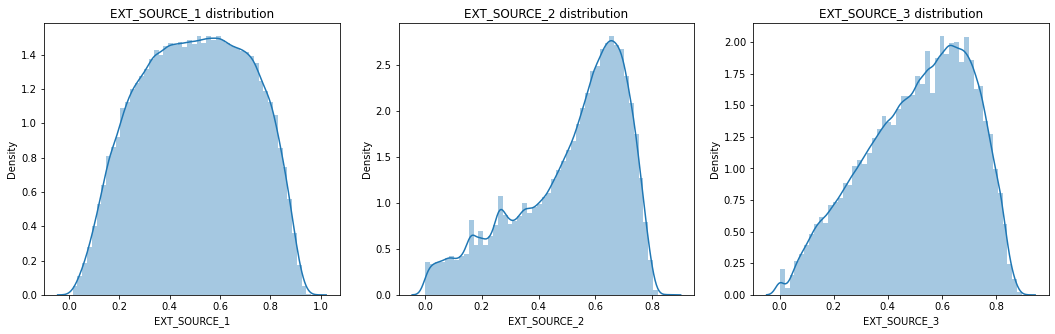

In [28]:
# since the columns 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3' are credit ratings hence the form crucial element 
#for our analysis and hence 'EXT_SOURCE_1' is also retained inspite of large null values.
plt.figure(figsize=[18,5])
s1=plt.subplot(1,3,1)
s2=plt.subplot(1,3,2)
s3=plt.subplot(1,3,3)
sns.distplot(app_data.EXT_SOURCE_1, ax=s1)
sns.distplot(app_data.EXT_SOURCE_2, ax=s2)
sns.distplot(app_data.EXT_SOURCE_3, ax=s3)

s1.set_title('EXT_SOURCE_1 distribution')
s2.set_title('EXT_SOURCE_2 distribution')
s3.set_title('EXT_SOURCE_3 distribution')
plt.show()

In [29]:
#since columns 'EXT_SOURCE_2', 'EXT_SOURCE_3' distribution show that it is right skewed, 
#therefore we assume median value to impute these columns respectively
# also column 'EXT_SOURCE_1' is normally distributed, but it has large null values therefore we will keep it as null only
app_data.EXT_SOURCE_2.fillna(value=app_data.EXT_SOURCE_2.median() , inplace=True)
app_data.EXT_SOURCE_3.fillna(value=app_data.EXT_SOURCE_3.median() , inplace=True)

In [30]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307221 non-null  int64  
 1   TARGET                       307221 non-null  int64  
 2   NAME_CONTRACT_TYPE           307221 non-null  object 
 3   CODE_GENDER                  307221 non-null  object 
 4   FLAG_OWN_CAR                 307221 non-null  object 
 5   FLAG_OWN_REALTY              307221 non-null  object 
 6   CNT_CHILDREN                 307221 non-null  int64  
 7   AMT_INCOME_TOTAL             307221 non-null  float64
 8   AMT_CREDIT                   307221 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307221 non-null  float64
 11  NAME_INCOME_TYPE             307221 non-null  object 
 12  NAME_EDUCATION_TYPE          307221 non-null  object 
 13 

In [31]:
# we convert date datasets 'DAYS_BIRTH', "DAYS_EMPLOYED" from negative to positive values and from days to years 
app_data[['DAYS_BIRTH', "DAYS_EMPLOYED"]]=round((app_data[['DAYS_BIRTH', "DAYS_EMPLOYED"]].abs()/365),0)
# also we need to rename these columns
app_data.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

In [32]:
app_data[['YEARS_BIRTH', "YEARS_EMPLOYED", "OCCUPATION_TYPE", "NAME_INCOME_TYPE"]].head(50)

YEARS_BIRTH  YEARS_EMPLOYED        OCCUPATION_TYPE      NAME_INCOME_TYPE
0          26.0             2.0               Laborers               Working
1          46.0             3.0             Core staff         State servant
2          52.0             1.0               Laborers               Working
3          52.0             8.0               Laborers               Working
4          55.0             8.0             Core staff               Working
5          46.0             4.0               Laborers         State servant
6          38.0             9.0            Accountants  Commercial associate
7          52.0             1.0               Managers         State servant
8          55.0          1001.0                 Others             Pensioner
9          40.0             6.0               Laborers               Working
10         28.0             2.0             Core staff               Working
11         56.0          1001.0                 Others             Pensioner
12         37.0             7.0               Laborers               Working
13         39.0             8.0                Drivers               Working
14         40.0             1.0               Laborers               Working
15         24.0             3.0               Laborers               Working
16         35.0             4.0                Drivers               Working
17         27.0             1.0               Laborers               Working
18         49.0            21.0               Laborers               Working
19         31.0             6.0             Core staff         State servant
20         50.0            12.0               Laborers               Working
21         41.0             5.0            Sales staff  Commercial associate
22         31.0            12.0            Sales staff               Working
23         68.0          1001.0                 Others             Pensioner
24         31.0             2.0                Drivers               Working
25         53.0            10.0         Cleaning staff               Working
26         51.0             7.0          Cooking staff               Working
27         44.0             3.0               Laborers               Working
28         27.0             5.0                 Others         State servant
29         28.0             3.0               Laborers               Working
30         42.0             7.0                 Others  Commercial associate
31         31.0             3.0  Private service staff               Working
32         36.0            12.0               Laborers               Working
33         32.0             6.0                Drivers  Commercial associate
34         44.0            13.0             Core staff         State servant
35         33.0             3.0            Sales staff               Working
36         47.0             2.0  Private service staff  Commercial associate
37         58.0             4.0                Drivers               Working
38         66.0          1001.0                 Others             Pensioner
39         44.0             5.0               Managers               Working
40         48.0             3.0               Laborers  Commercial associate
41         46.0             1.0               Laborers               Working
42         37.0            10.0            Sales staff               Working
43         65.0          1001.0                 Others             Pensioner
44         27.0             2.0                 Others               Working
45         22.0             2.0            Sales staff               Working
46         56.0          1001.0                 Others             Pensioner
47         55.0            15.0         Medicine staff               Working
48         54.0            12.0               Managers         State servant
49         50.0            26.0               Laborers               Working

In [33]:
# we observe that there is a year 1001 in the "YEARS_EMPLOYED" data, they belong to those whose age is high and are mostly pensioner, 
# we can assume them to be retired, in order to consider it in our analysis we assign a value greater than 50 and will later bin it.
app_data.YEARS_EMPLOYED[app_data.YEARS_EMPLOYED==1001.0]= 52.0

In [34]:
app_data.YEARS_EMPLOYED.value_counts()

52.0    55352
1.0     34762
2.0     30500
3.0     27691
4.0     22899
5.0     19172
6.0     15348
7.0     14064
8.0     12373
9.0      9958
0.0      9744
10.0     8291
11.0     6478
12.0     5611
13.0     4765
14.0     4495
15.0     3915
16.0     2349
17.0     2230
18.0     1911
19.0     1847
20.0     1798
21.0     1510
22.0     1400
23.0     1100
24.0      950
25.0      862
26.0      727
28.0      655
27.0      638
29.0      567
30.0      512
31.0      437
32.0      390
34.0      355
33.0      352
35.0      300
36.0      206
37.0      174
38.0      128
39.0      122
40.0       82
41.0       66
42.0       44
43.0       30
45.0       27
44.0       20
46.0        7
48.0        4
47.0        2
49.0        1
Name: YEARS_EMPLOYED, dtype: int64

In [35]:
# we divide varibles to catagorical and numerical

In [36]:
app_data.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
NAME_FAMILY_STATUS                  5
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    19
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
YEARS_BIRTH                        49
YEARS_EMPLOYED                     51
ORGANIZATION_TYPE                  58
REGION_POPULATION_RELATIVE         81
EXT_SOURCE_3                      814
AMT_GOODS_PR

In [37]:
# from above data set it is clear that the variables are categorical till ORGANIZATION_TYPE
# therefore we clubb them together into categorical columns
app_data.nunique().sort_values().index

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'REGION_RATING_CLIENT', 'CODE_GENDER', 'REGION_RATING_CLIENT_W_CITY',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'SK_ID_CURR'],
      dtype='object')

In [38]:
col_cat=['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'CODE_GENDER',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'ORGANIZATION_TYPE']
for i in app_data[col_cat]:
    app_data[i] = app_data[i].astype('category')

In [39]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307221 non-null  int64   
 1   TARGET                       307221 non-null  category
 2   NAME_CONTRACT_TYPE           307221 non-null  category
 3   CODE_GENDER                  307221 non-null  category
 4   FLAG_OWN_CAR                 307221 non-null  category
 5   FLAG_OWN_REALTY              307221 non-null  category
 6   CNT_CHILDREN                 307221 non-null  category
 7   AMT_INCOME_TOTAL             307221 non-null  float64 
 8   AMT_CREDIT                   307221 non-null  float64 
 9   AMT_ANNUITY                  307221 non-null  float64 
 10  AMT_GOODS_PRICE              307221 non-null  float64 
 11  NAME_INCOME_TYPE             307221 non-null  category
 12  NAME_EDUCATION_TYPE          307221 non-null

In [40]:
# for columns YEARS_BIRTH, YEARS_EMPLOYED we will bin the data into bins.
bins1 = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0]
bins2 = [0.0,10.0,20.0,30.0,40.0,50.0,52.0]

ranges1 = ["0-10", '10-20', "20-30", "30-40", "40-50", '50-60', "60-70", "70-80"]
ranges2 = ["0-10", '10-20', "20-30", "30-40", "40-50", 'Retired' ]

app_data['RANGE_YEARS_BIRTH'] = pd.cut(app_data['YEARS_BIRTH'],bins1,labels=ranges1)
app_data['RANGE_YEARS_EMPLOYED'] = pd.cut(app_data['YEARS_EMPLOYED'],bins2,labels=ranges2)

In [41]:
app_data['RANGE_YEARS_EMPLOYED'].value_counts()

0-10       195058
Retired     55352
10-20       35399
20-30        8921
30-40        2546
40-50         201
Name: RANGE_YEARS_EMPLOYED, dtype: int64

In [42]:
# since XNA is equivalent to null values, Therefore we impute it as np.NaN
app_data= app_data.replace('XNA', np.NaN)

In [43]:
#merging app_data and pre_app
#we will analyse this merged dataset later
data = pd.merge(left=app_data,right=pre_app, how="inner", on='SK_ID_CURR',suffixes='_x')

In [44]:
#removing 'SK_ID_CURR' column since it is irrelevant in our analysis
app_data.drop(labels='SK_ID_CURR', axis=1, inplace=True)

In [45]:
#new data frame for catagorical variables
app_cat=app_data.select_dtypes(include = ['category']).columns
app_cat

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'RANGE_YEARS_BIRTH', 'RANGE_YEARS_EMPLOYED'],
      dtype='object')

In [46]:
#new data frame for numerical variables
app_num=app_data.select_dtypes(include = ['int64', 'float64']).columns
app_num

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3'],
      dtype='object')

In [47]:
# describing catagorical columns
app_data[app_cat].describe()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count   307221             307221      307217       307221          307221   
unique       2                  2           2            2               2   
top          0         Cash loans           F            N               Y   
freq    282417             278220      202251       202637          213086   

        CNT_CHILDREN NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count         307221           307221                         307221   
unique            15                8                              5   
top                0          Working  Secondary / secondary special   
freq          215182           158583                         218186   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  WEEKDAY_APPR_PROCESS_START  \
count              307221             307221  ...                      307221   
unique                  5                  6  ...                           7   
top               Married  House / apartment  ...                     TUESDAY   
freq               196258             272624  ...                       53857   

             ORGANIZATION_TYPE AMT_REQ_CREDIT_BUREAU_HOUR  \
count                   251869                   307221.0   
unique                      57                        5.0   
top     Business Entity Type 3                        0.0   
freq                     67930                   305596.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                    307221.0                    307221.0   
unique                        9.0                         9.0   
top                           0.0                         0.0   
freq                     305732.0                    298692.0   

        AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
count                    307221.0                  307221.0   
unique                       24.0                      11.0   
top                           0.0                       0.0   
freq                     263488.0                  256683.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  RANGE_YEARS_BIRTH  RANGE_YEARS_EMPLOYED  
count                    307221.0             307221                297477  
unique                       25.0                  5                     6  
top                           0.0              30-40                  0-10  
freq                     113204.0              82674                195058  

[4 rows x 26 columns]

In [48]:
# analysis of continuous variables

In [49]:
# describing numerical columns
app_data[app_num].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.072210e+05  3.072210e+05  307221.000000     3.072210e+05   
mean       1.688326e+05  5.993163e+05   27120.452357     5.383973e+05   
std        2.372199e+05  4.025196e+05   14492.106811     3.694484e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16551.000000     2.385000e+05   
50%        1.485000e+05  5.146020e+05   24916.500000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  
count               307221.000000  133991.000000  3.072210e+05  307221.000000  
mean                     0.020870       0.502173  5.145019e-01       0.515720  
std                      0.013832       0.211066  1.908803e-01       0.174743  
min                      0.000290       0.014568  8.173617e-08       0.000527  
25%                      0.010006       0.334059  3.929372e-01       0.417100  
50%                      0.018850       0.506055  5.659722e-01       0.535276  
75%                      0.028663       0.675119  6.634316e-01       0.636376  
max                      0.072508       0.962693  8.549997e-01       0.896010

### Univariate analysis of numerical variables

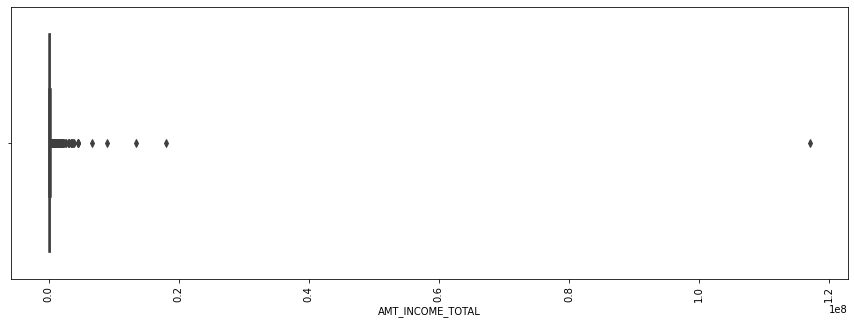

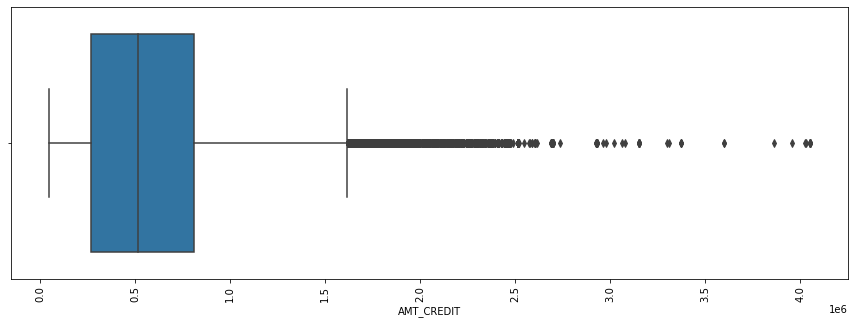

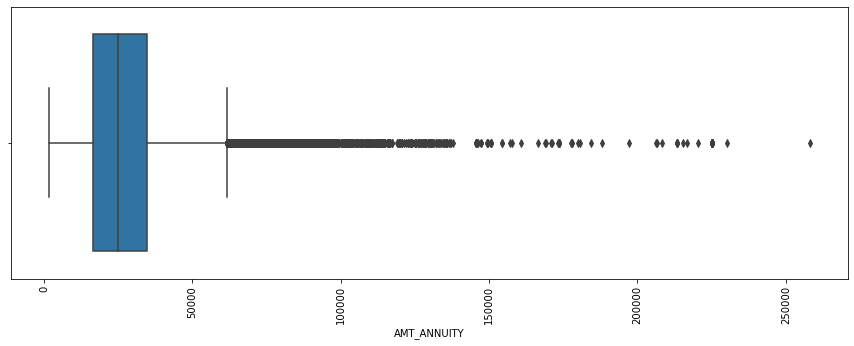

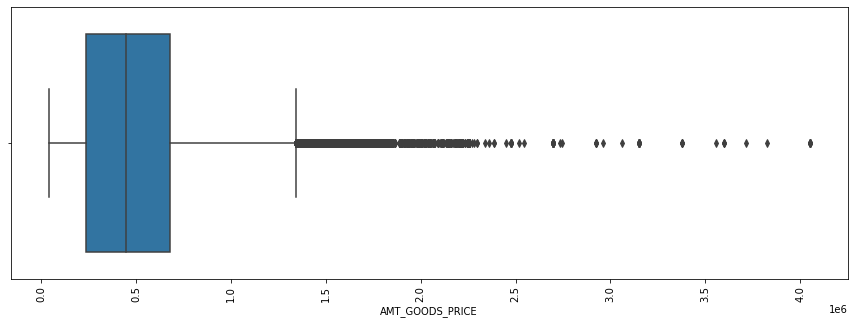

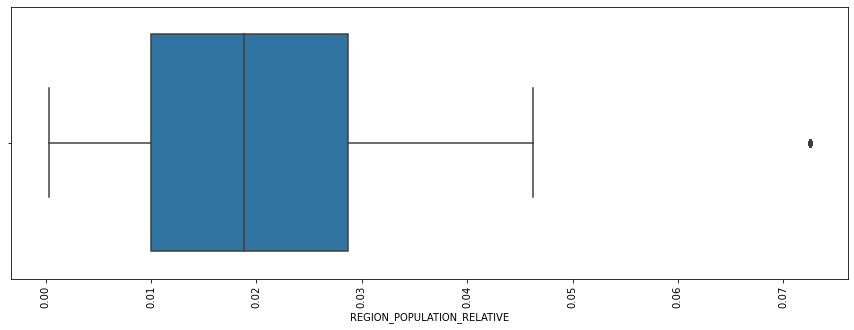

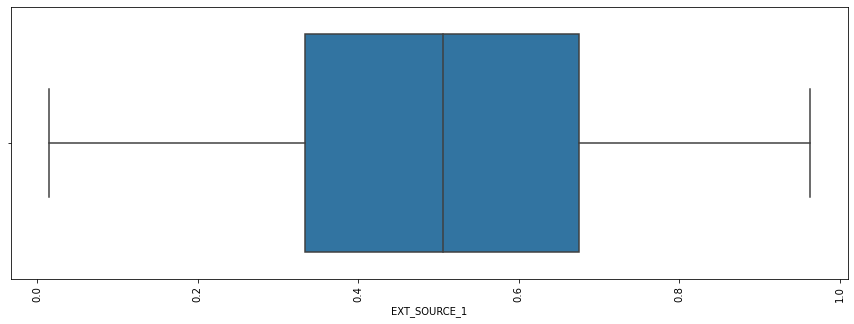

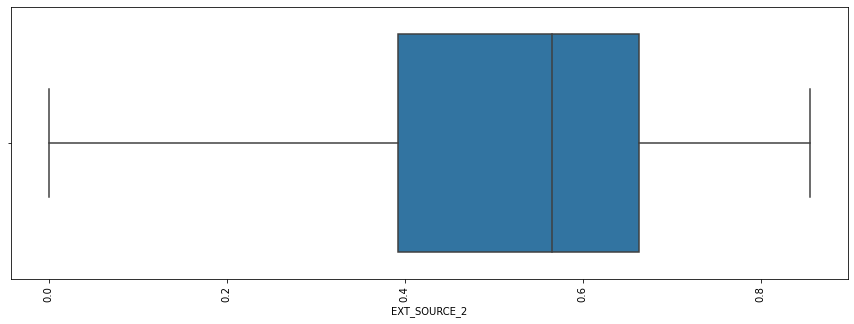

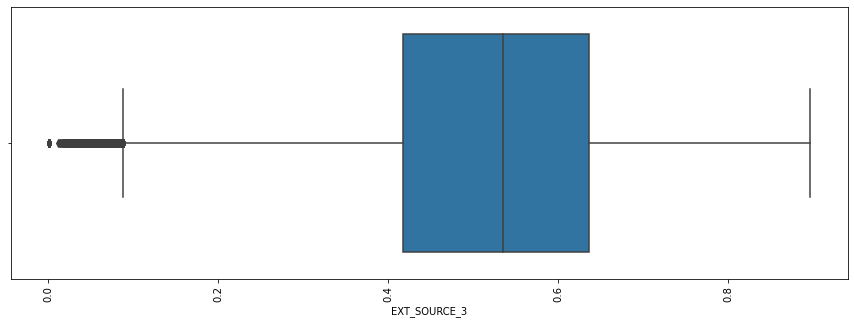

In [50]:
#detecting outliers
for i in app_data[app_num]:
    plt.figure(1,figsize=(15,5))
    
    sns.boxplot(app_data[i])
    plt.xticks(rotation = 90,fontsize =10)
    plt.show()

In [51]:
copy= app_data[app_num]

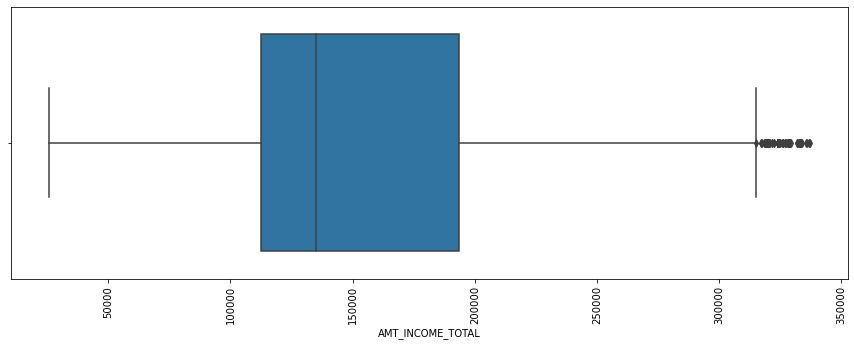

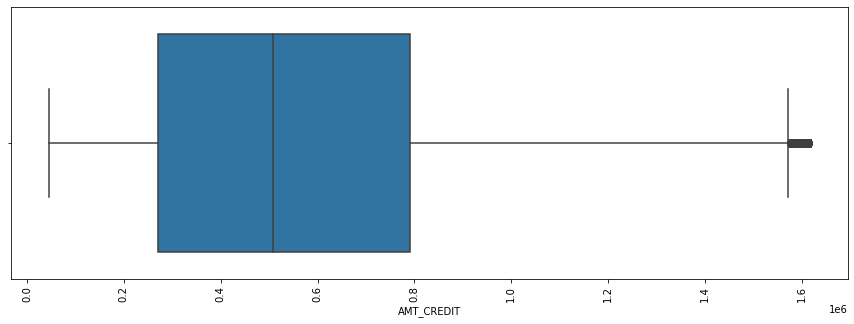

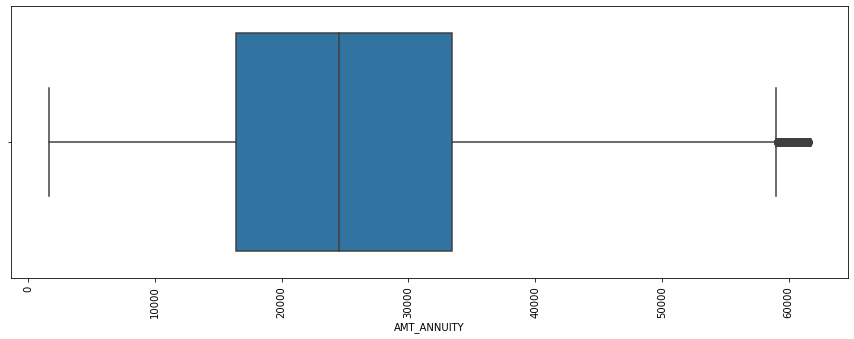

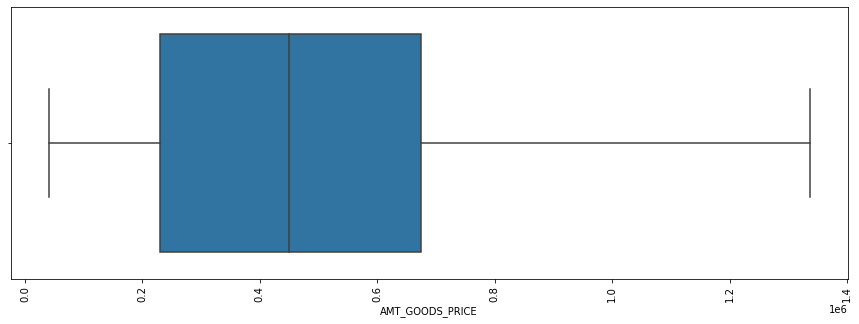

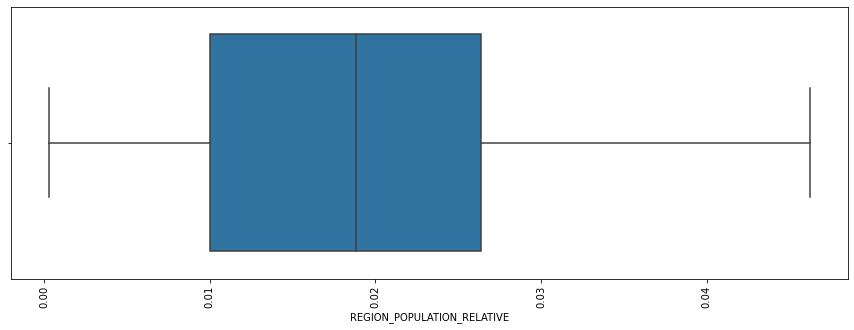

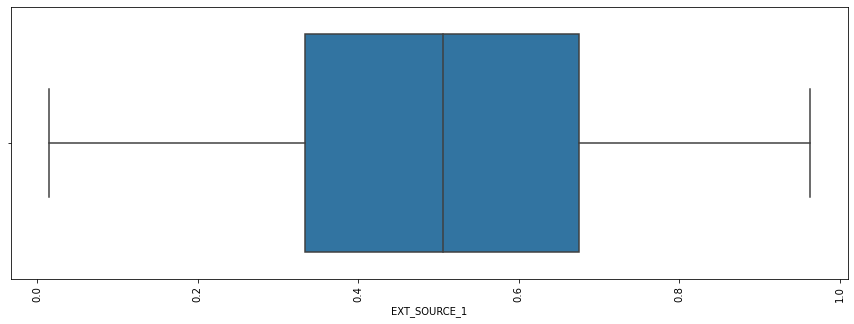

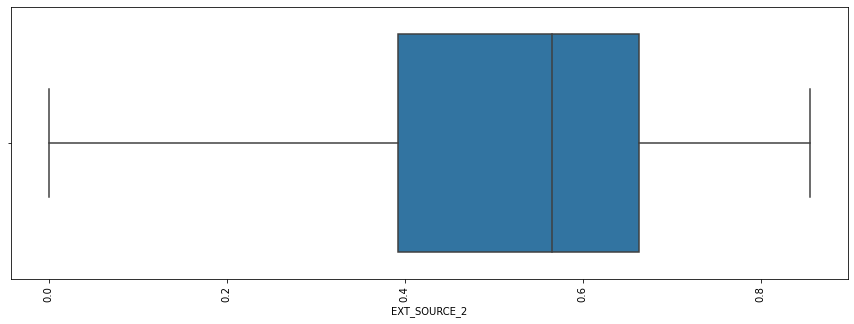

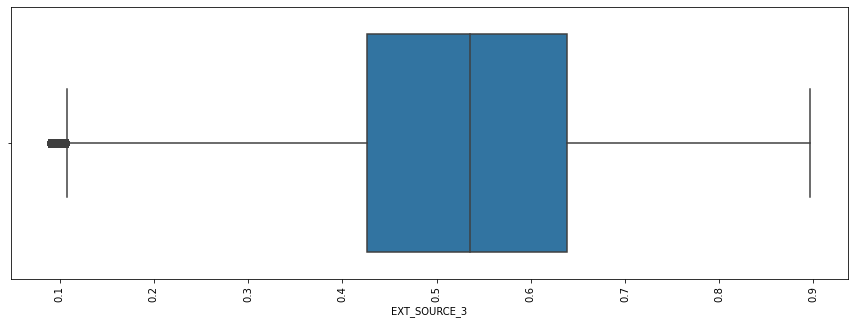

In [52]:
# removing outliers
copy= app_data[app_num]
for i in copy.columns:
    Q1 = copy[i].quantile(0.25)
    Q3 = copy[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
  
    copy[i][copy[i] <= lower_fence] = np.NaN
    copy[i][copy[i] >= upper_fence] = np.NaN

    plt.figure(1,figsize=(15,5))
    sns.boxplot(copy[i])
    plt.xticks(rotation =90,fontsize =10)
    plt.show()

### Univariate analysis of catagorical variables

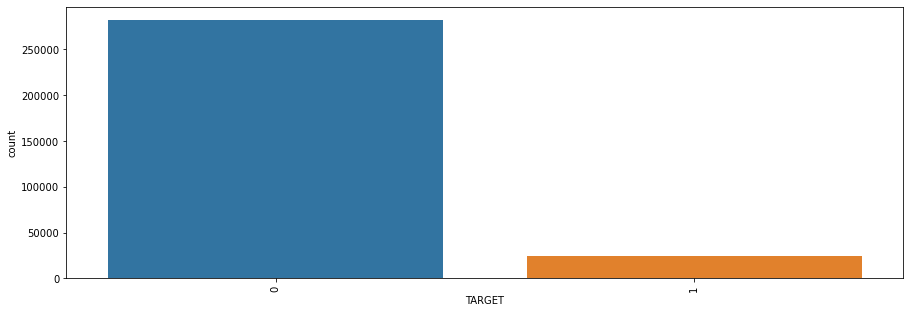

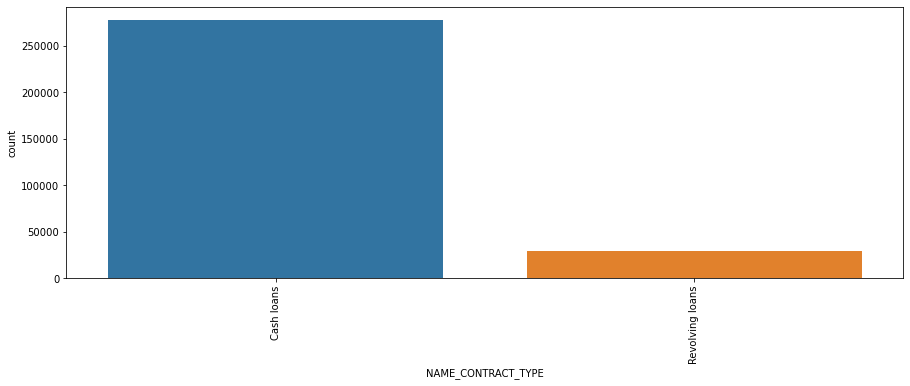

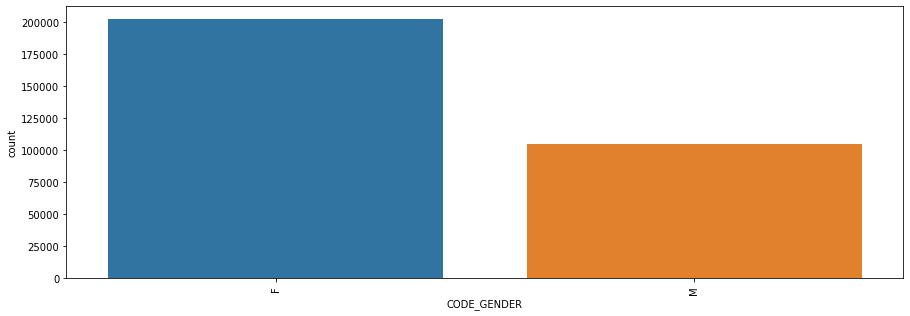

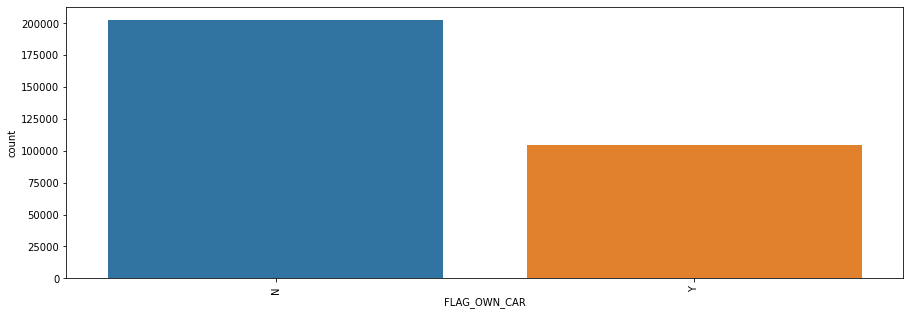

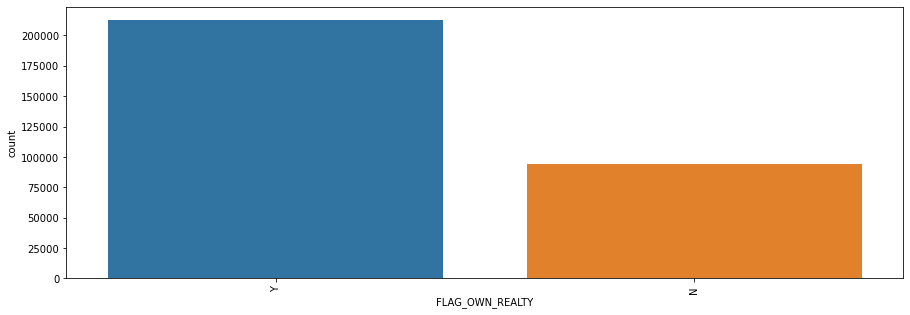

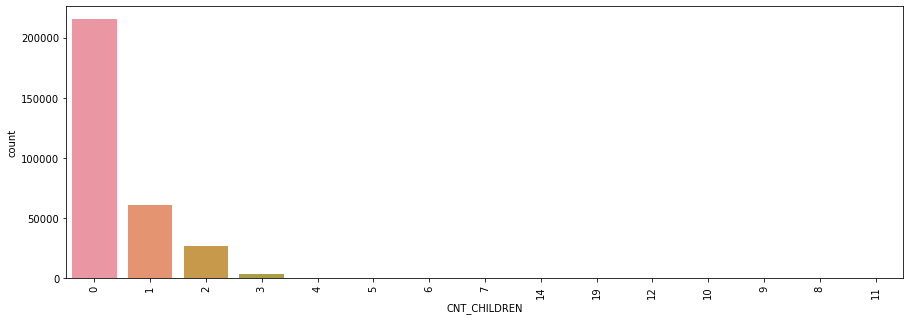

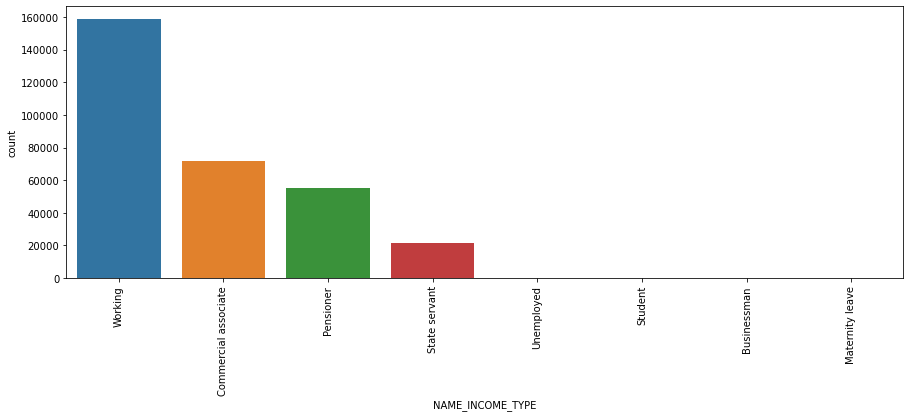

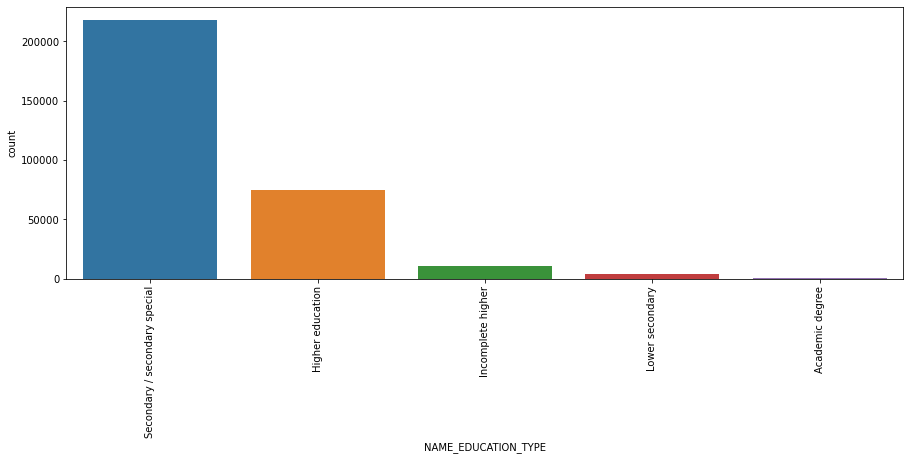

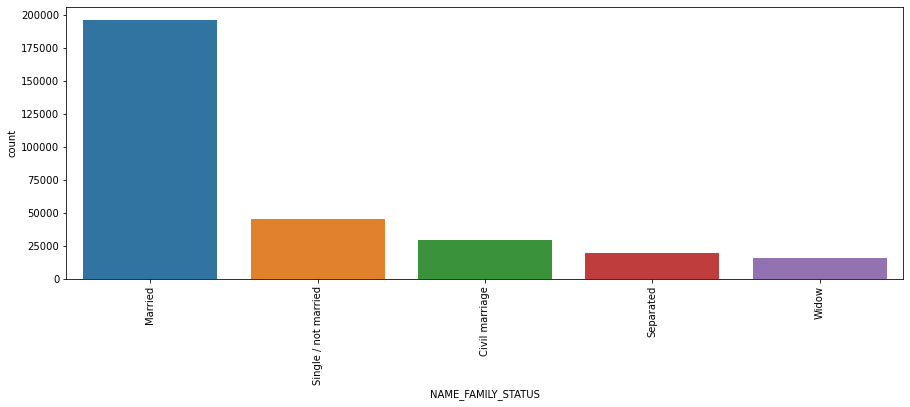

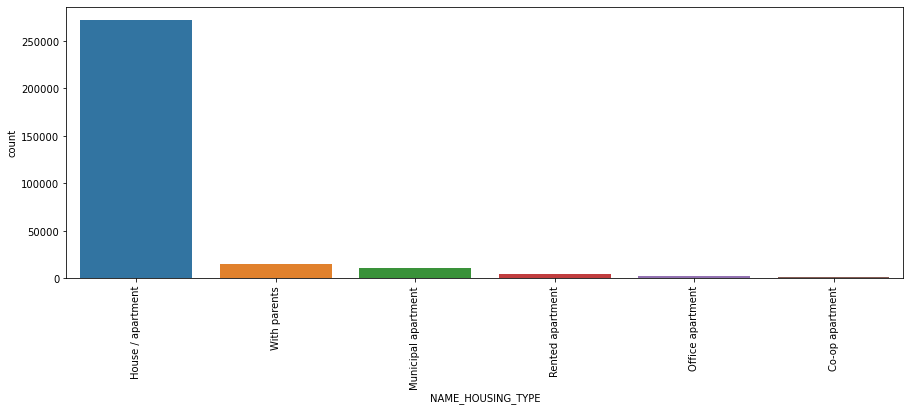

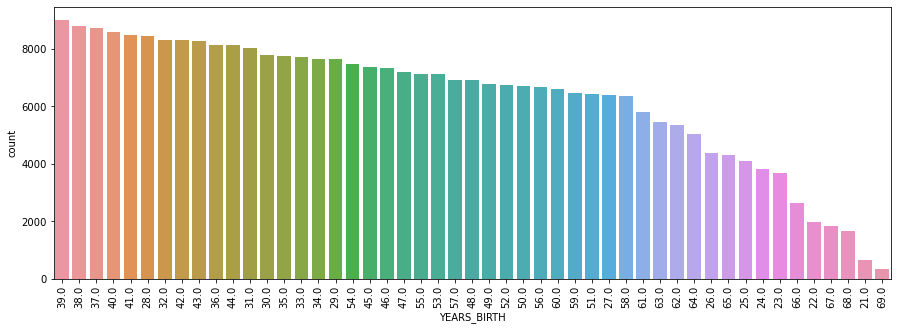

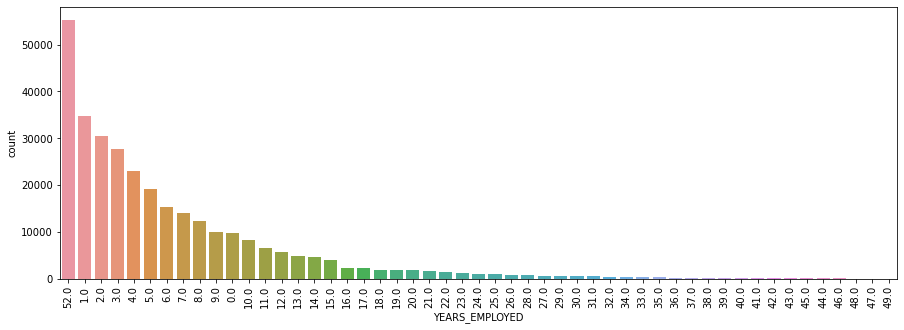

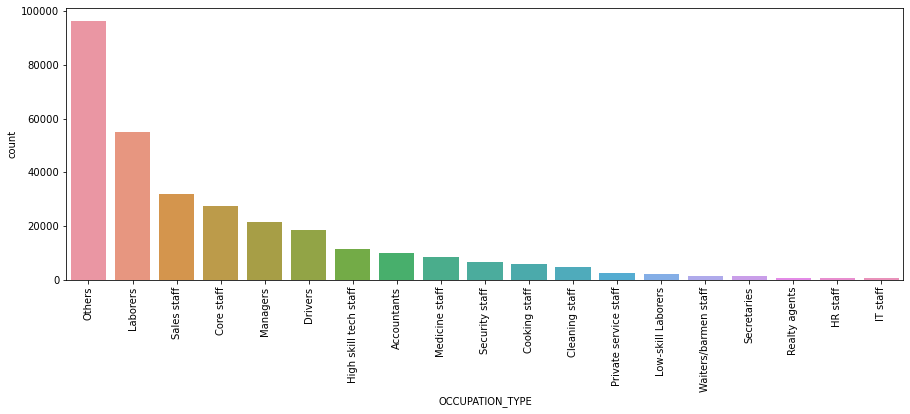

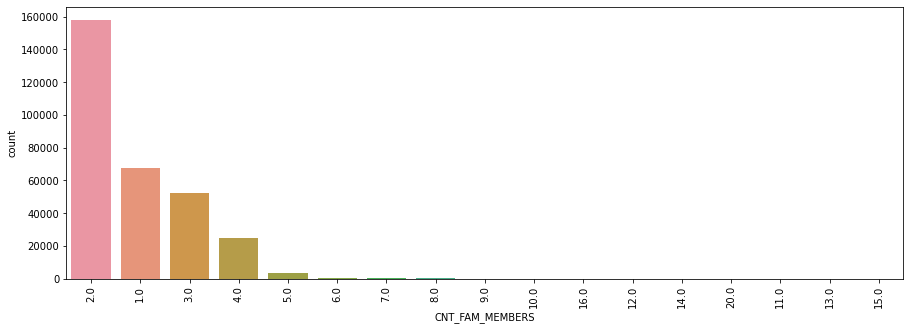

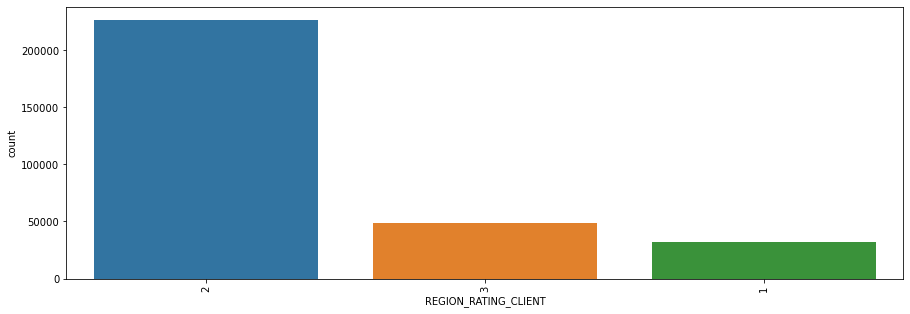

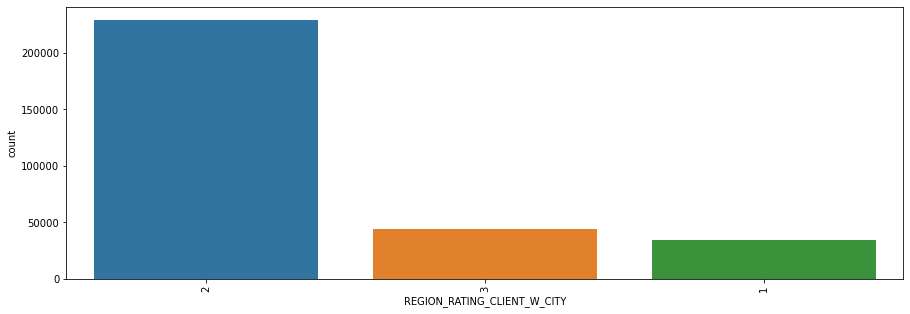

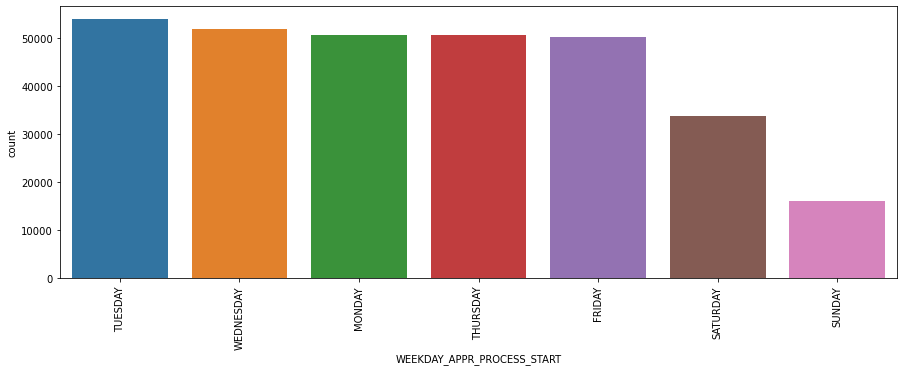

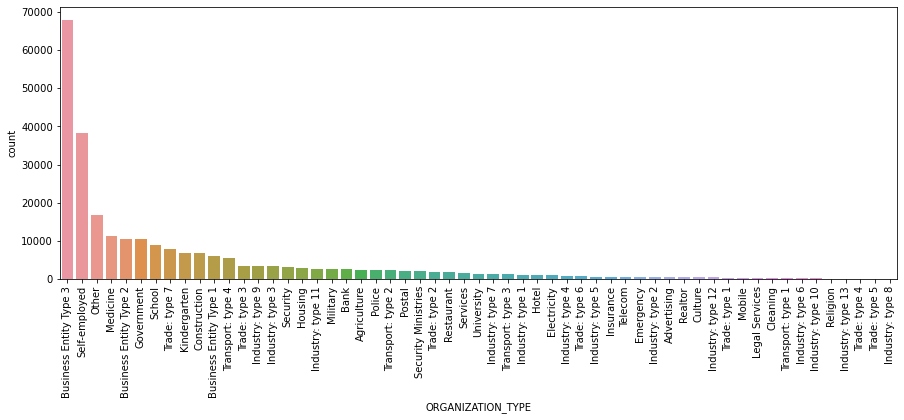

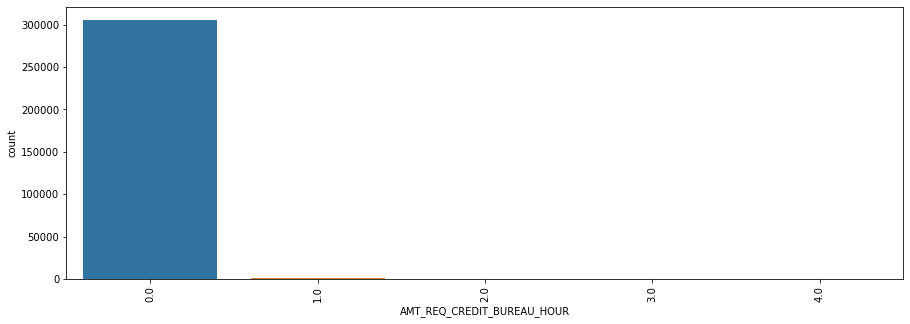

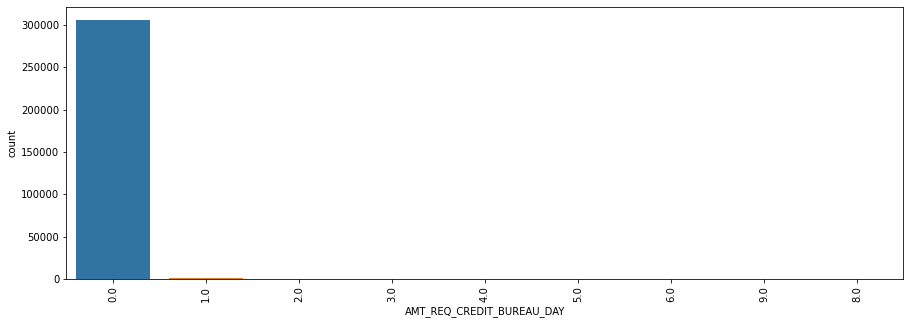

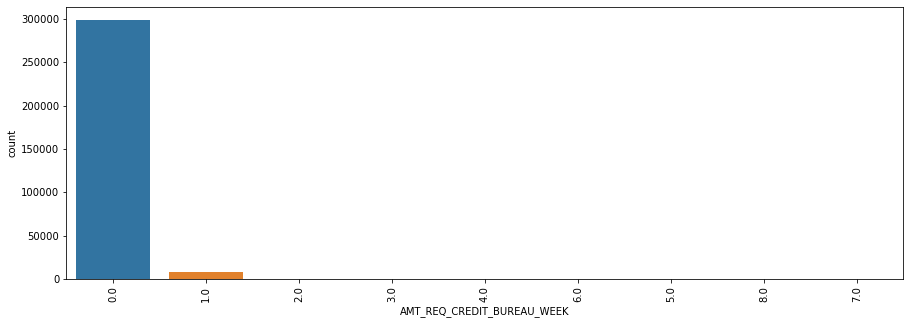

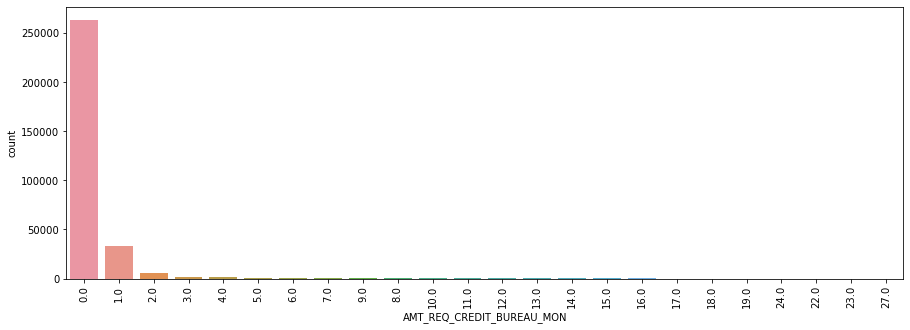

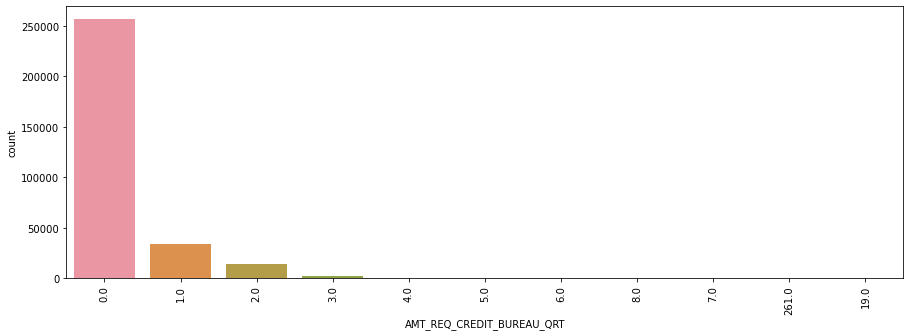

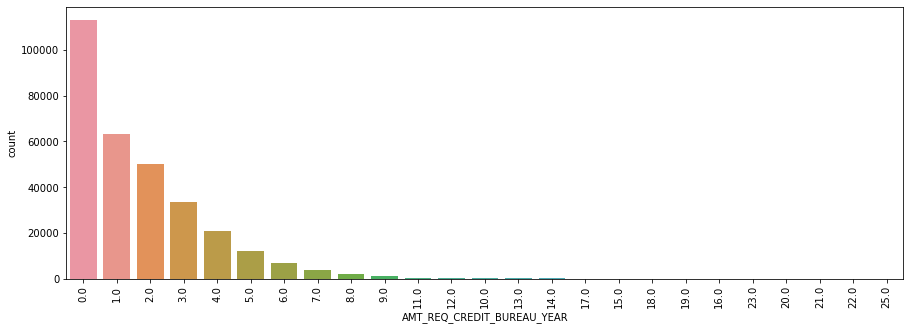

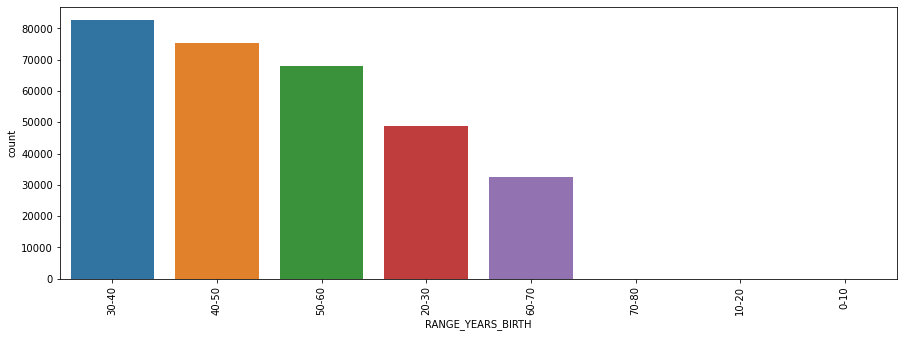

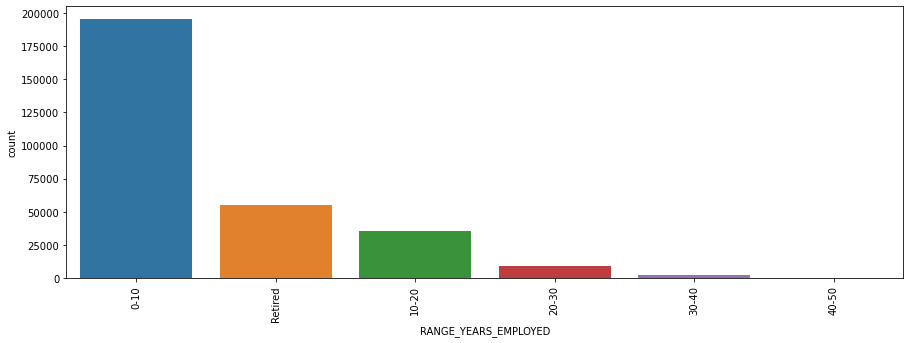

In [53]:
# countplot for catagorical variables
for i in app_data[app_cat]:
    plt.figure(1,figsize=(15,5))
    sns.countplot(app_data[i], order=app_data[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize =10)
    plt.show()

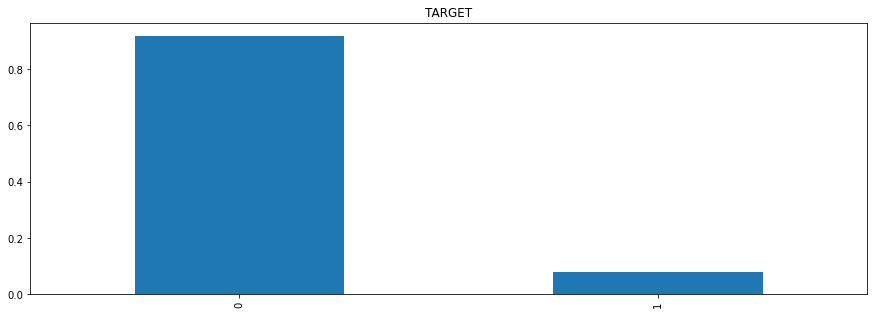

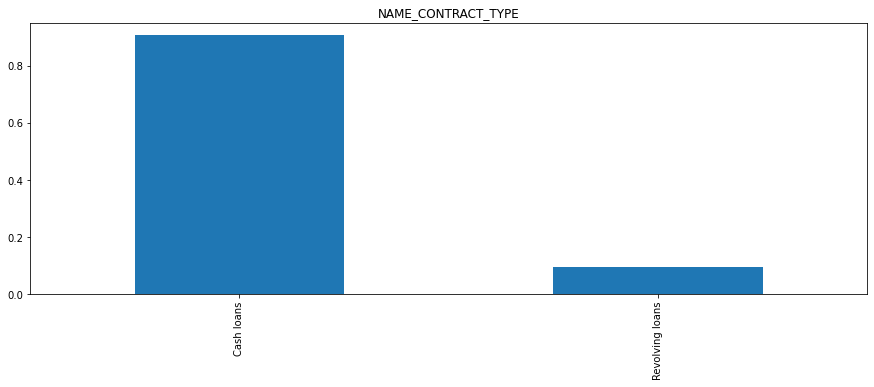

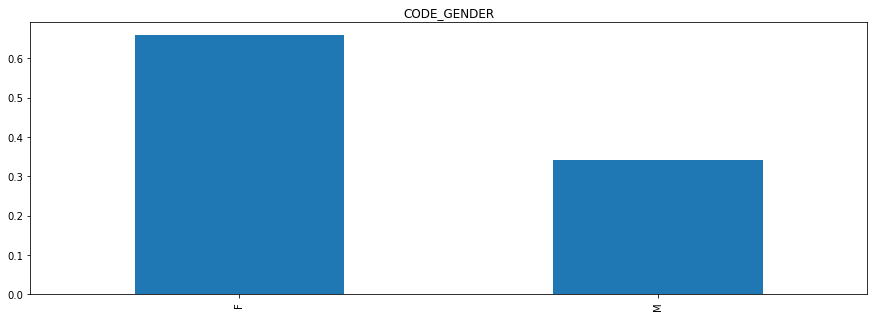

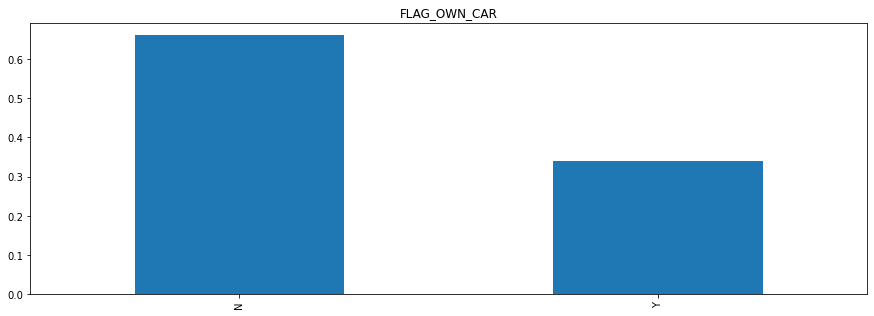

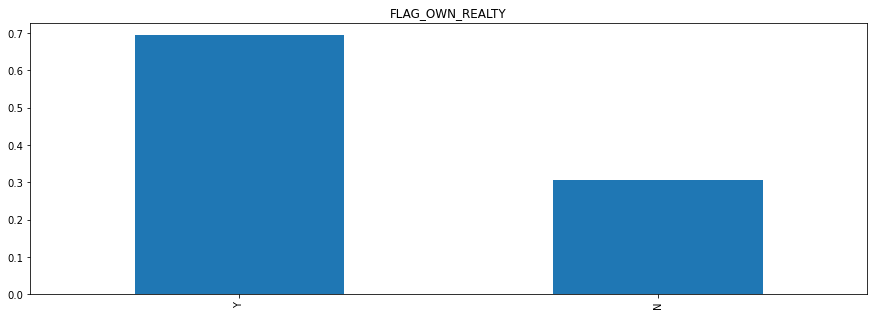

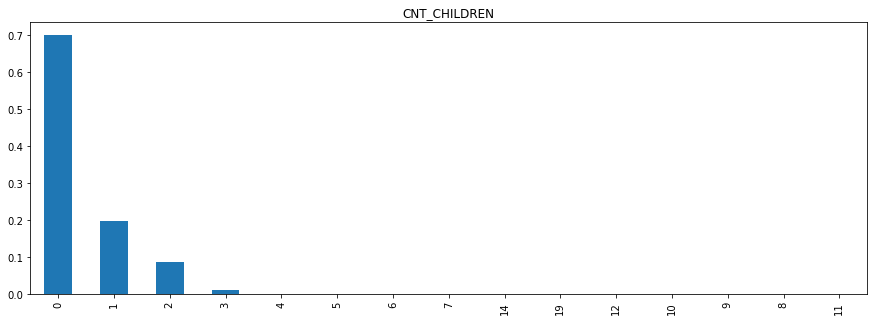

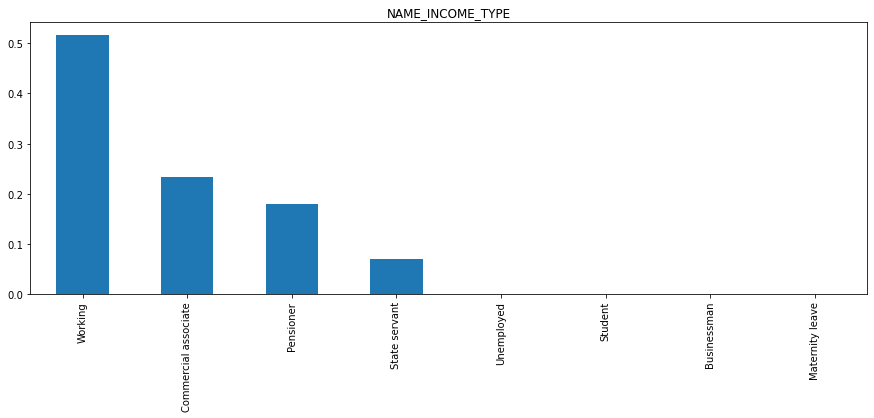

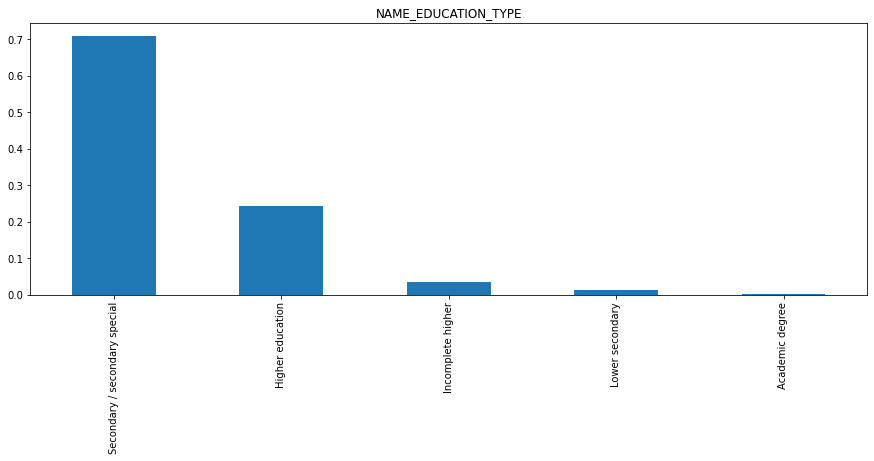

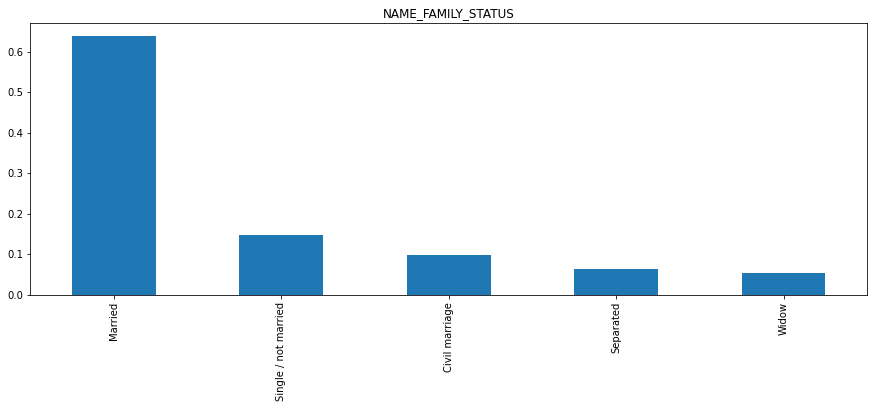

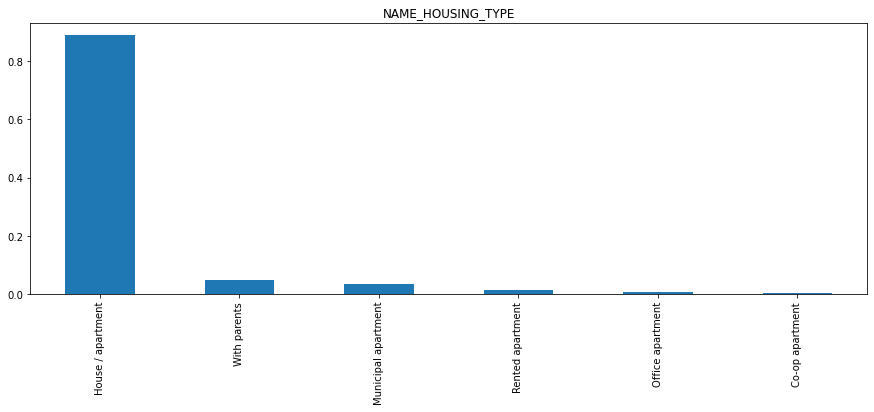

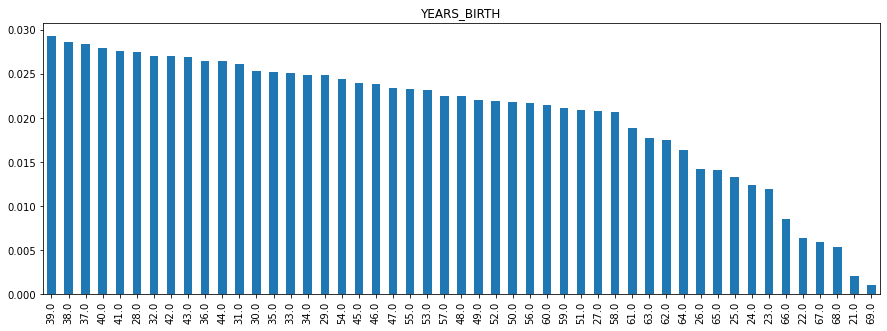

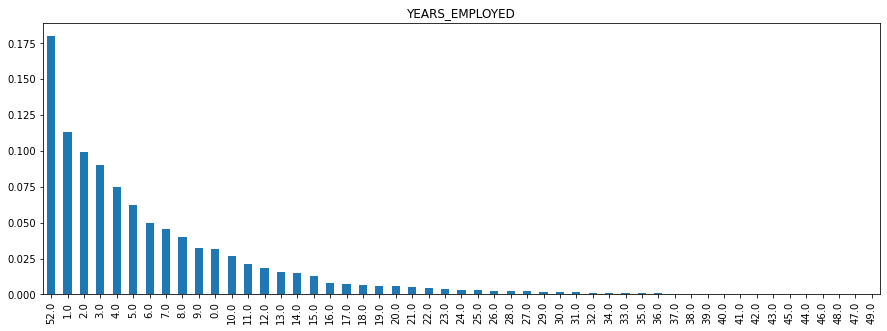

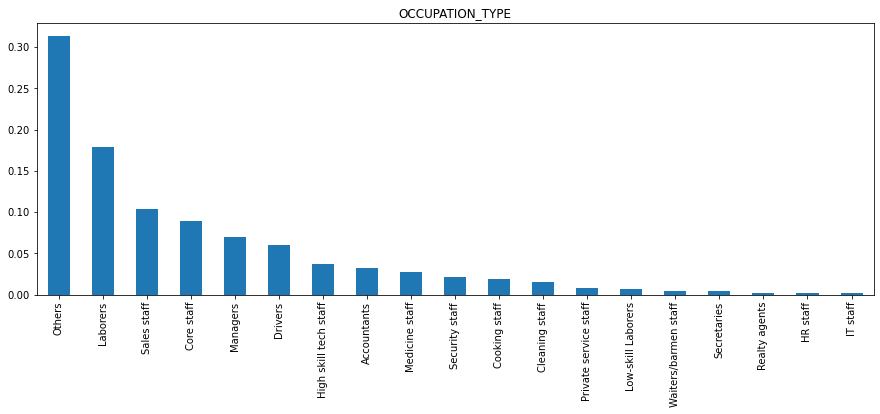

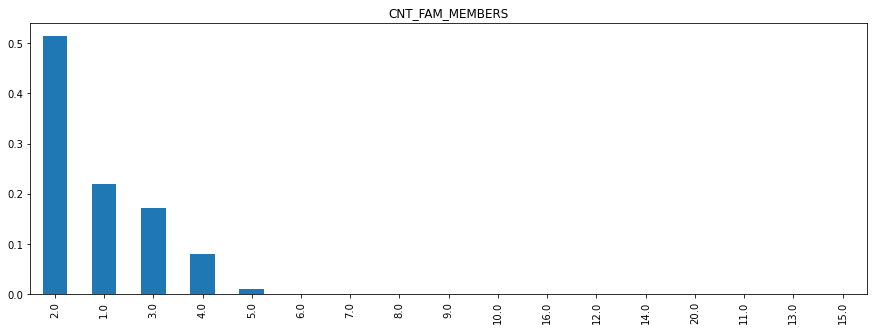

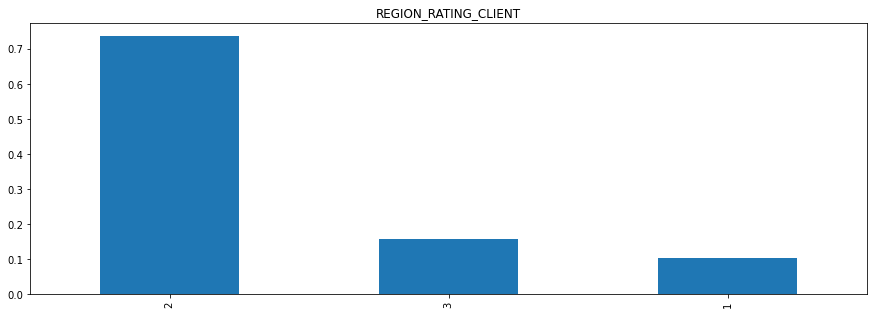

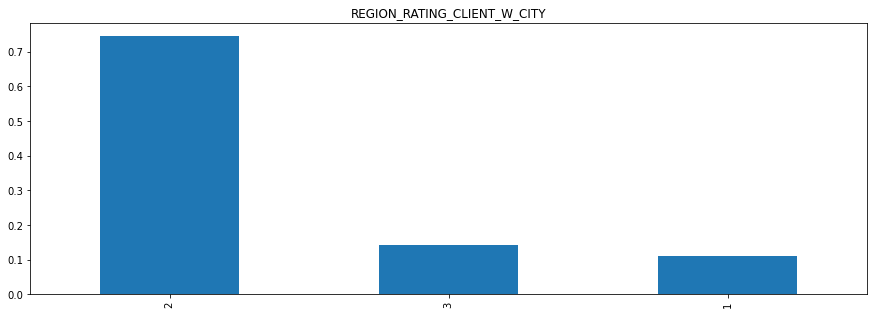

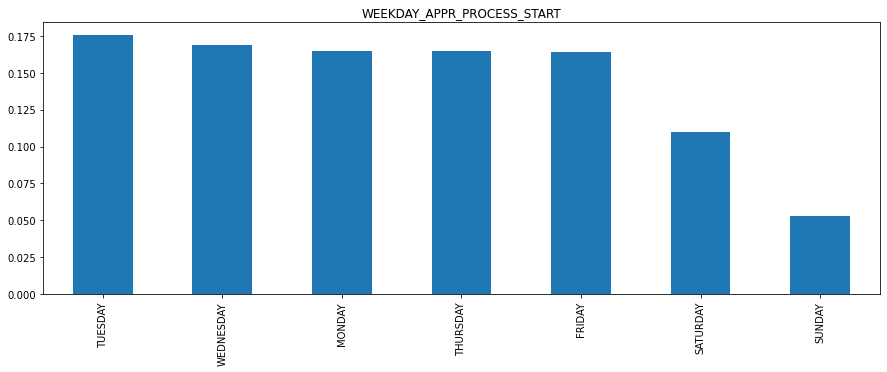

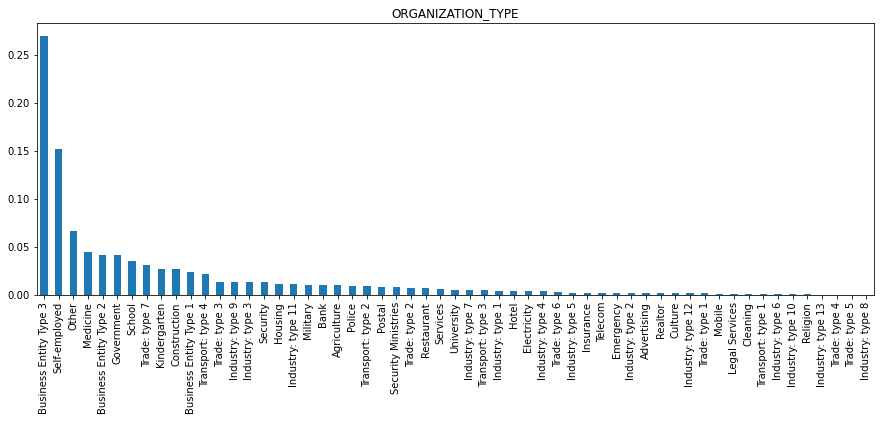

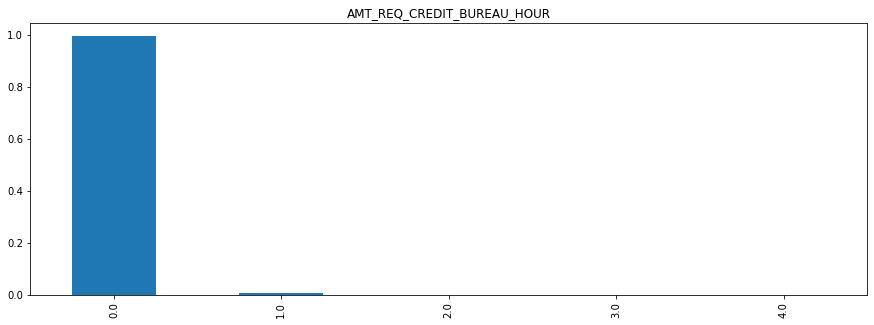

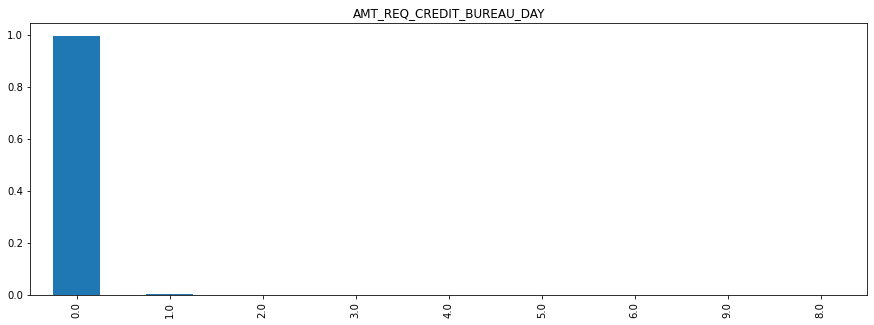

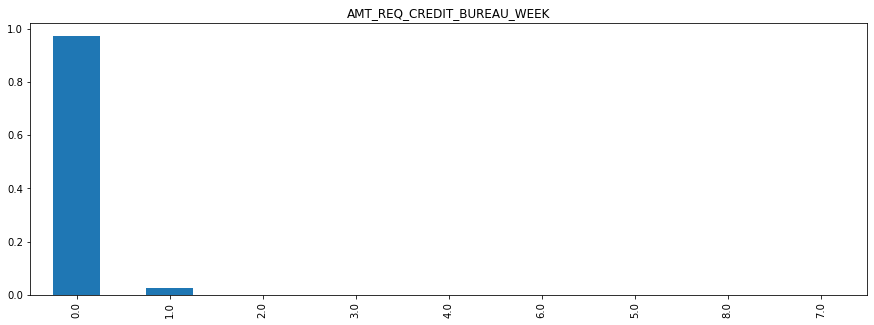

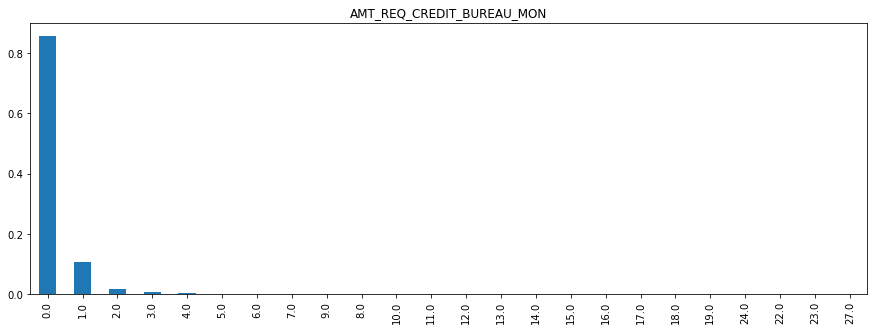

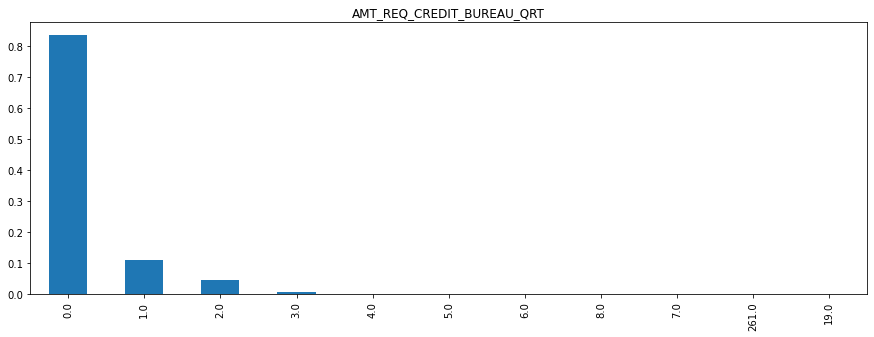

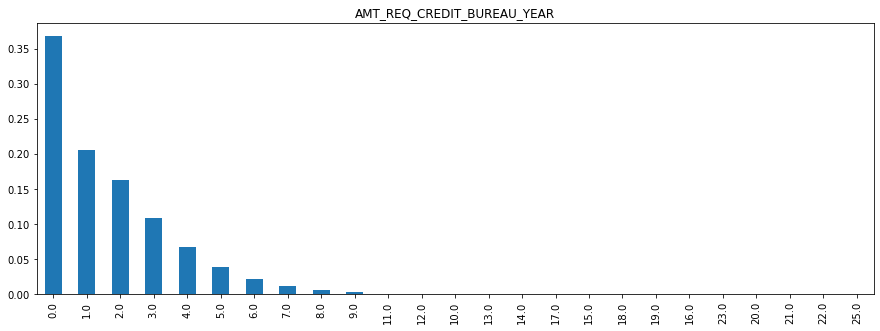

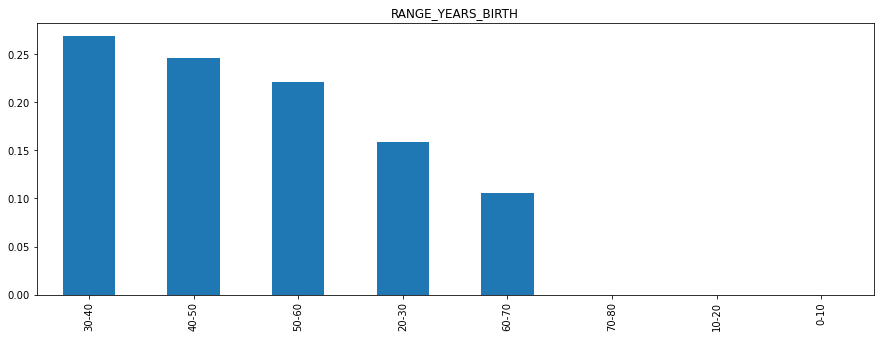

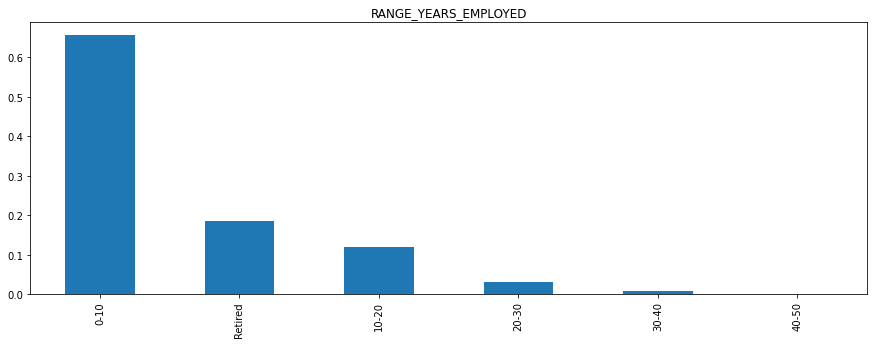

In [54]:
#normalized plot for catagorical variables
for i in app_data[app_cat]:
    plt.figure(1,figsize=(15,5))
    app_data[i].value_counts(normalize=True).plot(kind="bar")
    plt.xticks(rotation = 90,fontsize =10)
    plt.title(i)
    plt.show()

### Inferences from above distributions of Catagorical variables
1.  TARGET: Less than 10% of the clients are those with payment difficulties
2.  NAME_CONTRACT_TYPE: Around 90% of client opted for Cash loans
3.  CODE_GENDER: Most applicants are female greater than 60%.
4.  FLAG_OWN_CAR: Most of the applicants do not own car (around 65%).
5.  FLAG_OWN_REALTY: Around 70% of the applicant owened house/flat.
6.  CNT-CHILDREN: almost 70% of the applicant has no children and it follows decreasing trend (i.e as the no. of children                         increases, loan application decreases.
7.  NAME_INCOME_TYPE: around half of the applicants has marked income type as working.
8.  NAME_EDUCATION_TYPE: Around 70% of the applicant has education upto Secondary/Secondary special level.
9.  NAME_FAMILY_STATUS: More than 60% of the applicant is married.
10. NAME_HOUSING_TYPE: almost 90% are living in their house or apartment.
11. OCCUPATION_TYPE: Most of the applicants occupation falls under other category, followed by laboures and sales staff.
12. CNT_FAMILY_MEMBERS: Most the applicant has 2 members in the family followed by 1 and then subsequently decreasing with                               increasing family members
13. REGION_RATING and REGION_RATING_CLIENT_W_CITY: Tier 2 cities has most of the applicants(around 70%).
14. WEEKDAY_APPR_PROCESS_START: Most of the applications were on Tuesday and the least were on Sundays.
15. ORGANIZATION_TYPE: Majority of the organisation type where the client works is Business Entity type3, followed by Self-                            Employed and then others.
16. RANGE_YEARS_BIRTH: The majority of the applicant is in the age of 30-40 followed by 40-50.
17. RANGE_YEARS_EMPLOYED: The majority of the applicant are employed fro 0-10 years and decreases with increasing year employed.

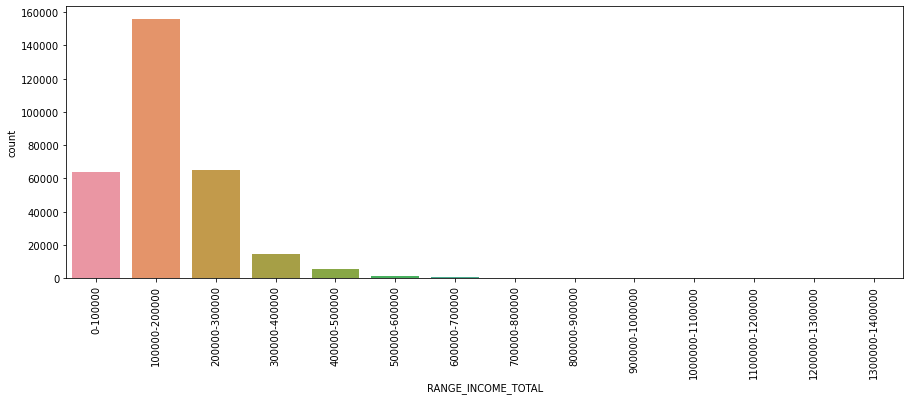

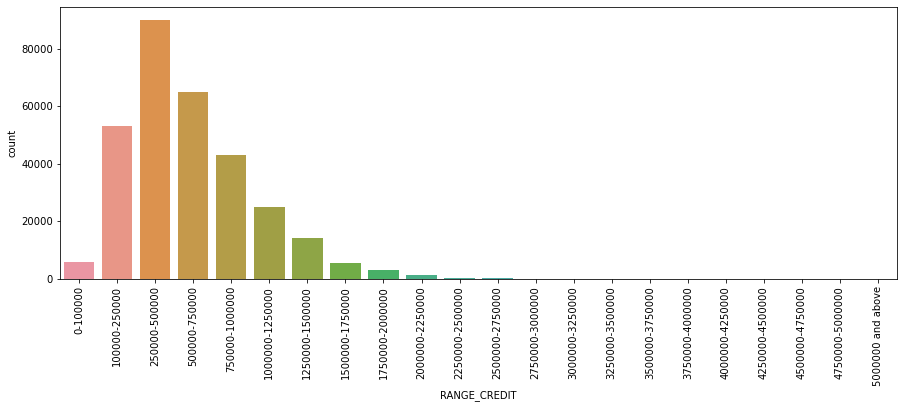

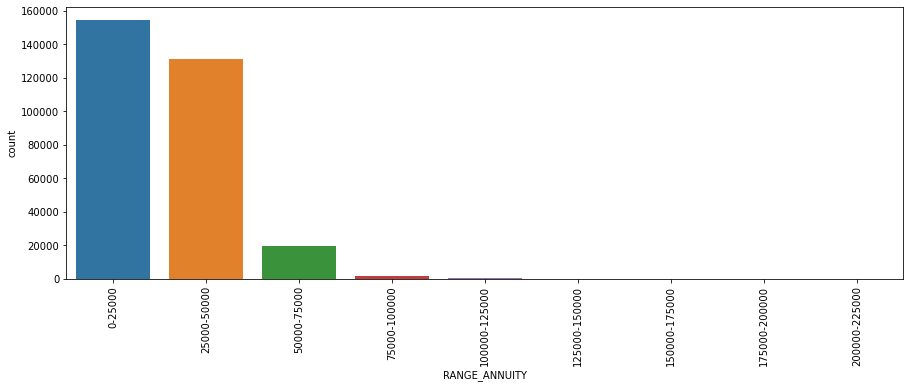

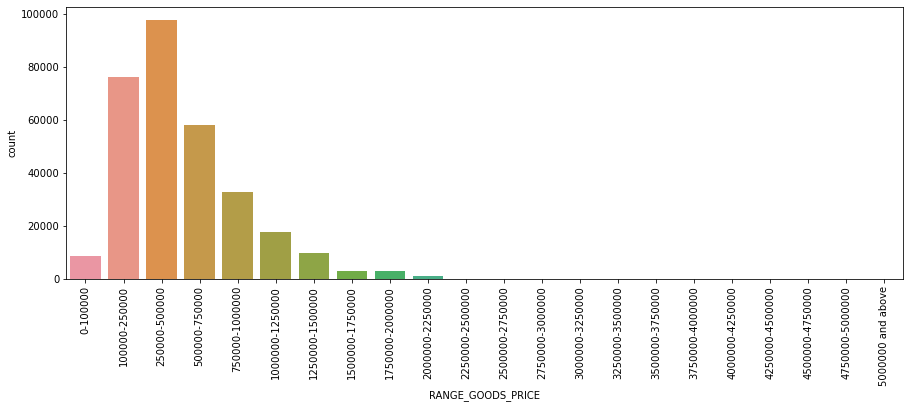

In [55]:
 # for columns "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE" we will bin the data into bins 
    #and then will see its distribution.
bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']
bins1=[*range(0, 1500000, 100000)]
ranges1 = ['0-100000','100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000','600000-700000',
          '700000-800000','800000-900000', '900000-1000000','1000000-1100000', '1100000-1200000', '1200000-1300000', 
           '1300000-1400000']
bins2=[*range(0, 250000, 25000)]
ranges2 = ['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000', '150000-175000','175000-200000',
           '200000-225000']
amt_cols=['RANGE_INCOME_TOTAL', 'RANGE_CREDIT', 'RANGE_ANNUITY', 'RANGE_GOODS_PRICE']
app_data['RANGE_INCOME_TOTAL'] = pd.cut(app_data["AMT_INCOME_TOTAL"],bins1,labels=ranges1)
app_data['RANGE_CREDIT'] = pd.cut(app_data['AMT_CREDIT'],bins,labels=ranges)
app_data['RANGE_ANNUITY'] = pd.cut(app_data['AMT_ANNUITY'],bins2,labels=ranges2)
app_data['RANGE_GOODS_PRICE'] = pd.cut(app_data['AMT_GOODS_PRICE'],bins,labels=ranges)
for i in app_data[amt_cols]:
    plt.figure(1,figsize=(15,5))
    sns.countplot(app_data[i])
    plt.xticks(rotation = 90,fontsize =10)
    plt.show()

### Inferences from above distributions of Income, credit, annuity, goods price
1.  Majority of the applicants has income between 1 lakh to 2 lakh.
2.  Majority of credit amount is in between 2.5-5 lakh.
3.  Majority of the loan annuity is less than 25000.
4.  The price of good is maximum between 2.5 to 5 lakh.

### Check data imbalance

In [56]:
# from the normalized plot for catagorical variables we can observe the data imbalance in variables 
#'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY',"NAME_HOUSING_TYPE", 'AMT_REQ_CREDIT_BUREAU_HOUR', 
#'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',

In [57]:
# for TARGET and 'NAME_CONTRACT_TYPE' data imbalance is large
app_data['TARGET'].value_counts(normalize= True)*100


0    91.926333
1     8.073667
Name: TARGET, dtype: float64

In [58]:
app_data['NAME_CONTRACT_TYPE'].value_counts(normalize= True)*100

Cash loans         90.560216
Revolving loans     9.439784
Name: NAME_CONTRACT_TYPE, dtype: float64

In [59]:
# We divide the data into two different datasets depending upon the target value
t0 = app_data.loc[app_data.TARGET == 0]
t1 = app_data.loc[app_data.TARGET == 1]

In [60]:
len(t0)

282417

### Segmented Univariate Analysis of Catagorical data

In [61]:
# we further analyze numerical and catagorical columns for different targets

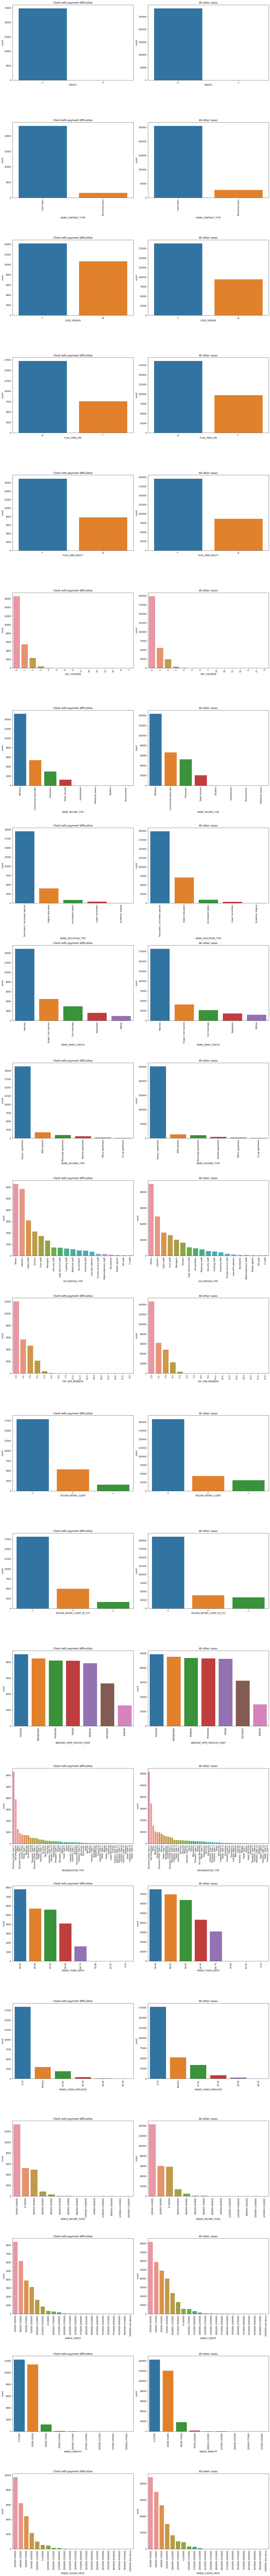

In [62]:
count=1
cat=['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'RANGE_YEARS_BIRTH', 'RANGE_YEARS_EMPLOYED', 'RANGE_INCOME_TOTAL', 'RANGE_CREDIT', 'RANGE_ANNUITY', 'RANGE_GOODS_PRICE']
plt.subplots(figsize=(18, 200))
for i in cat:
    for j in [t1, t0]:
        plt.subplot(26,2,count)
        sns.countplot(j[i], order=j[i].value_counts().index)
        plt.xticks(rotation = 90,fontsize =10)
        if count%2==0:
            plt.title("All other cases")
        else:
            plt.title("Client with payment difficulties")
        count+=1
        plt.tight_layout()
plt.show()

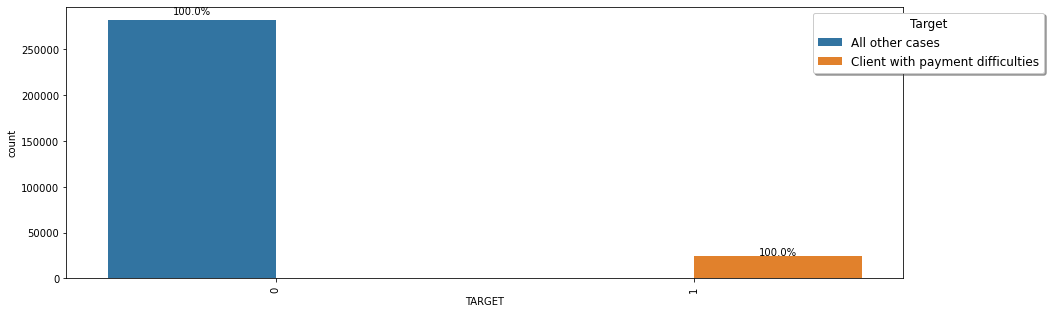

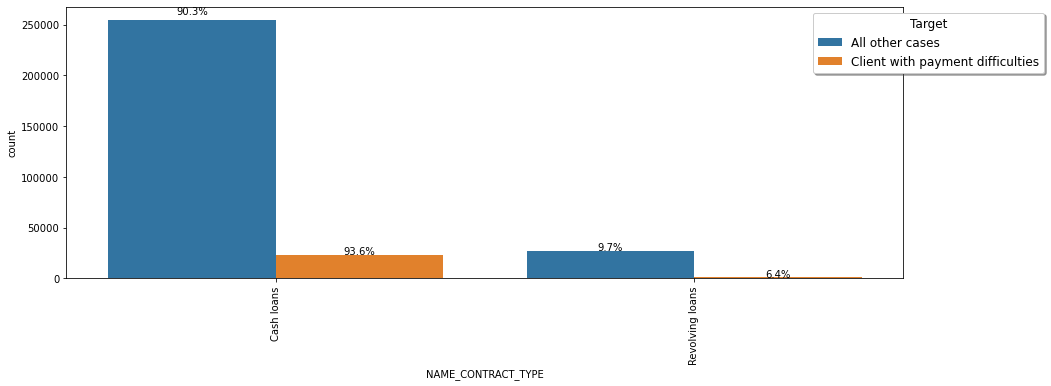

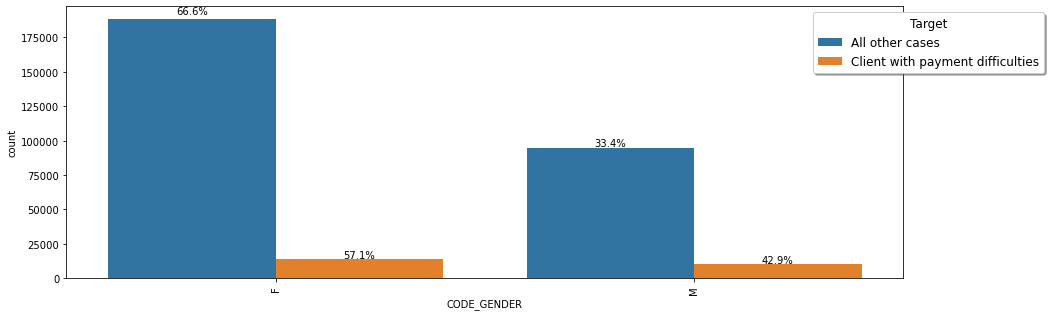

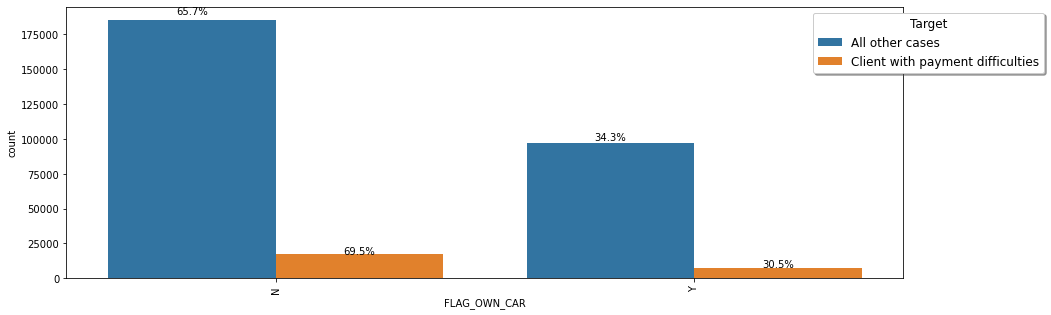

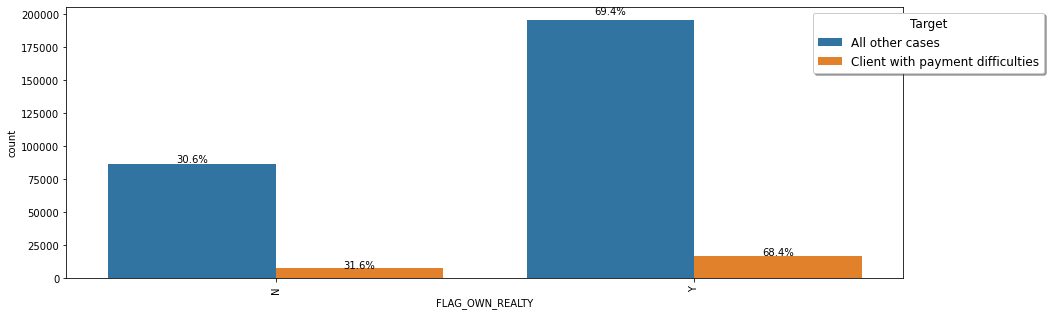

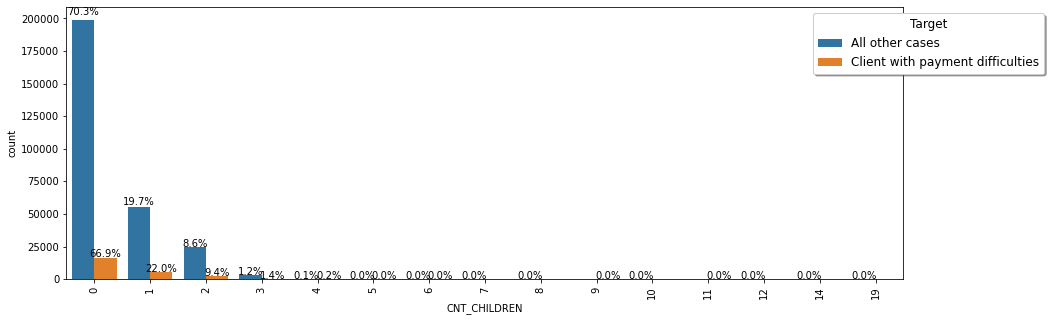

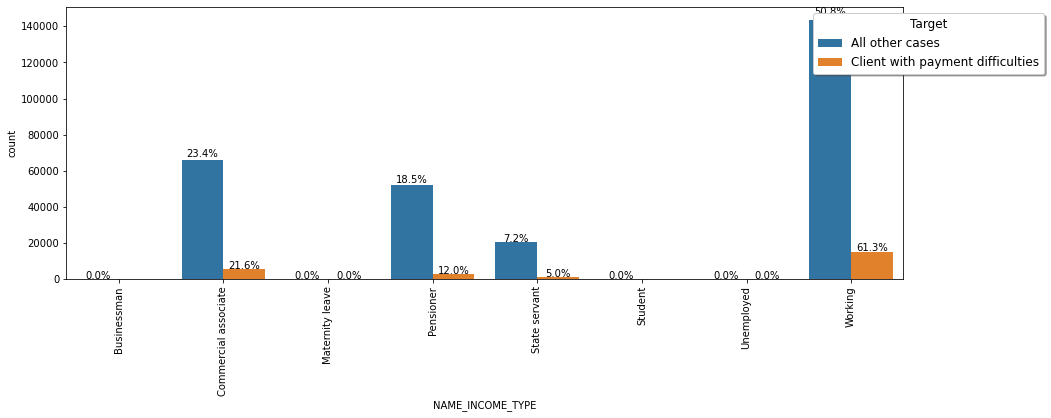

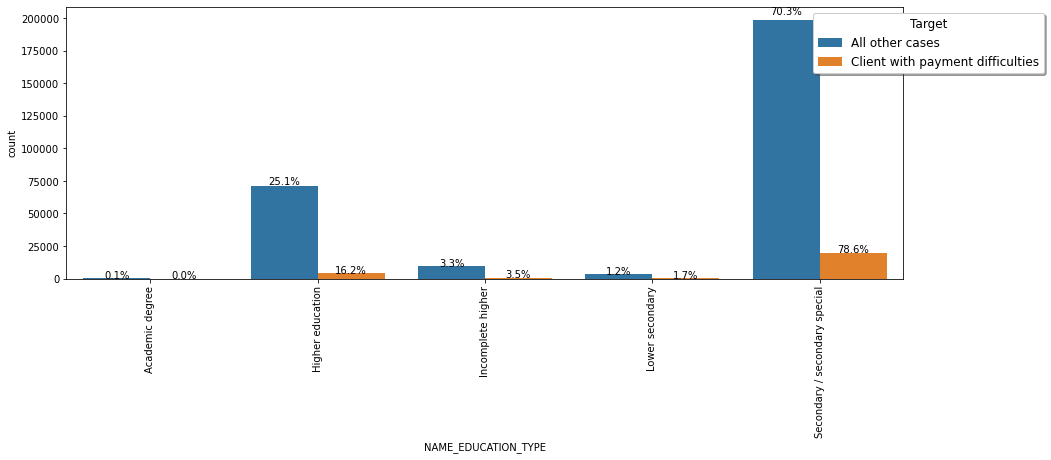

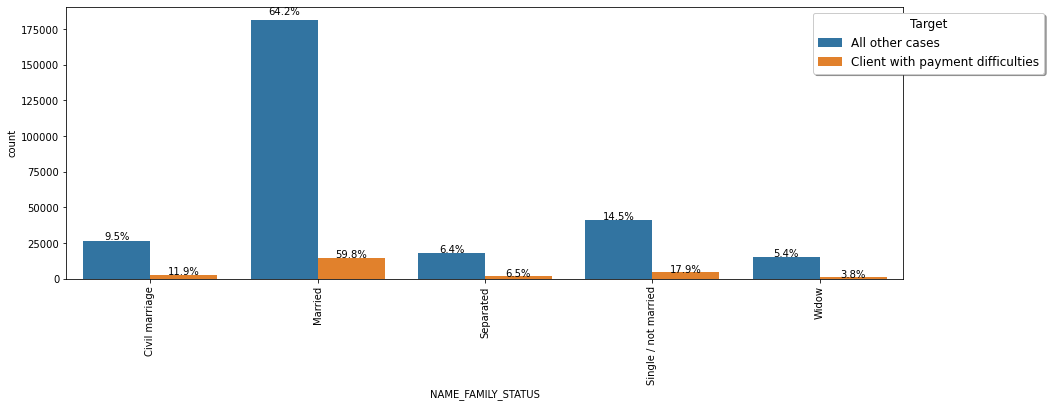

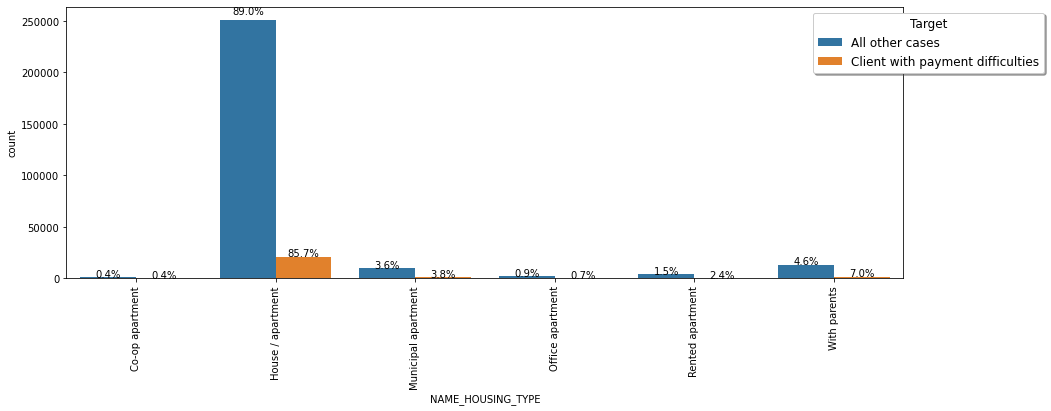

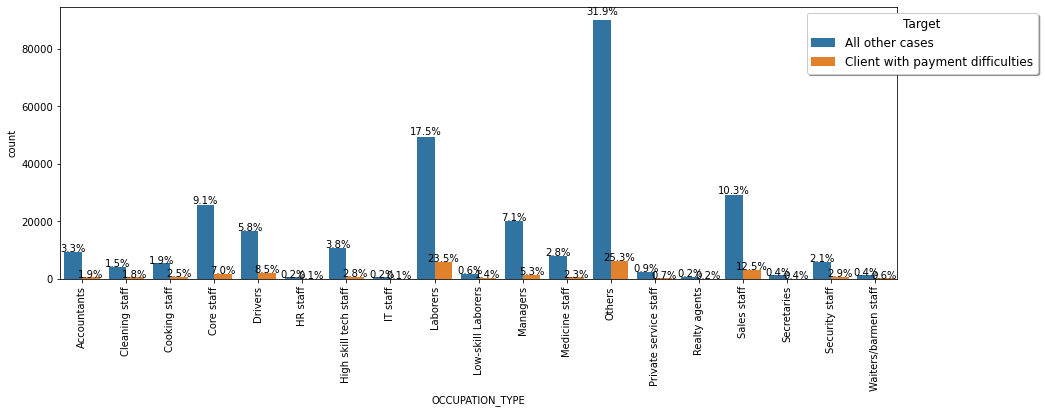

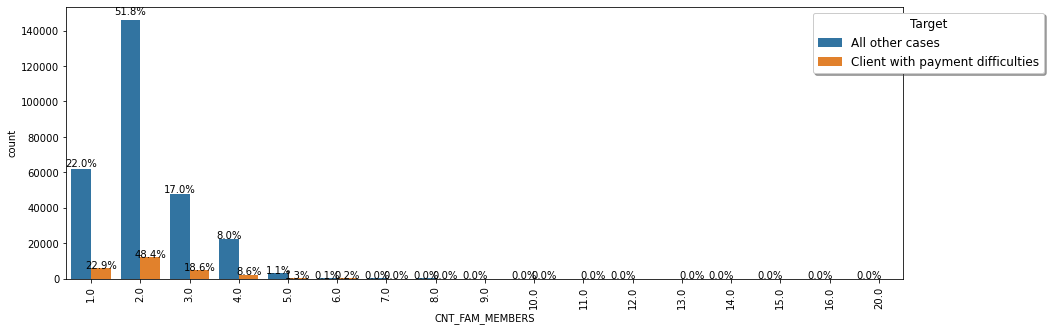

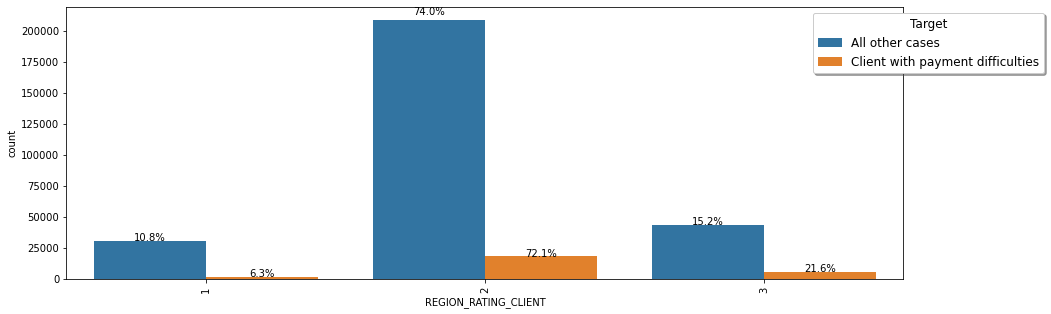

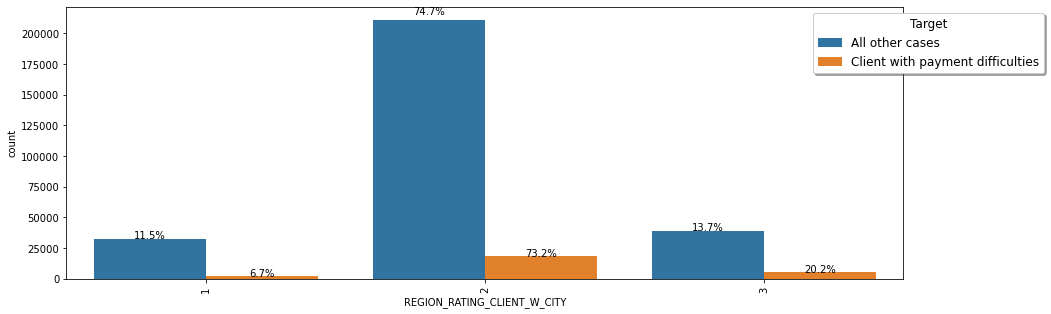

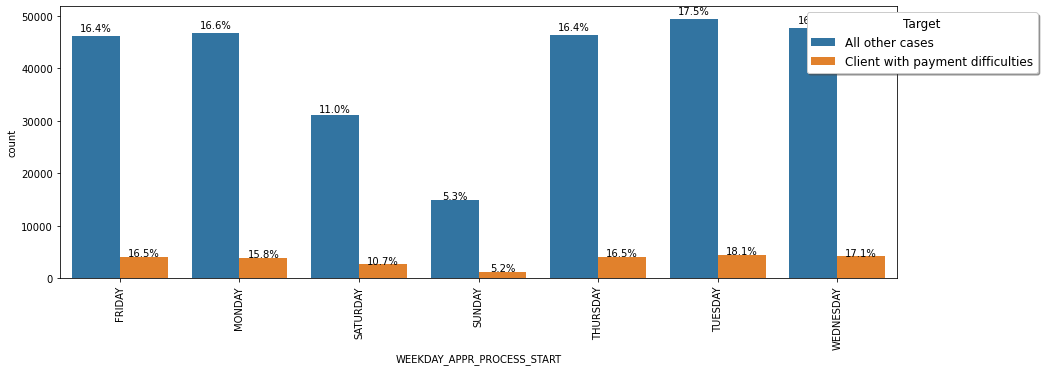

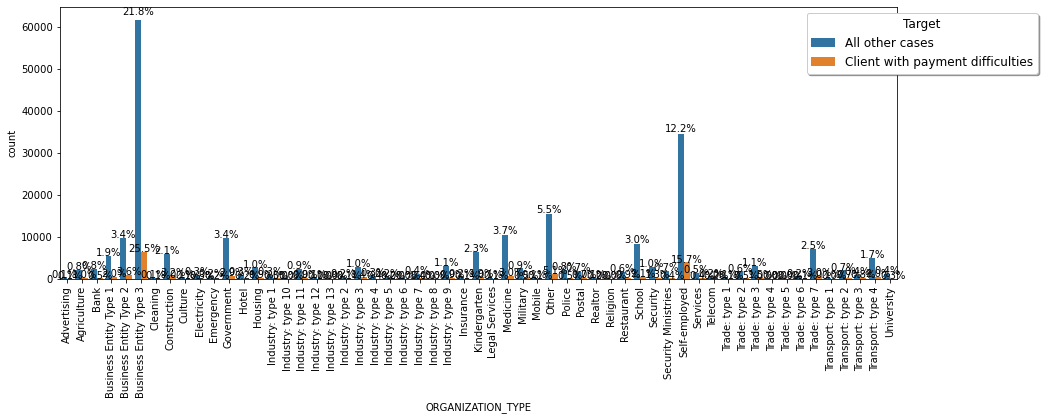

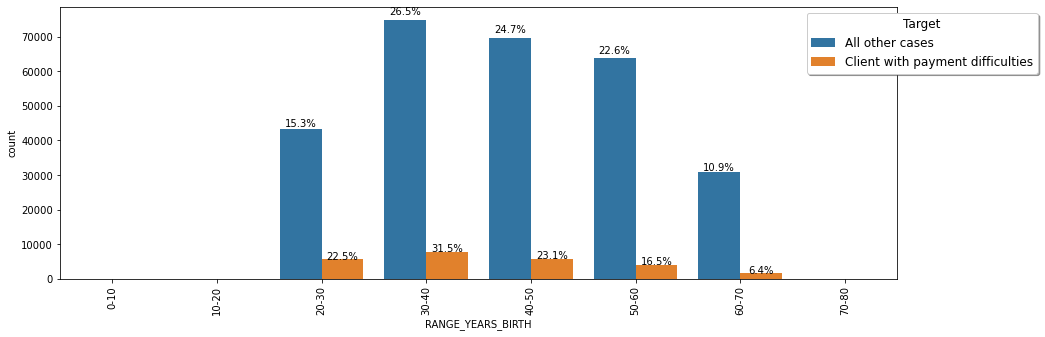

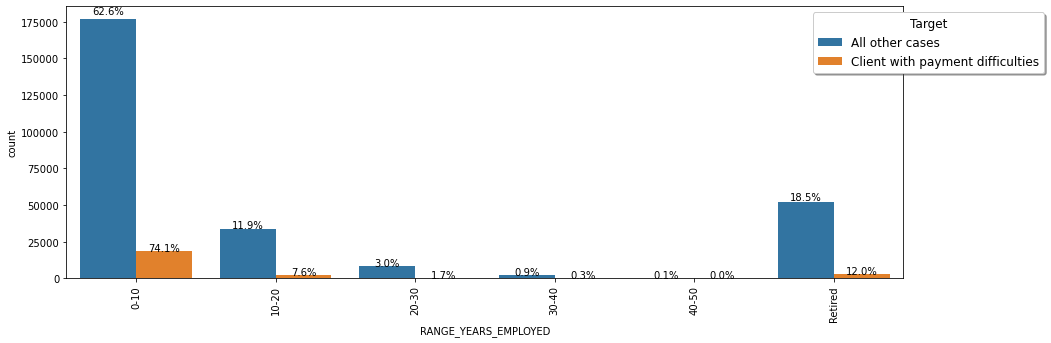

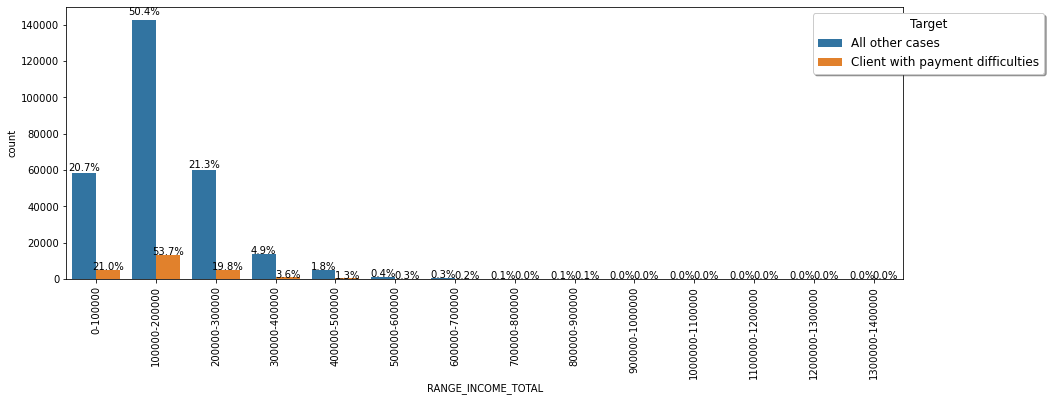

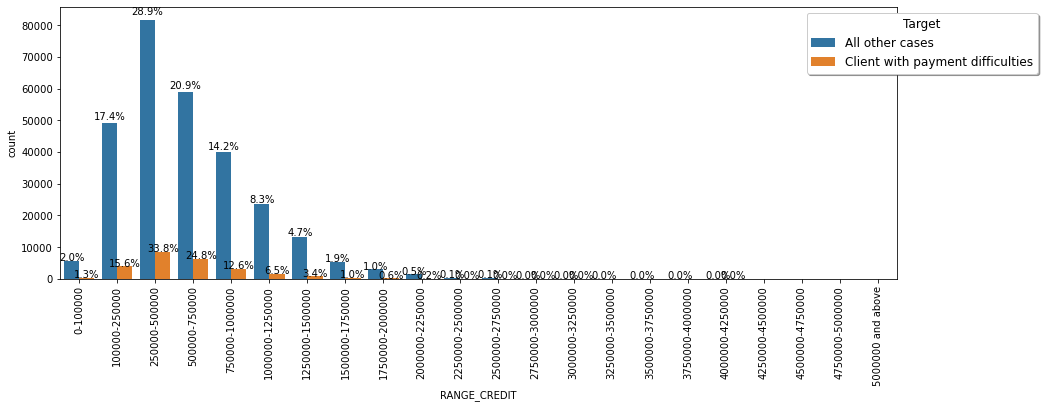

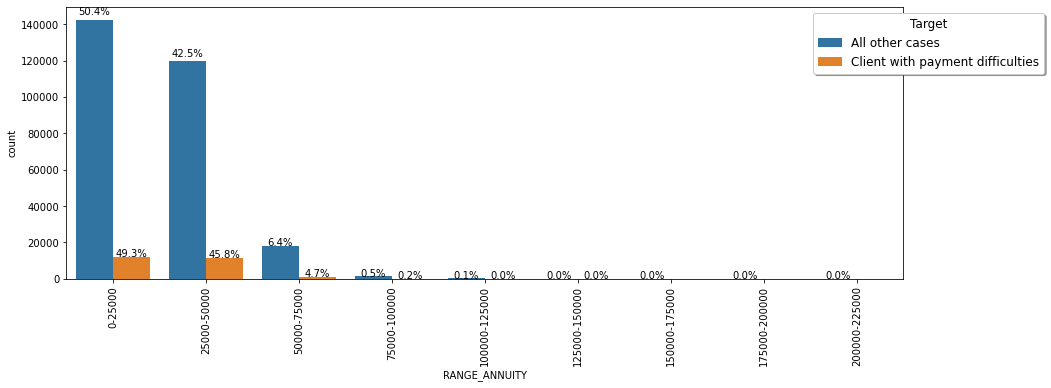

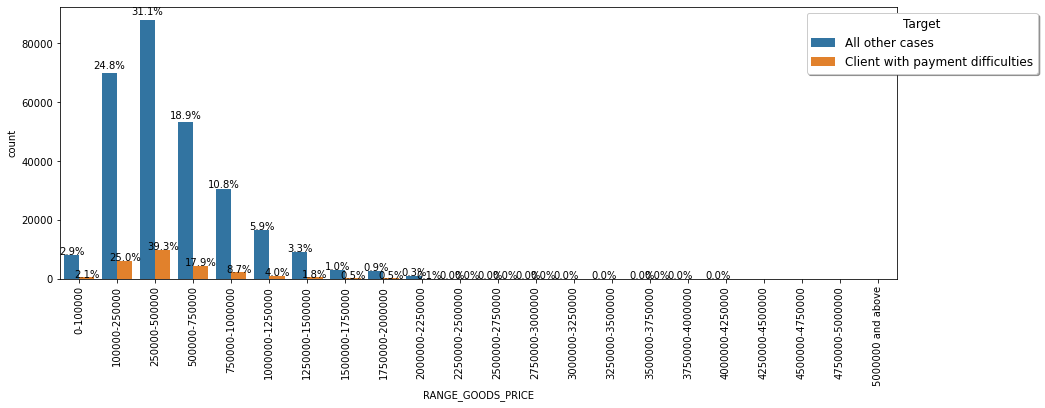

In [63]:
#comparative plot of categorical variables for every target
count=1
for i in cat:
    plt.figure(1,figsize=(15,5))
    fig= sns.countplot(x=i, hue='TARGET',data=app_data)
    plt.legend( labels=['All other cases',"Client with payment difficulties"],loc='upper center',fontsize = 12, title= "Target", title_fontsize = 12, bbox_to_anchor= (1.03, 1), shadow = True,facecolor = 'white');
    plt.xticks(rotation = 90,fontsize =10)
    count+=1
    cnt=0
    for p in fig.patches:
        cnt+=1
    l=1
# we apply percentage annotation within the target 0 and 1. i.e percentage within the targets for proper comparative study.
    for p in fig.patches:
        per=(l/cnt)*100
        if per<=50:
            total = len(t0[i])
        else:
            total = len(t1[i])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(percentage, (x + width/2, y + height*1.02),ha='center')
        l+=1
    plt.show()
    

### Inference
1. 'NAME_CONTRACT_TYPE': Person opting for cash loans has higher chance of defaulting
2. 'CODE_GENDER': Females has lesser chance of defaulting compared to male. 
3. 'FLAG_OWN_CAR': Those who own car may default less likely.
4. 'CNT_CHILDREN': As no. of children increases, likelihood of default increases.
5. 'NAME_INCOME_TYPE': Working profesionals has more likelihood to default, whereas pensioners will less likely to default.
6. 'NAME_EDUCATION_TYPE': Those with the strong academic background has less chances of defaulting
7. 'NAME_FAMILY_STATUS': Married person will less likely to default, wheras single may default frequently.
8. 'OCCUPATION_TYPE': Labourers may default more likely.
9. 'REGION_RATING_CLIENT' and 'REGION_RATING_CLIENT_W_CITY': applicants from 3rd tier city default more frequetly.
10. 'RANGE_YEARS_BIRTH': Younger aged applicants has more likelihood to default than their older counterpart. 
11. 'RANGE_YEARS_EMPLOYED': More experienced professional defaults less often than the less experienced one.
12. 'RANGE_INCOME_TOTAL': High income individual defaults less often than lesser income professionals.
13. 'RANGE_CREDIT': Credit range 2.5 to 7.5 lakh has more likelyhood to default.
14. 'RANGE_GOODS_PRICE': Goods price range 2.5 to 7.5 lakh has more likelyhood to default.

### Segmented Univariate Analysis for numerical variables

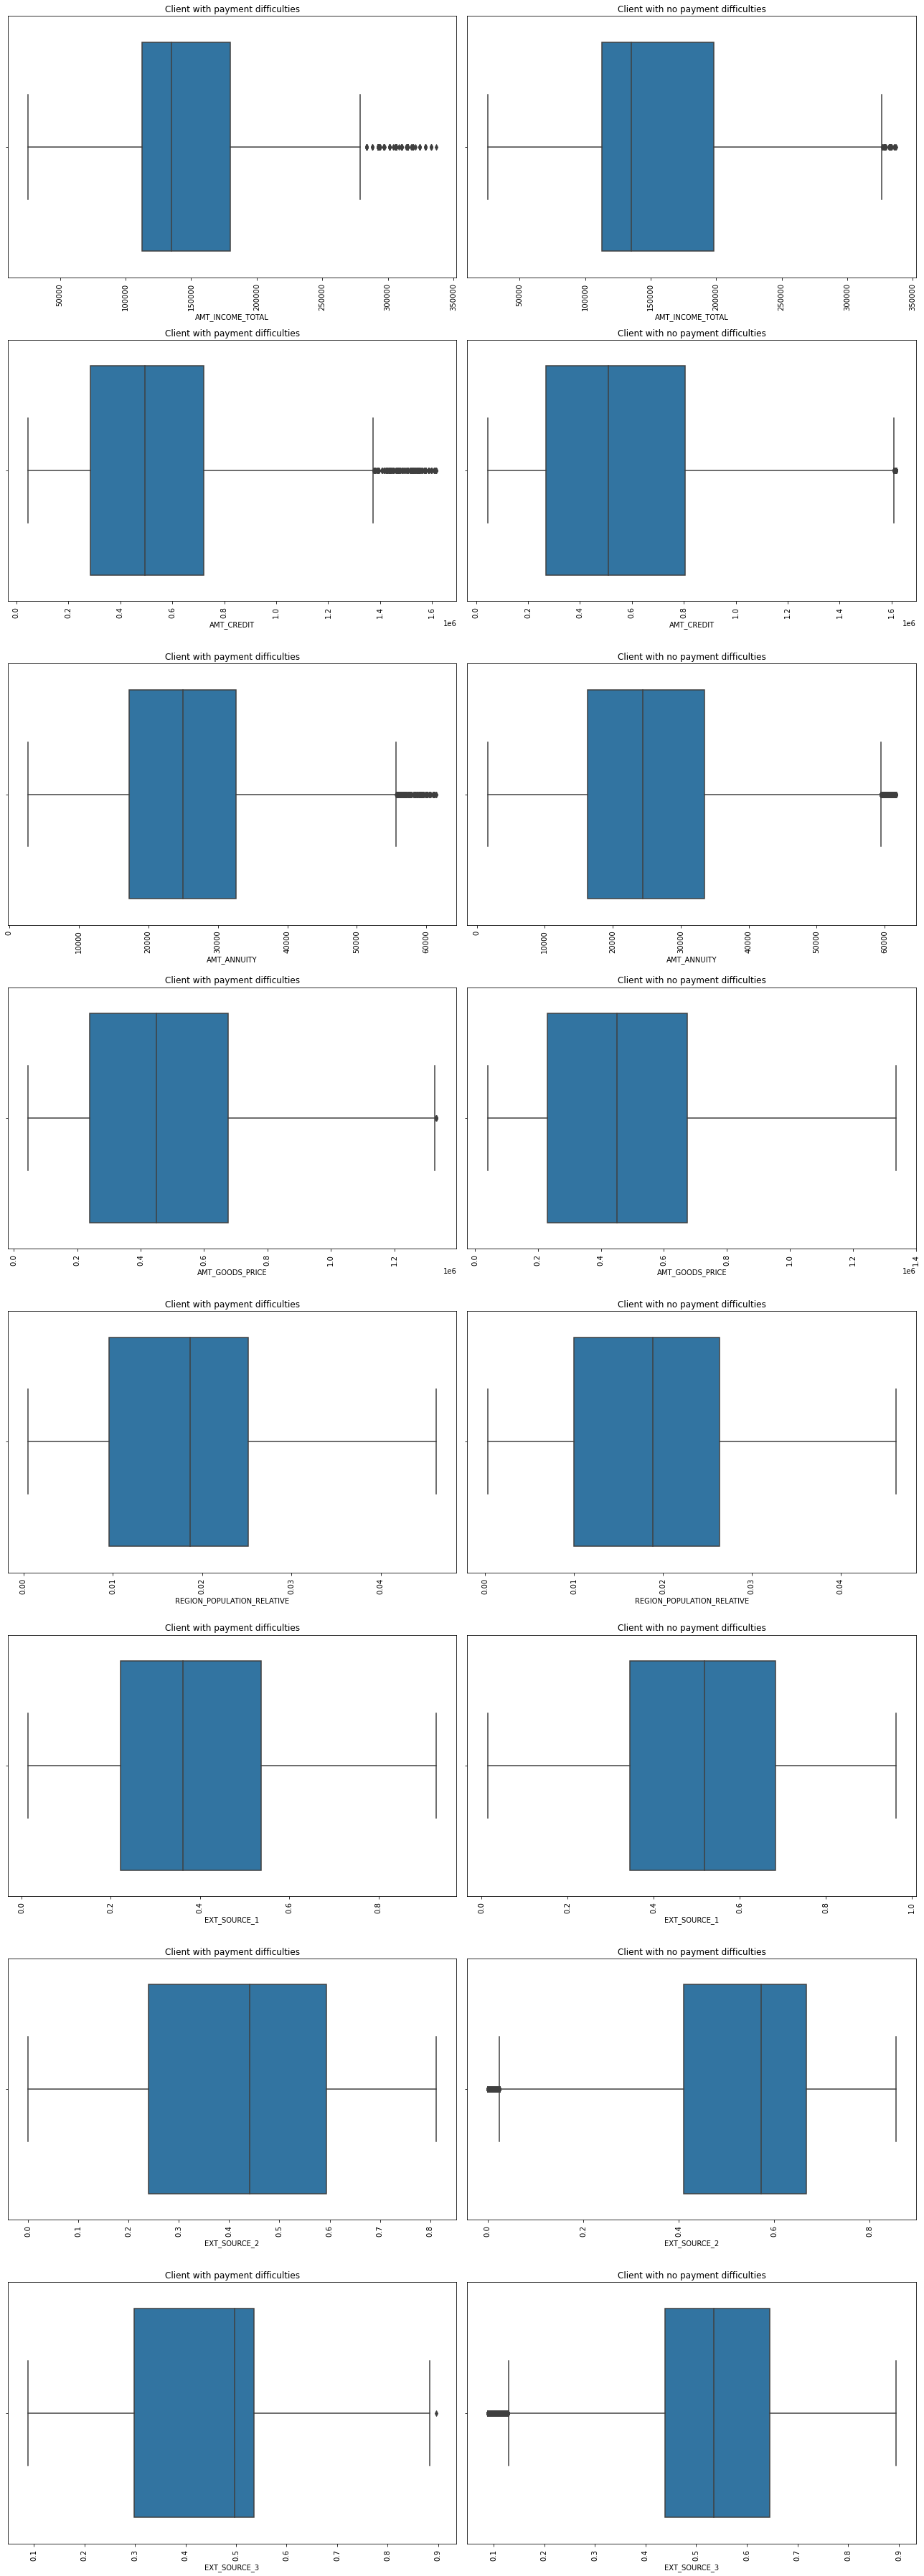

In [64]:
t3 = copy.loc[app_data.TARGET == 0]
t4 = copy.loc[app_data.TARGET == 1]
#NOTE: We have removed outliers for this analysis
plt.subplots(figsize=(18, 50))
count=1

for i in copy.columns:
    for j in [t4, t3]:
        plt.subplot(8,2,count)
        sns.boxplot(j[i], order=j[i].value_counts().index)
        plt.xticks(rotation = 90,fontsize =10)
        if count%2==0:
            plt.title("Client with no payment difficulties")
        else:
            plt.title("Client with payment difficulties")
        count+=1
        plt.tight_layout()
plt.show()
    

### Inferences
1. Non defaulters has more spread in high income range and high credit range compared with defaulters.
2. Median for credit ratings for non defaulters lies between 0.5 to 0.6 whereas it lies below 0.5 in defaulters case. Therefore credit high rated client has less likelihood to default 

### Correlations

### 1. Top 10 Correlation matrix

In [65]:
# changing data type of years to float from category
t0.YEARS_BIRTH= app_data.YEARS_BIRTH.astype('float64')
t0.YEARS_EMPLOYED = app_data.YEARS_EMPLOYED.astype('float64')
t1.YEARS_BIRTH= app_data.YEARS_BIRTH.astype('float64')
t1.YEARS_EMPLOYED = app_data.YEARS_EMPLOYED.astype('float64')

In [66]:
# For those having payment difficulty
corr=t1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3','YEARS_BIRTH', 'YEARS_EMPLOYED']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [67]:
#assigning column names and dropping null values
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()


In [68]:
#arraning top 10 correlation in decreasing order to get top 10.
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

VAR1                        VAR2  CORRELATION  CORR_ABS
31  AMT_GOODS_PRICE                  AMT_CREDIT     0.983103  0.983103
32  AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699  0.752699
21      AMT_ANNUITY                  AMT_CREDIT     0.751957  0.751957
98   YEARS_EMPLOYED                 YEARS_BIRTH     0.624261  0.624261
85      YEARS_BIRTH                EXT_SOURCE_1     0.569770  0.569770
95   YEARS_EMPLOYED                EXT_SOURCE_1     0.335915  0.335915
53     EXT_SOURCE_1             AMT_GOODS_PRICE     0.188550  0.188550
51     EXT_SOURCE_1                  AMT_CREDIT     0.182104  0.182104
65     EXT_SOURCE_2                EXT_SOURCE_1     0.171543  0.171543
64     EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.170096  0.170096

In [69]:
# For those who does not have payment difficulty
corr1=t0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3','YEARS_BIRTH', 'YEARS_EMPLOYED']].corr(method = 'pearson')
corr1=corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1_df=corr1.unstack().reset_index()

In [70]:
#assigning column names and dropping null values
corr1_df.columns = ['VAR1','VAR2','CORRELATION']
corr1_df.dropna(subset=['CORRELATION'],inplace=True)
corr1_df['CORR_ABS']=corr1_df['CORRELATION'].abs()

In [71]:
#arraning top 10 correlation in decreasing order to get top 10.
corr1_df.sort_values('CORR_ABS', ascending=False).head(10)

VAR1                        VAR2  CORRELATION  CORR_ABS
31  AMT_GOODS_PRICE                  AMT_CREDIT     0.987251  0.987251
32  AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686  0.776686
21      AMT_ANNUITY                  AMT_CREDIT     0.771114  0.771114
98   YEARS_EMPLOYED                 YEARS_BIRTH     0.674404  0.674404
85      YEARS_BIRTH                EXT_SOURCE_1     0.600895  0.600895
20      AMT_ANNUITY            AMT_INCOME_TOTAL     0.418743  0.418743
95   YEARS_EMPLOYED                EXT_SOURCE_1     0.359954  0.359954
30  AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.349457  0.349457
10       AMT_CREDIT            AMT_INCOME_TOTAL     0.342573  0.342573
64     EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.198441  0.198441

We can see that top 6 correlations for both Targets are same and the remaining 4 is different

### Heatmap

In [72]:
t3 = copy.loc[app_data.TARGET == 0]
t4 = copy.loc[app_data.TARGET == 1]

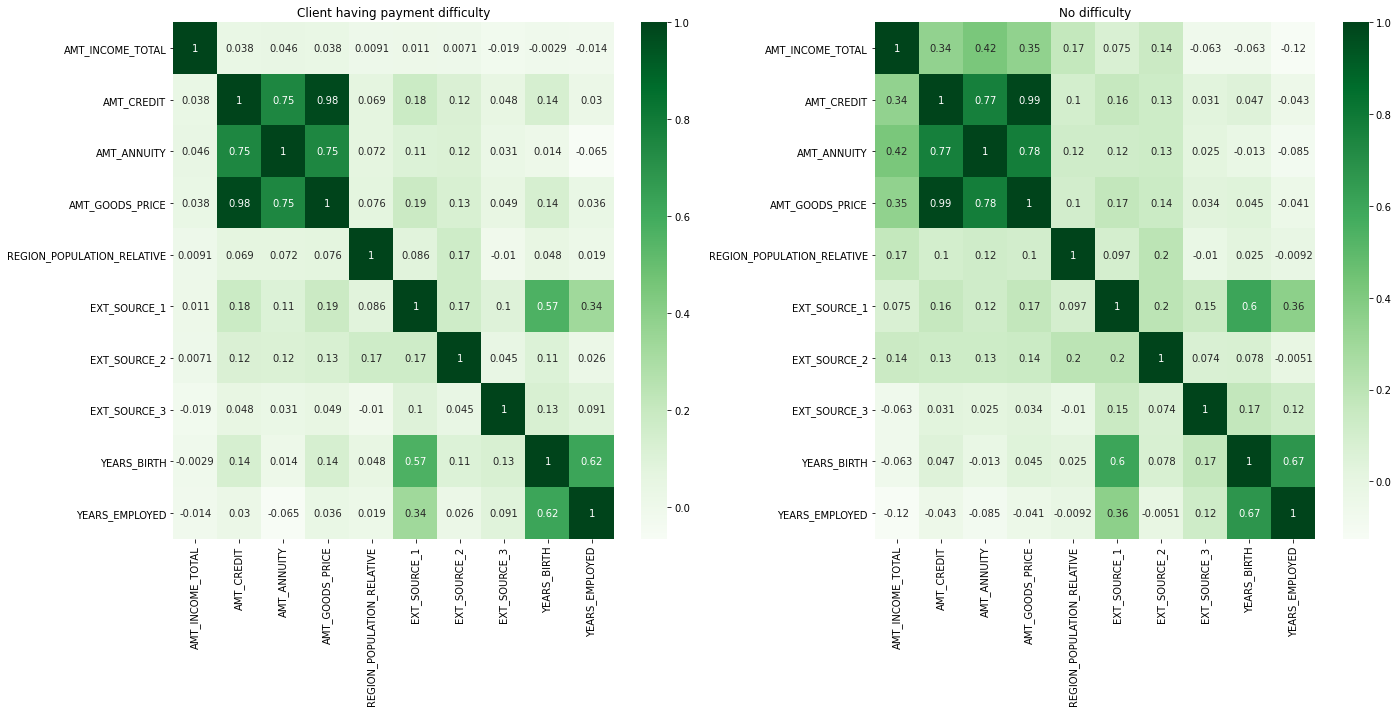

In [73]:
h1 = t1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3','YEARS_BIRTH', 'YEARS_EMPLOYED']].corr(method = 'pearson')
h0 = t0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3','YEARS_BIRTH', 'YEARS_EMPLOYED']].corr(method = 'pearson')
plt.figure(figsize=[20,10])
s1=plt.subplot(1,2,1)
s2=plt.subplot(1,2,2)
sns.heatmap(h1,cmap = "Greens", annot=True, ax=s1)
sns.heatmap(h0,cmap = "Greens", annot=True, ax=s2)
s1.set_title('Client having payment difficulty')
s2.set_title('No difficulty')
plt.tight_layout()
plt.show()

### Bivariate analysis

#### 1. Bivariate Analysis of Numerical vs Numerical Variables

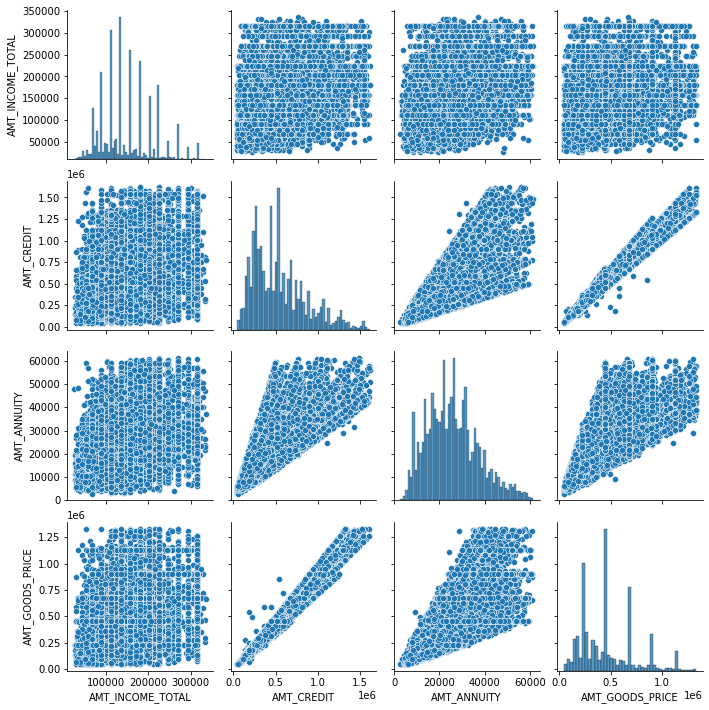

In [74]:
# for client with payment difficulties
p1 = t4[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]
sns.pairplot(p1)
plt.show()

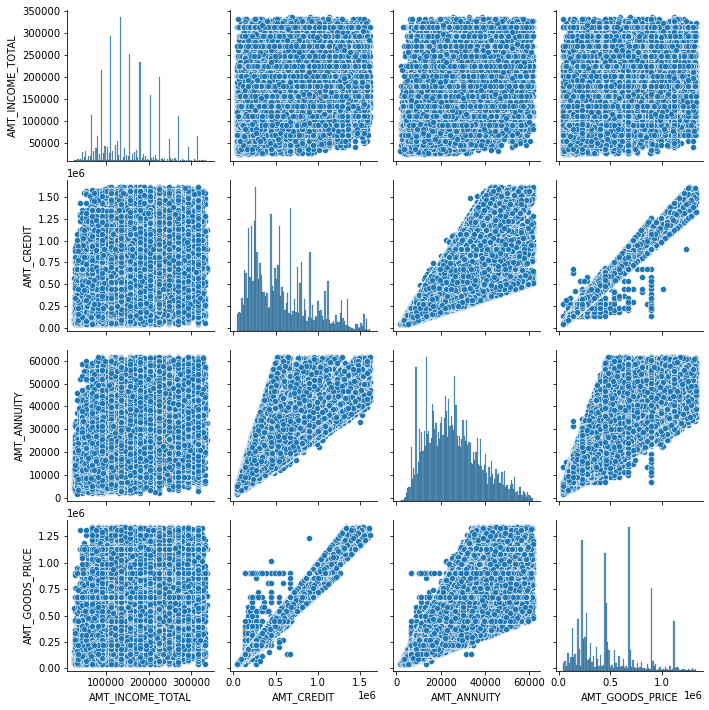

In [75]:
# for client with other cases
p0 = t3[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]
sns.pairplot(p0)
plt.show()

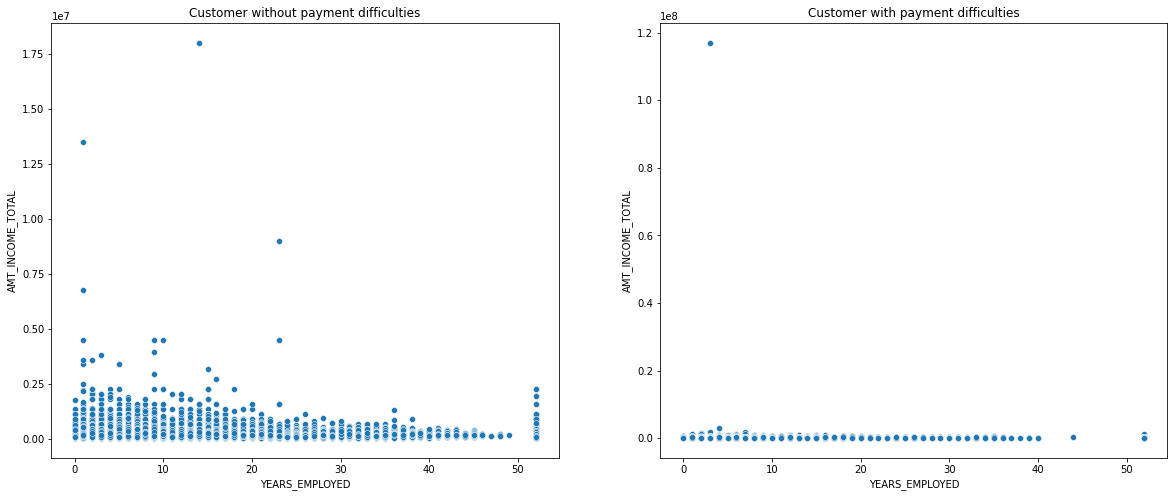

In [76]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(x=t0.YEARS_EMPLOYED,y=t0.AMT_INCOME_TOTAL)
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.scatterplot(x=t1.YEARS_EMPLOYED,y=t1.AMT_INCOME_TOTAL)
plt.title('Customer with payment difficulties')
plt.show()

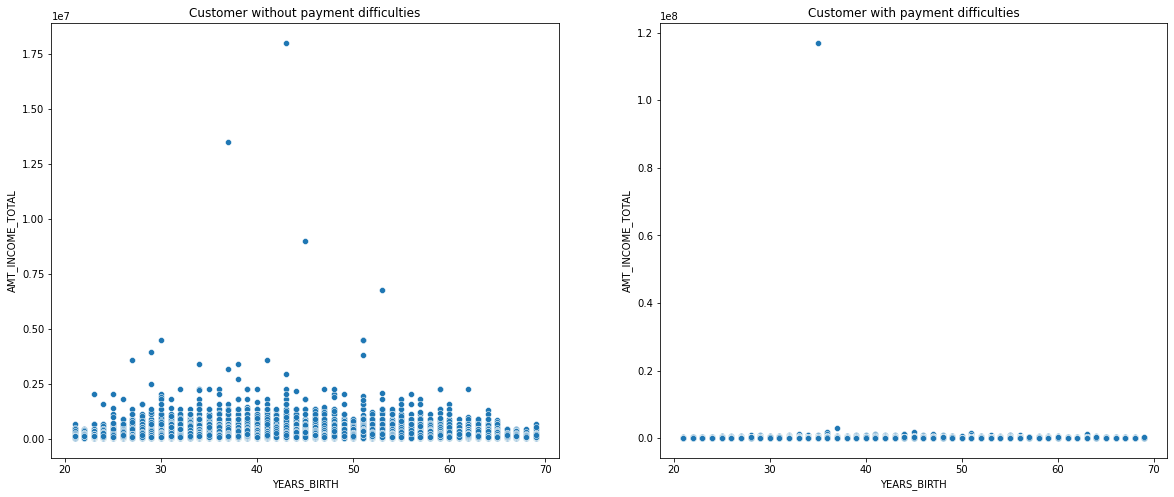

In [77]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(x=t0.YEARS_BIRTH,y=t0.AMT_INCOME_TOTAL)
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.scatterplot(x=t1.YEARS_BIRTH,y=t1.AMT_INCOME_TOTAL)
plt.title('Customer with payment difficulties')
plt.show()

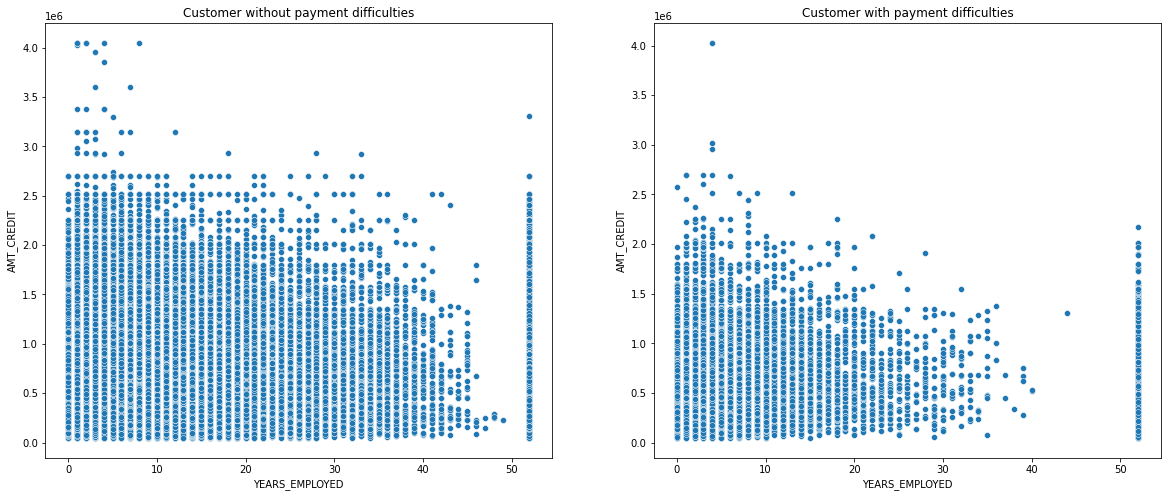

In [78]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(x=t0.YEARS_EMPLOYED,y=t0.AMT_CREDIT)
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.scatterplot(x=t1.YEARS_EMPLOYED,y=t1.AMT_CREDIT)
plt.title('Customer with payment difficulties')
plt.show()

#### Inference 
Clients who has been given les credit amount and are employed for lesser years will default more likely

#### 2. Bivariate Analysis of Numerical-Categorical

In [79]:
# concatnating catagorical columns with numerical columns without outliers
copy1= pd.concat([app_data[cat],copy], axis=1)
copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       307221 non-null  category
 1   NAME_CONTRACT_TYPE           307221 non-null  category
 2   CODE_GENDER                  307217 non-null  category
 3   FLAG_OWN_CAR                 307221 non-null  category
 4   FLAG_OWN_REALTY              307221 non-null  category
 5   CNT_CHILDREN                 307221 non-null  category
 6   NAME_INCOME_TYPE             307221 non-null  category
 7   NAME_EDUCATION_TYPE          307221 non-null  category
 8   NAME_FAMILY_STATUS           307221 non-null  category
 9   NAME_HOUSING_TYPE            307221 non-null  category
 10  OCCUPATION_TYPE              307221 non-null  category
 11  CNT_FAM_MEMBERS              307221 non-null  category
 12  REGION_RATING_CLIENT         307221 non-null

<Figure size 1800x1440 with 0 Axes>

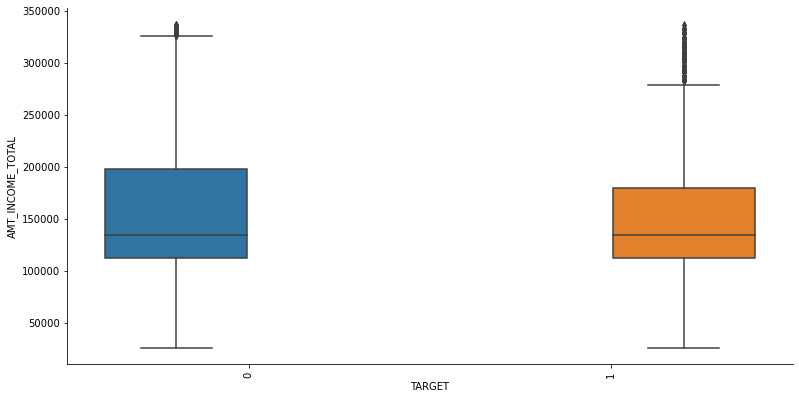

<Figure size 1800x1440 with 0 Axes>

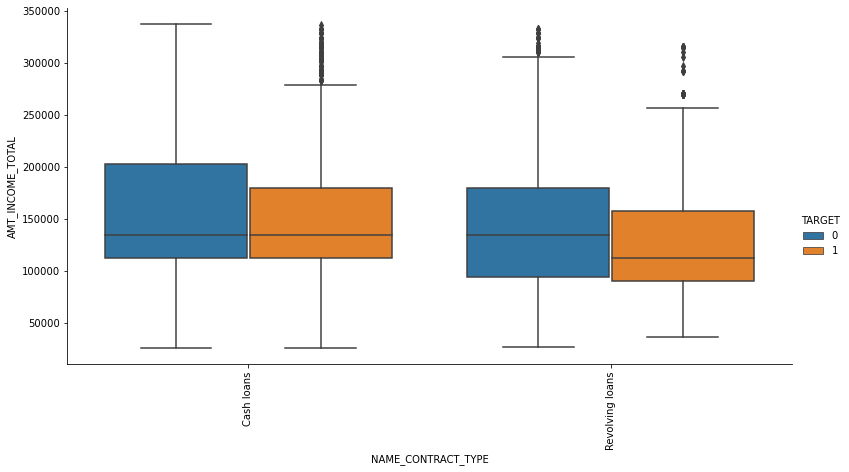

<Figure size 1800x1440 with 0 Axes>

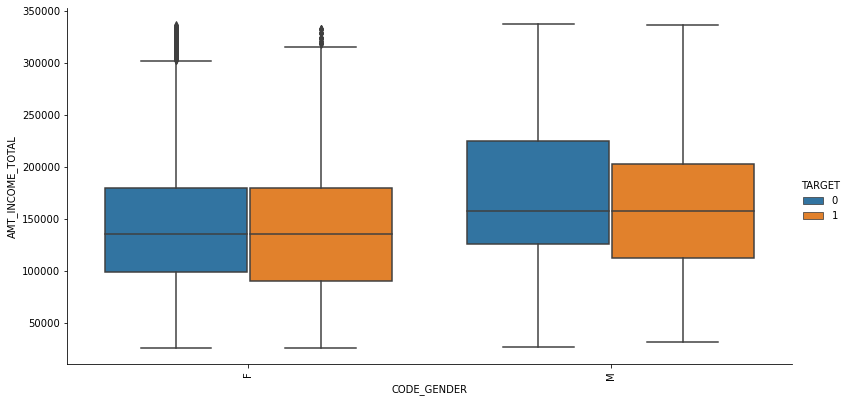

<Figure size 1800x1440 with 0 Axes>

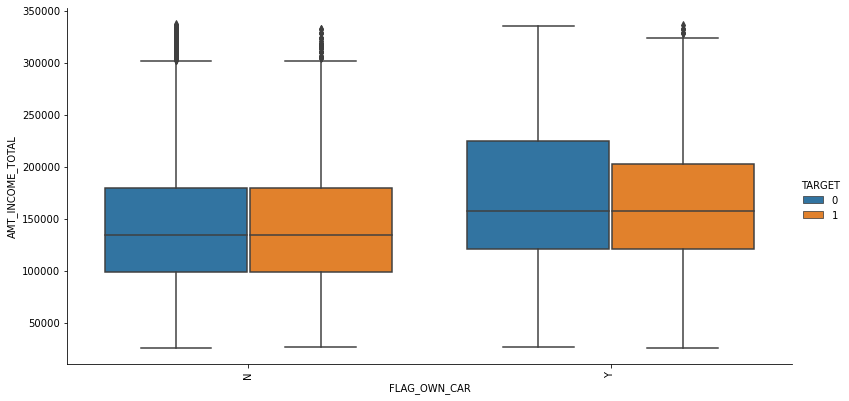

<Figure size 1800x1440 with 0 Axes>

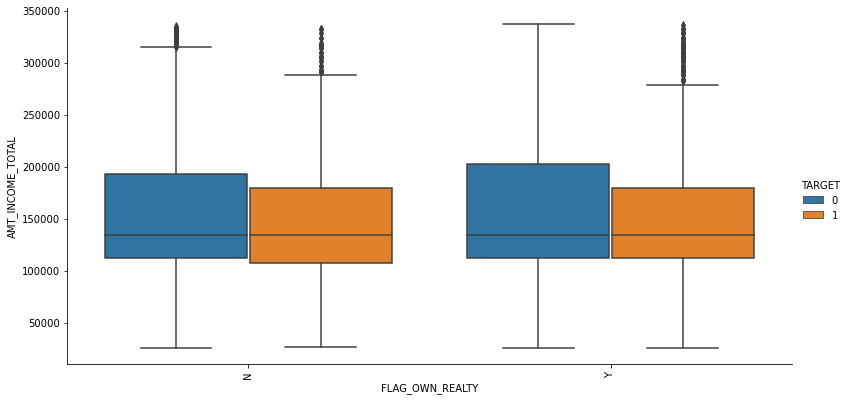

<Figure size 1800x1440 with 0 Axes>

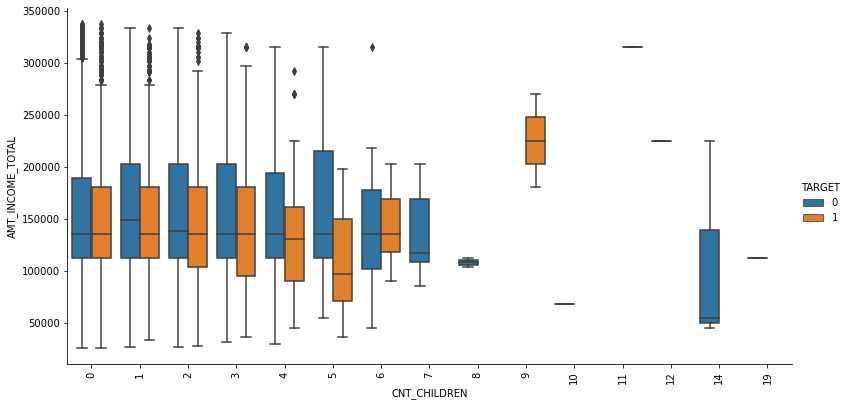

<Figure size 1800x1440 with 0 Axes>

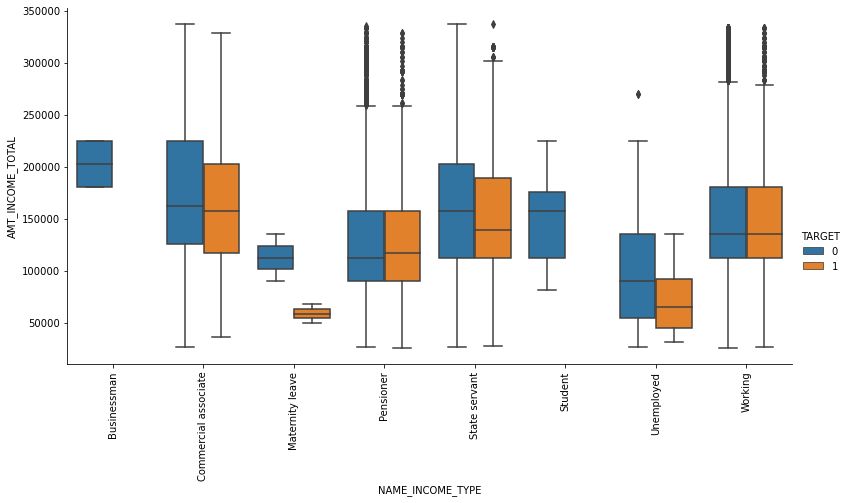

<Figure size 1800x1440 with 0 Axes>

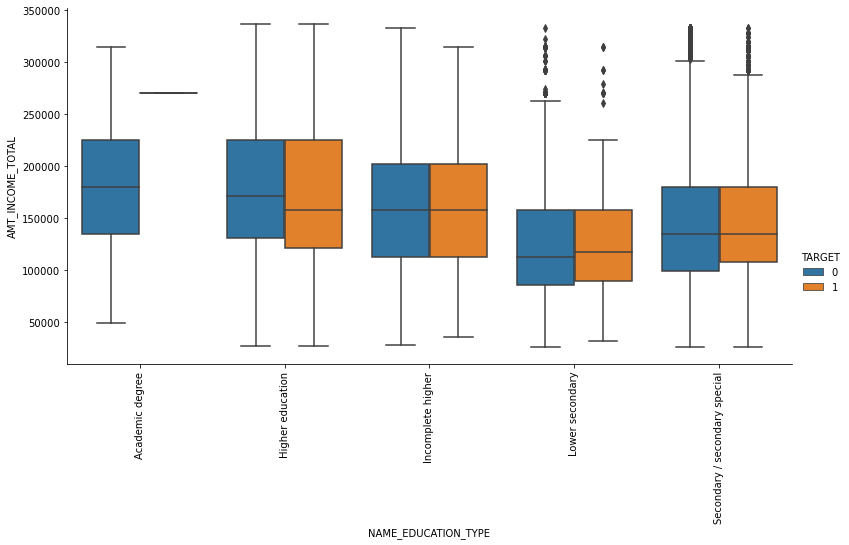

<Figure size 1800x1440 with 0 Axes>

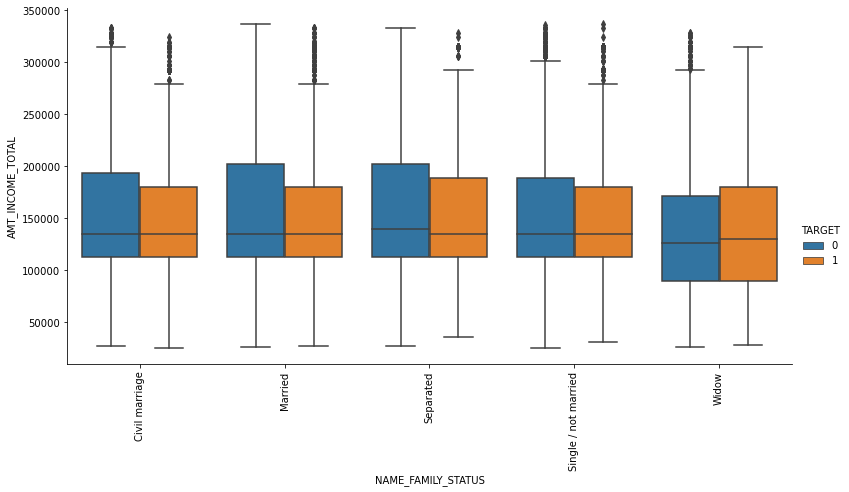

<Figure size 1800x1440 with 0 Axes>

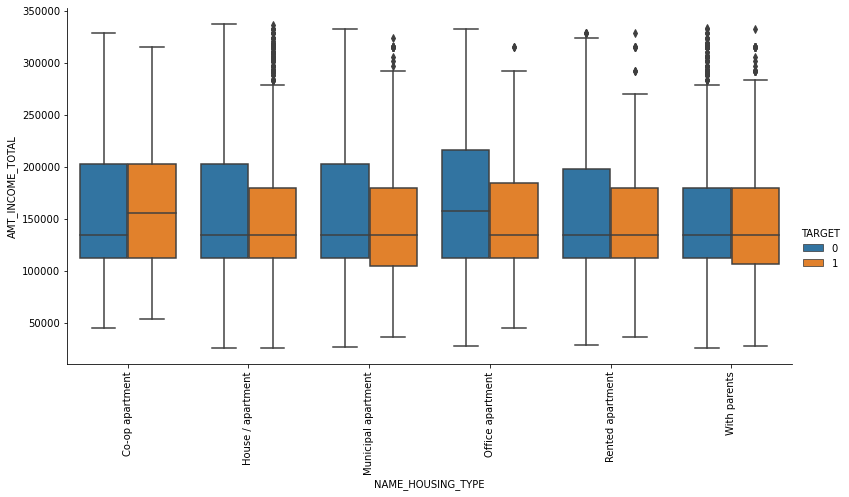

<Figure size 1800x1440 with 0 Axes>

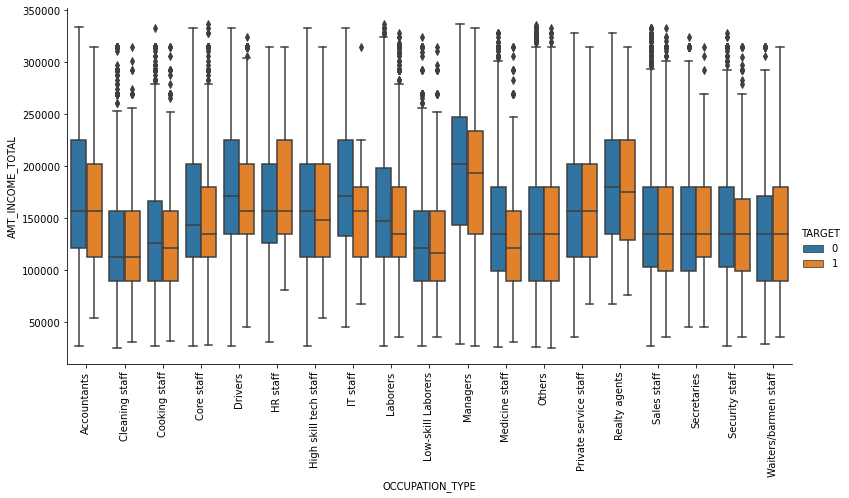

<Figure size 1800x1440 with 0 Axes>

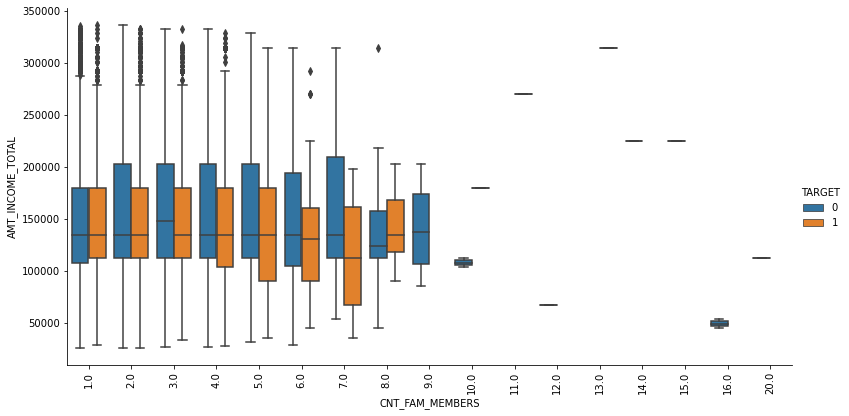

<Figure size 1800x1440 with 0 Axes>

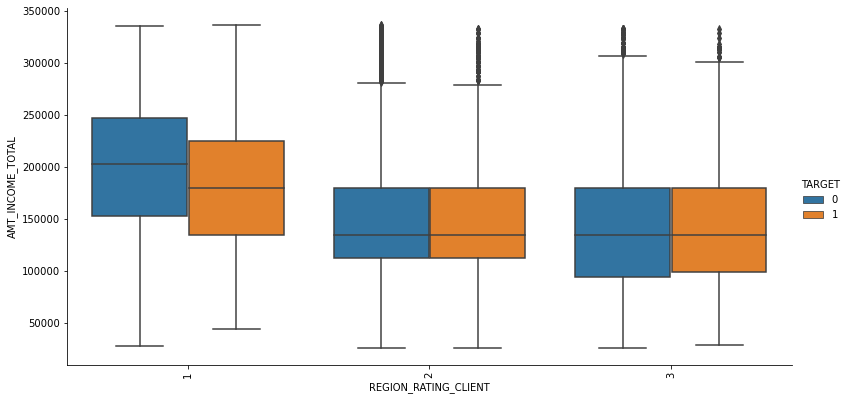

<Figure size 1800x1440 with 0 Axes>

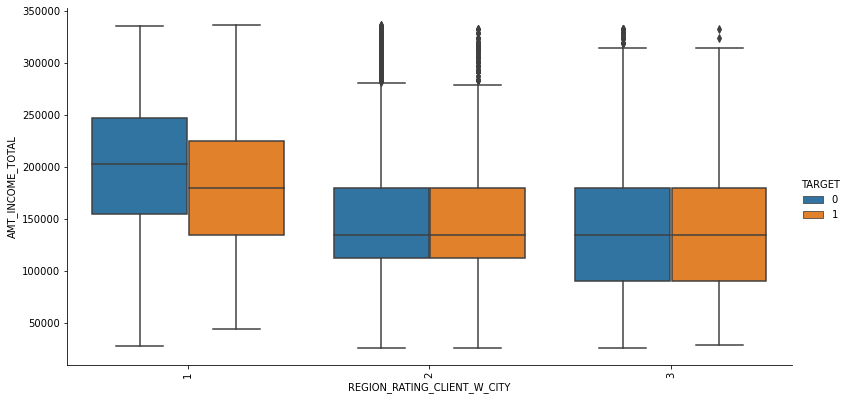

<Figure size 1800x1440 with 0 Axes>

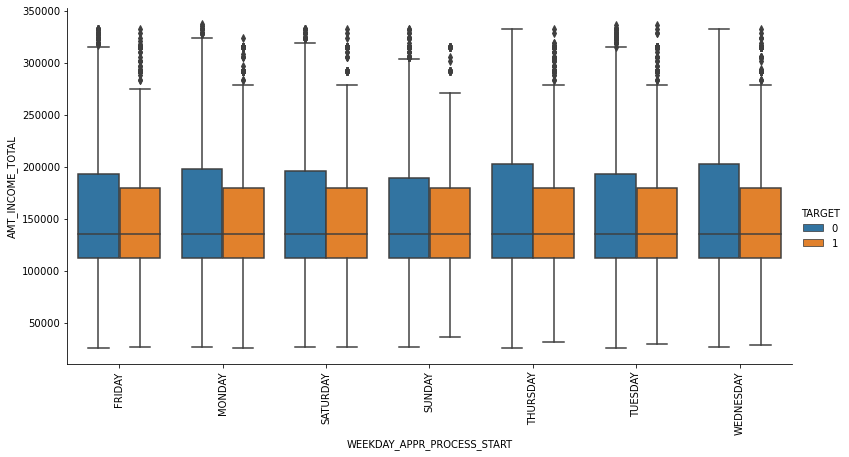

<Figure size 1800x1440 with 0 Axes>

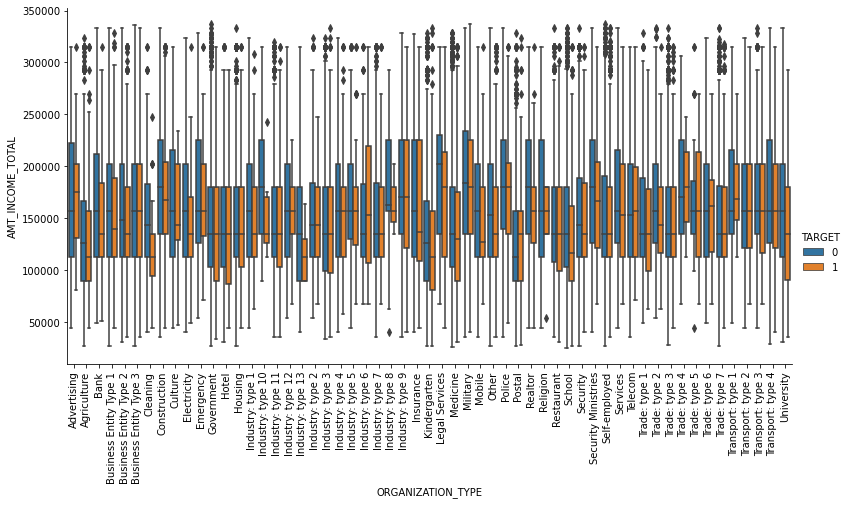

<Figure size 1800x1440 with 0 Axes>

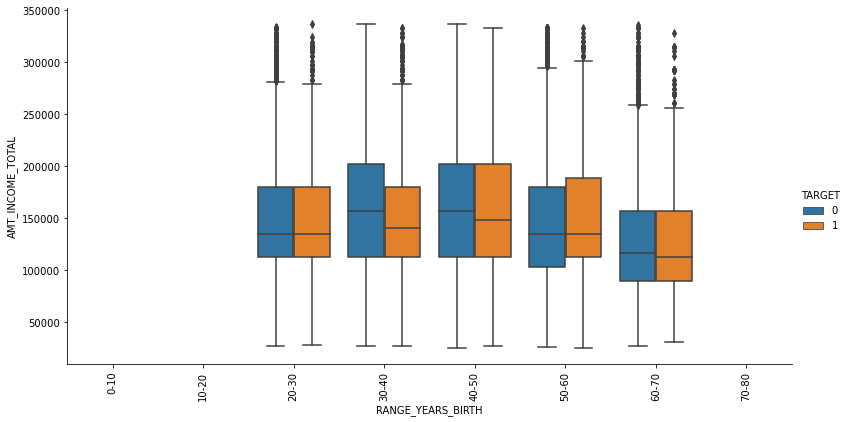

<Figure size 1800x1440 with 0 Axes>

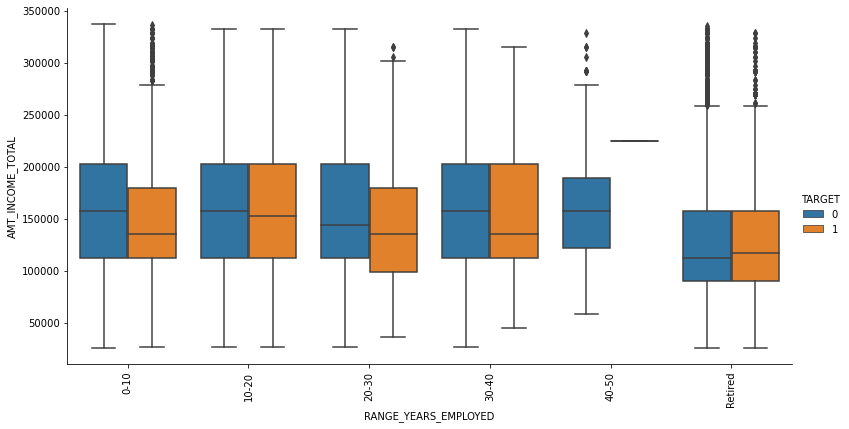

<Figure size 1800x1440 with 0 Axes>

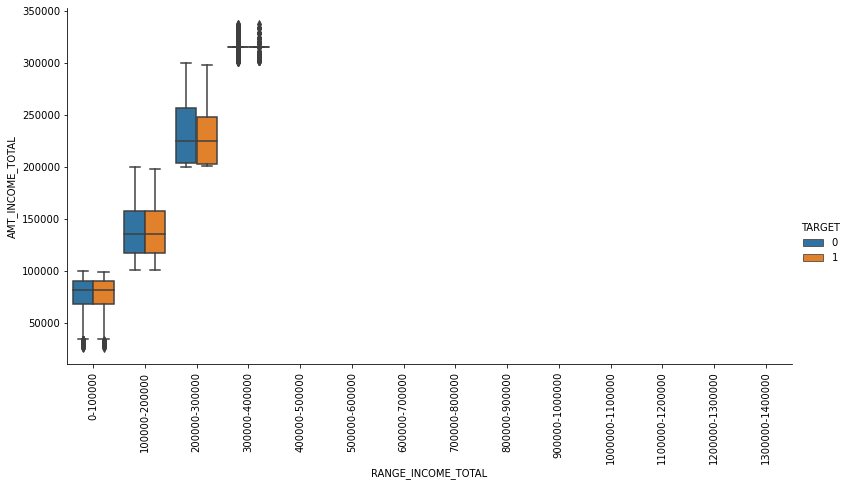

<Figure size 1800x1440 with 0 Axes>

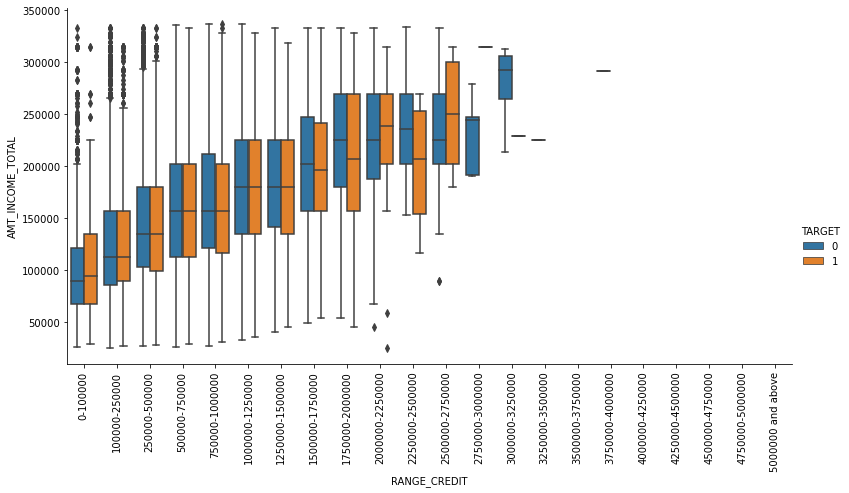

<Figure size 1800x1440 with 0 Axes>

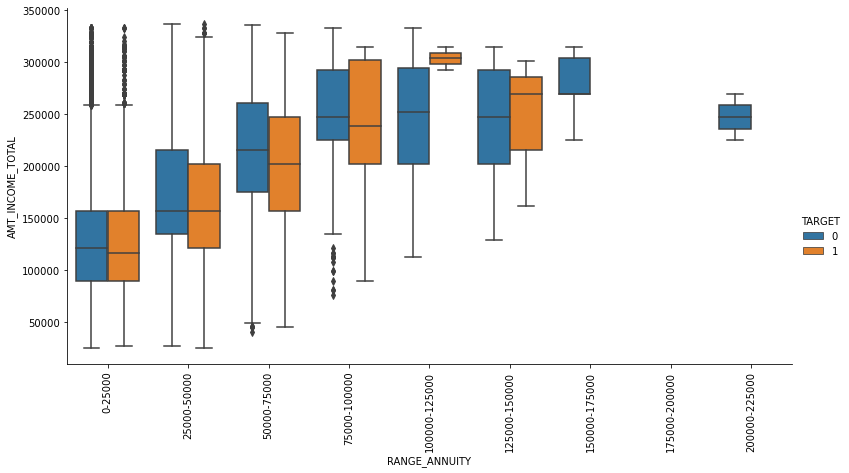

<Figure size 1800x1440 with 0 Axes>

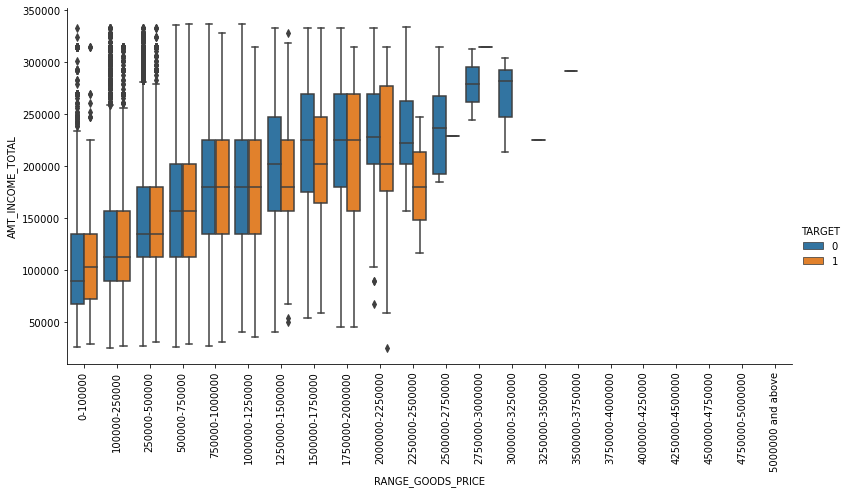

In [80]:
# income levels for various categorical variables

for i in cat:
    plt.figure(figsize=(25,20))
    fig= sns.catplot(x=i, y="AMT_INCOME_TOTAL", hue="TARGET", kind="box", data = copy1, height=5.5, aspect=2)

    plt.xticks(rotation = 90,fontsize =10)
    count+=1
    plt.show()
    

### Inference
1. In tier 1 cities, defaulting clients has median income lesser than the non defaulting clients, no considerable difference between.
2. In almost all graphs, those difaulting has median income lesser than those not defaulting.

<Figure size 1800x1440 with 0 Axes>

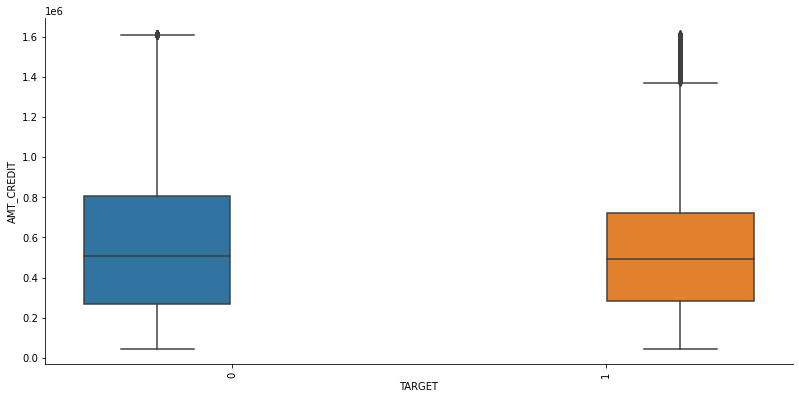

<Figure size 1800x1440 with 0 Axes>

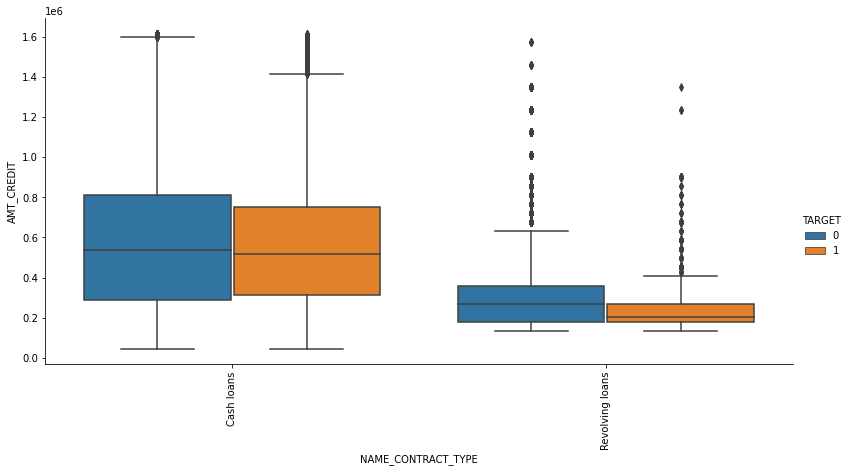

<Figure size 1800x1440 with 0 Axes>

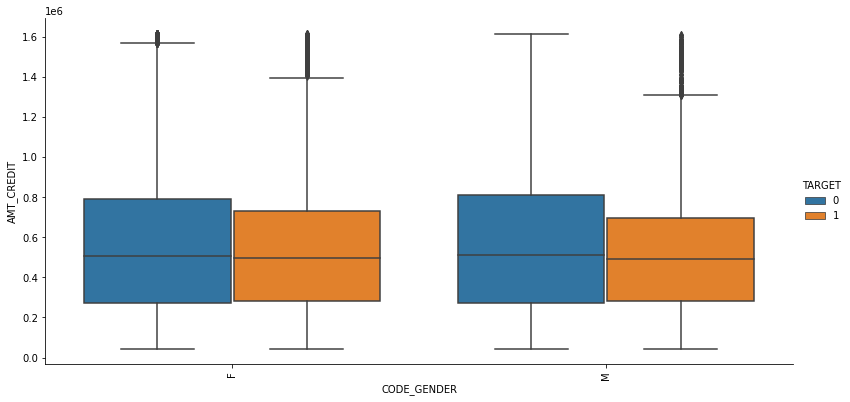

<Figure size 1800x1440 with 0 Axes>

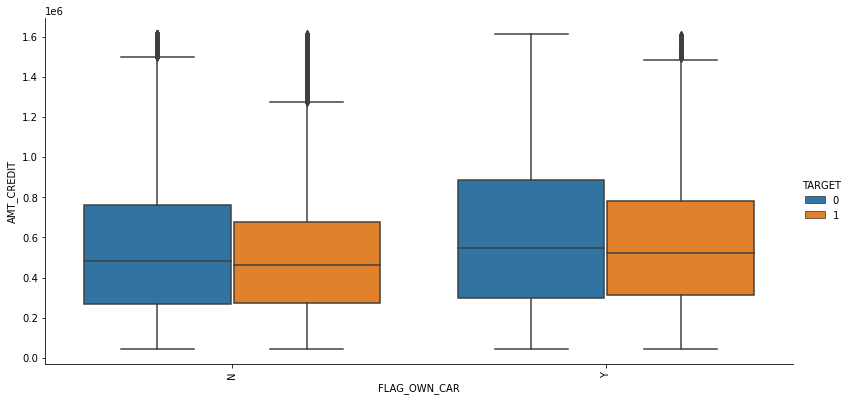

<Figure size 1800x1440 with 0 Axes>

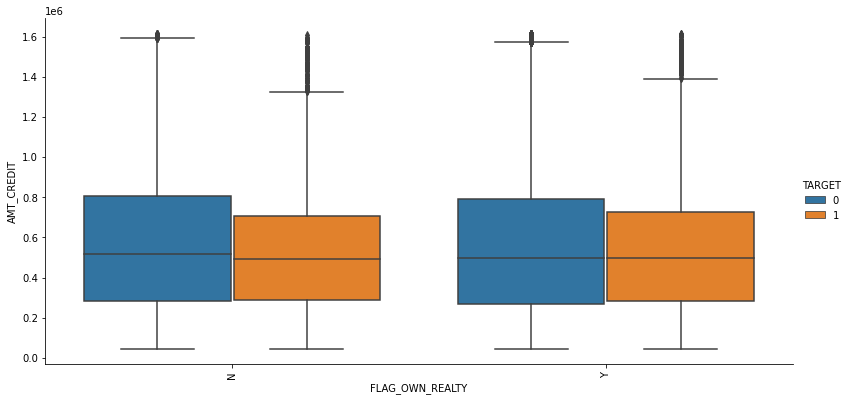

<Figure size 1800x1440 with 0 Axes>

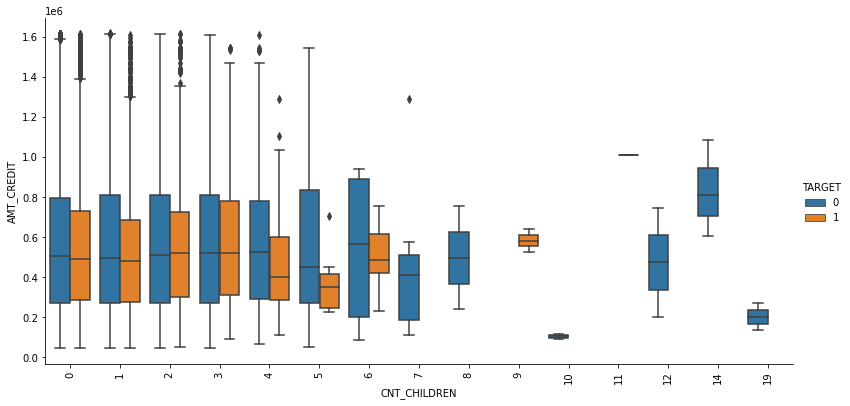

<Figure size 1800x1440 with 0 Axes>

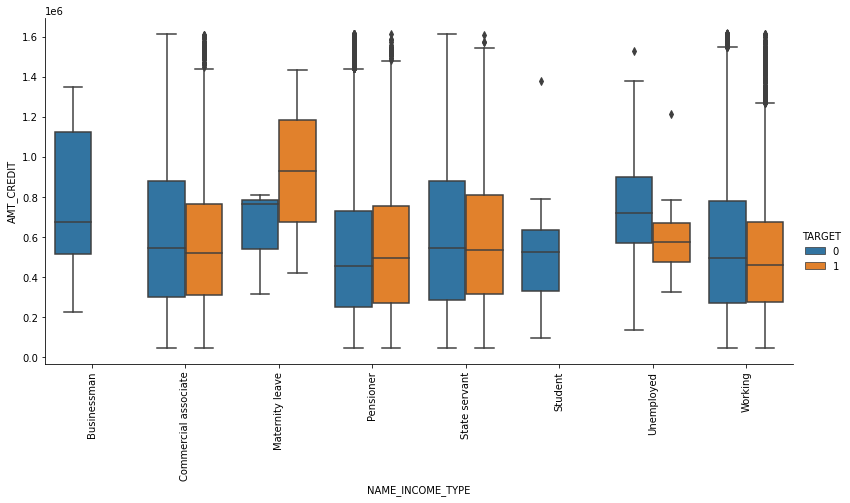

<Figure size 1800x1440 with 0 Axes>

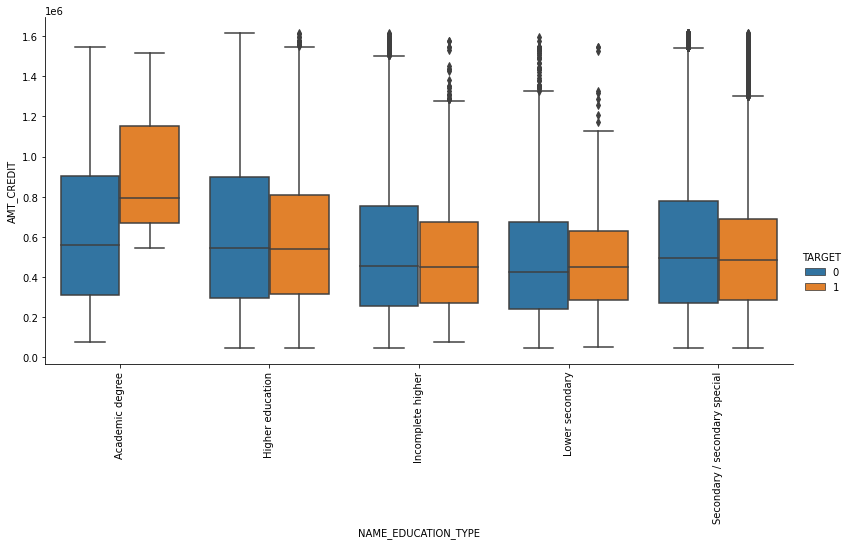

<Figure size 1800x1440 with 0 Axes>

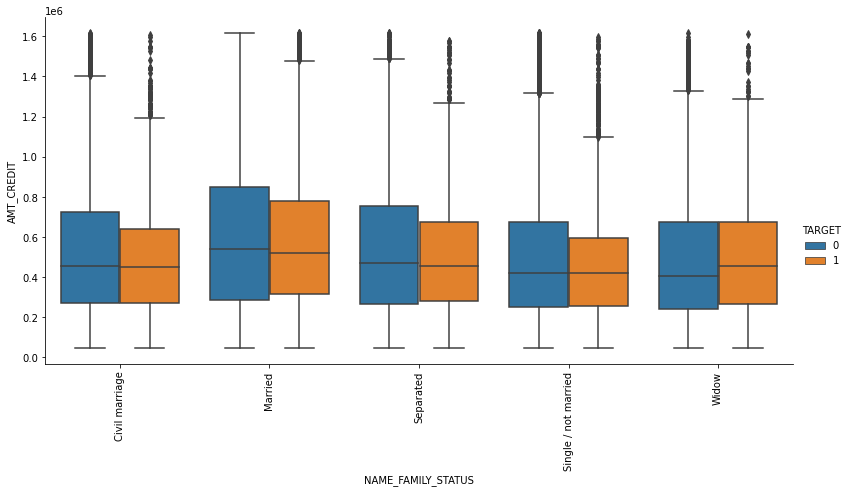

<Figure size 1800x1440 with 0 Axes>

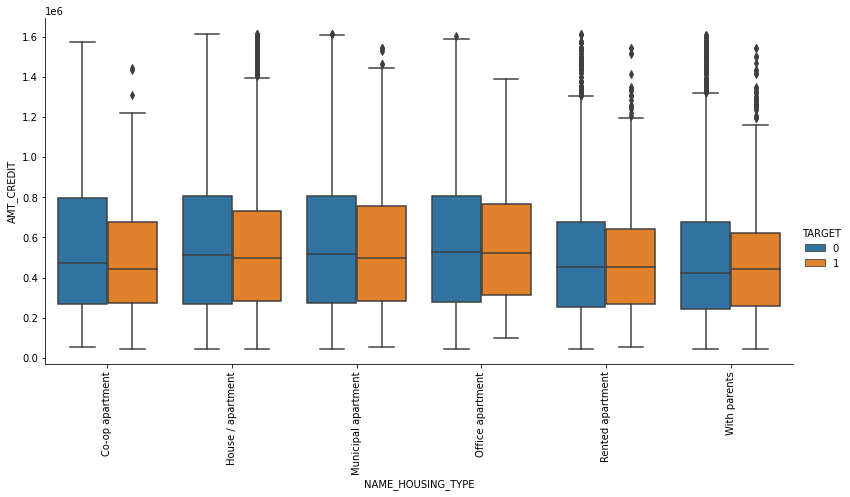

<Figure size 1800x1440 with 0 Axes>

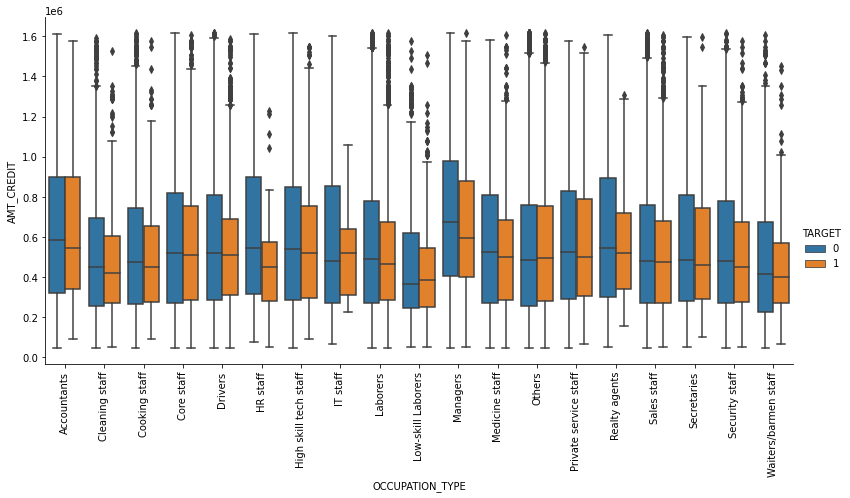

<Figure size 1800x1440 with 0 Axes>

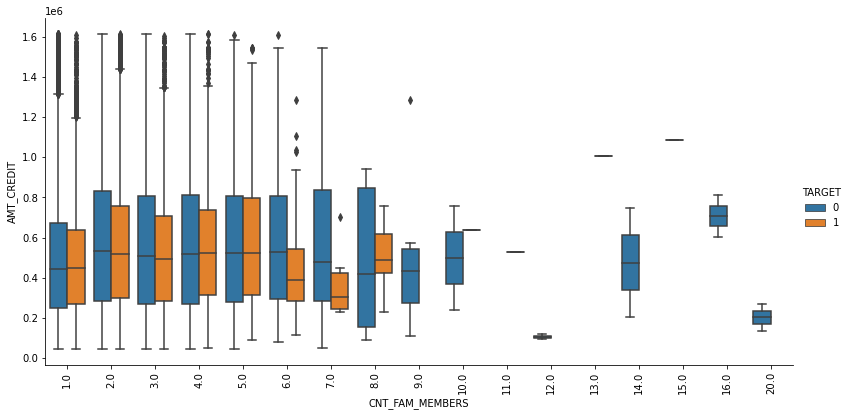

<Figure size 1800x1440 with 0 Axes>

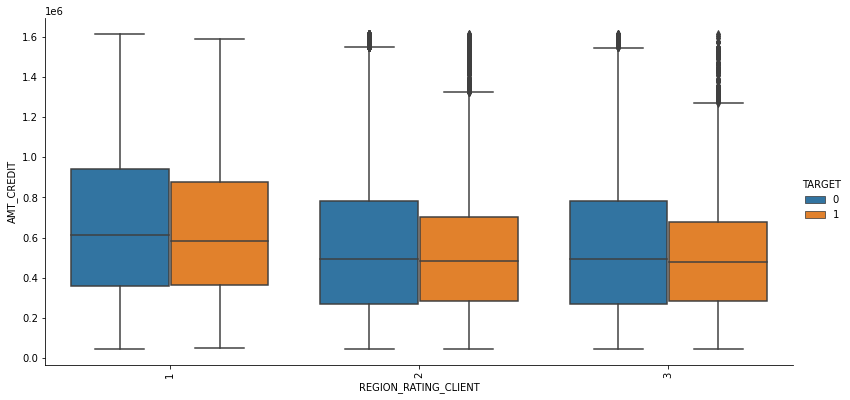

<Figure size 1800x1440 with 0 Axes>

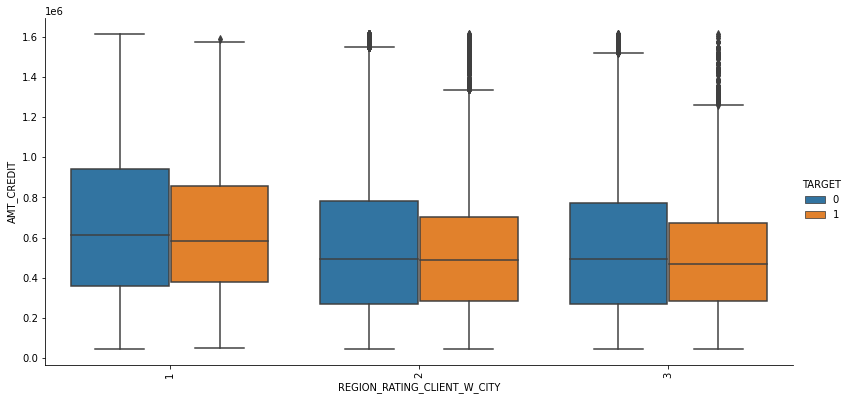

<Figure size 1800x1440 with 0 Axes>

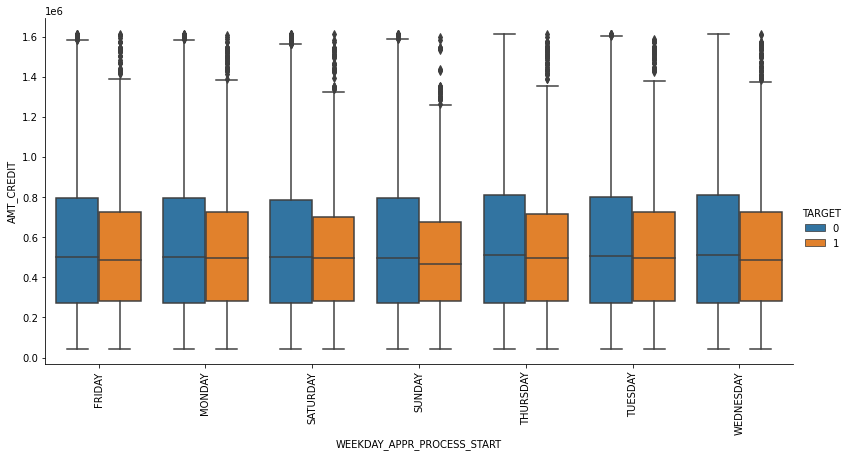

<Figure size 1800x1440 with 0 Axes>

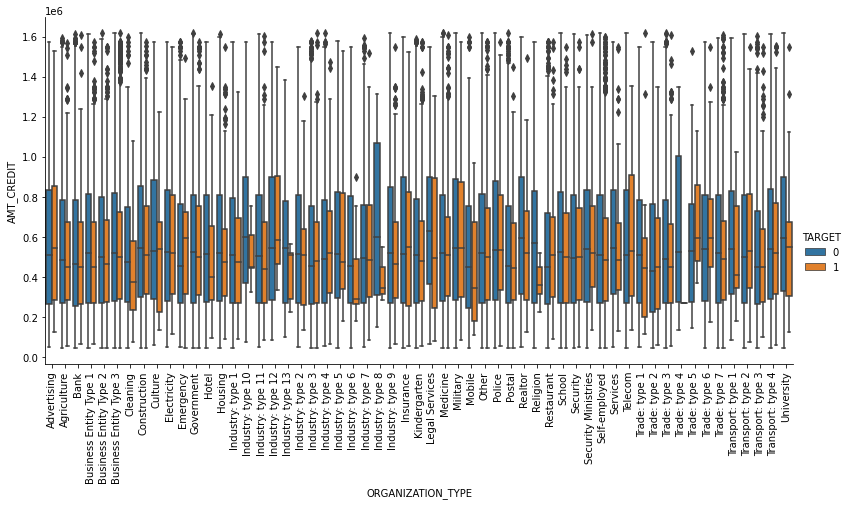

<Figure size 1800x1440 with 0 Axes>

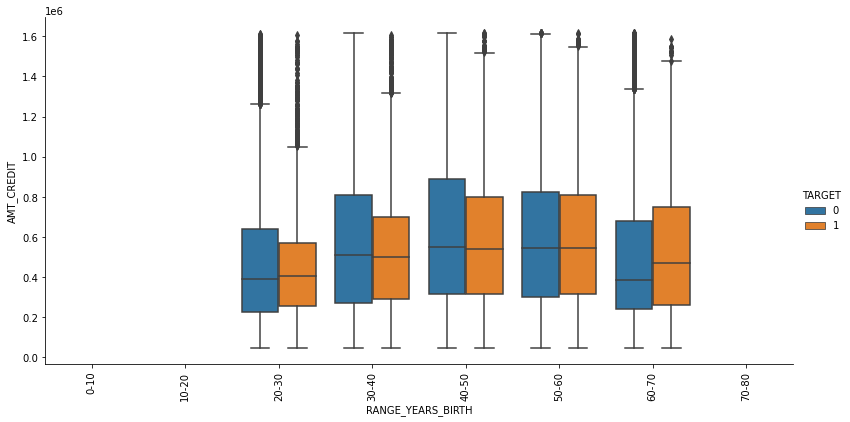

<Figure size 1800x1440 with 0 Axes>

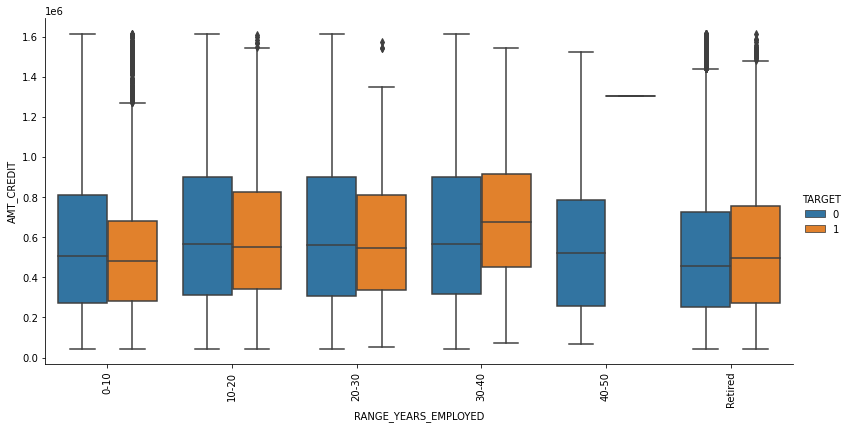

<Figure size 1800x1440 with 0 Axes>

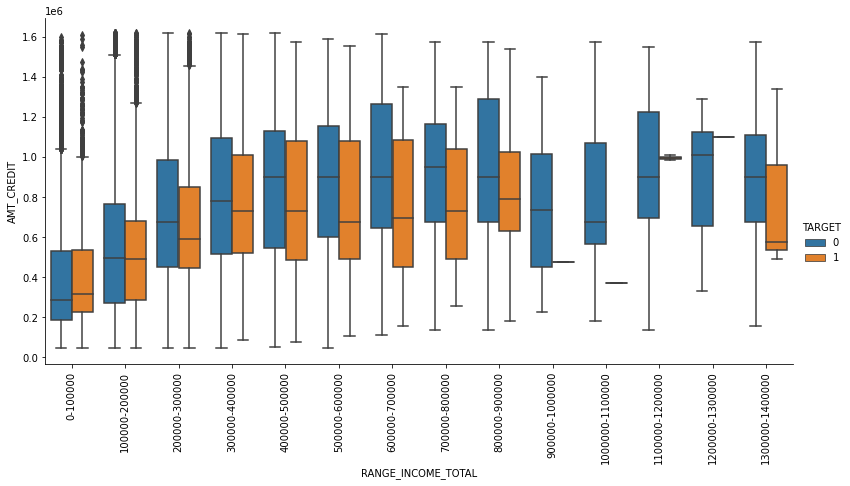

<Figure size 1800x1440 with 0 Axes>

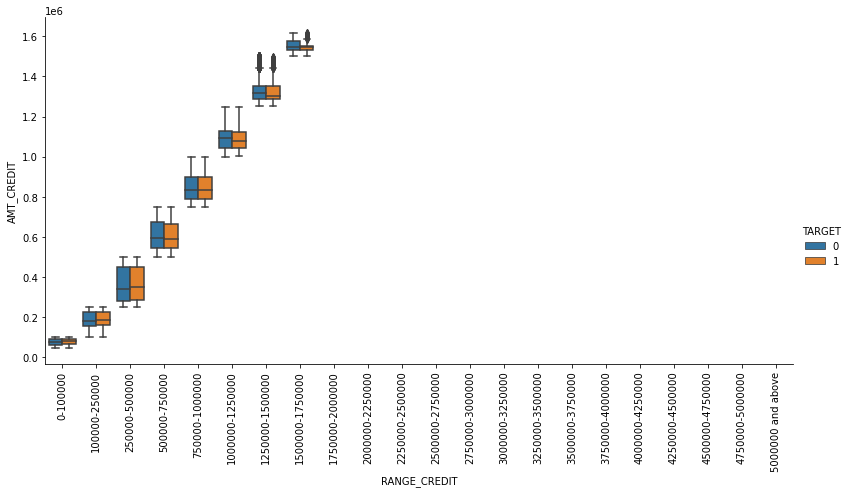

<Figure size 1800x1440 with 0 Axes>

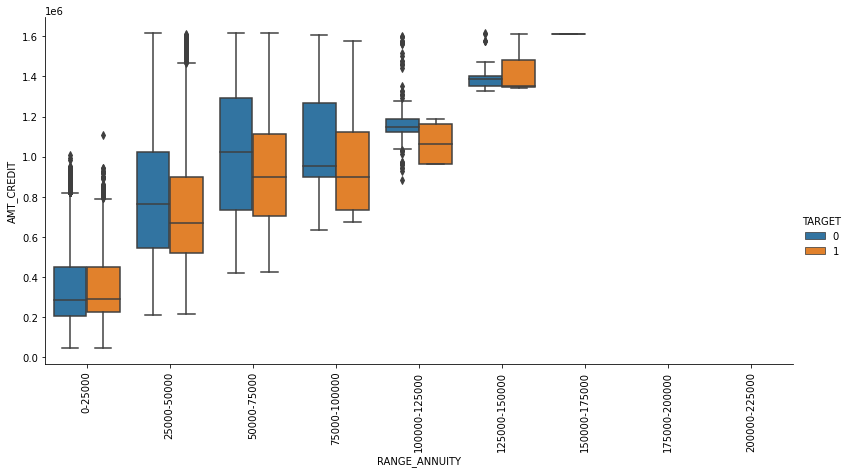

<Figure size 1800x1440 with 0 Axes>

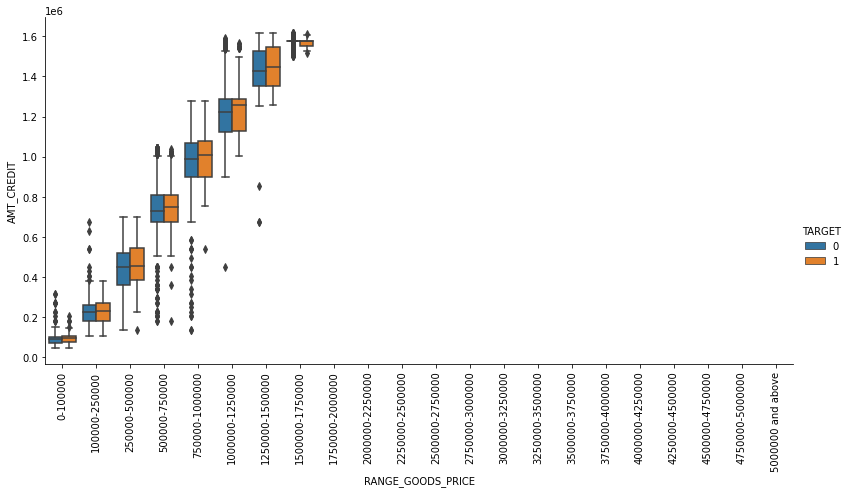

In [81]:
# Amount credit for various categorical variables

for i in cat:
    plt.figure(figsize=(25,20))
    fig= sns.catplot(x=i, y="AMT_CREDIT", hue="TARGET", kind="box", data = copy1, height=5.5, aspect=2)

    plt.xticks(rotation = 90,fontsize =10)
    count+=1
    plt.show()
    

### Inference
1. In almost all graphs, those difaulting has median loan credit lesser than those not defaulting.
2. A significant anamoly is observed in those who are on maternity leave and those with the academic degree. Those among them who has higher amount credit tends to default more

<Figure size 1800x1440 with 0 Axes>

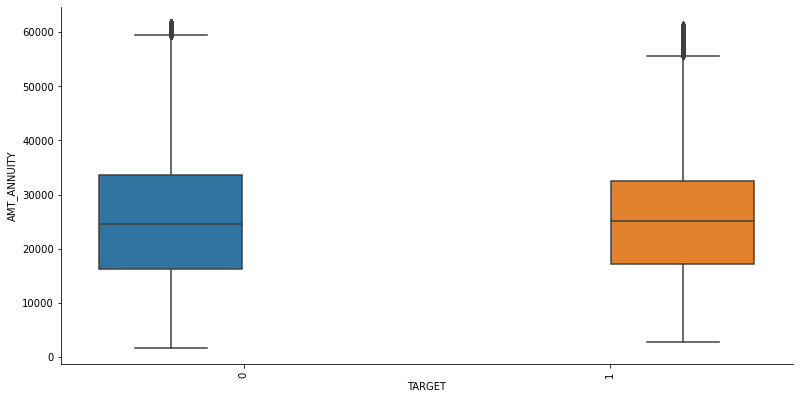

<Figure size 1800x1440 with 0 Axes>

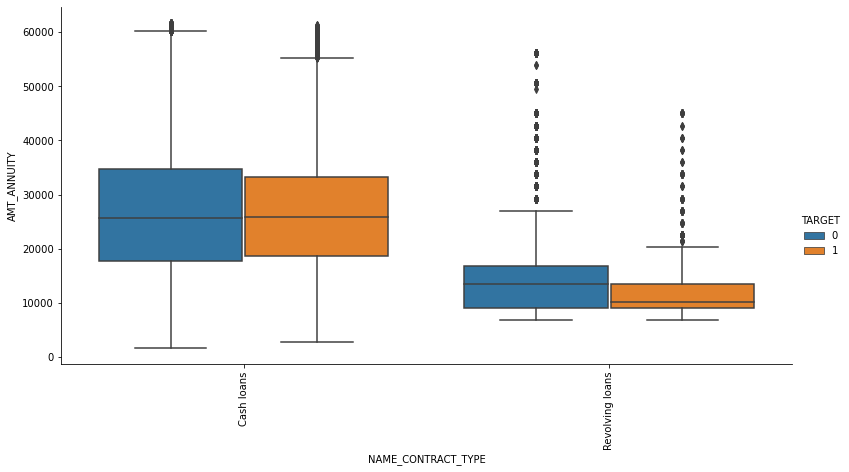

<Figure size 1800x1440 with 0 Axes>

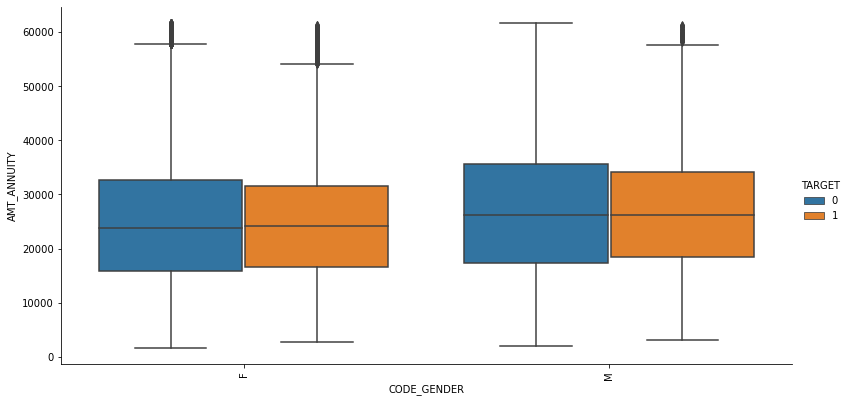

<Figure size 1800x1440 with 0 Axes>

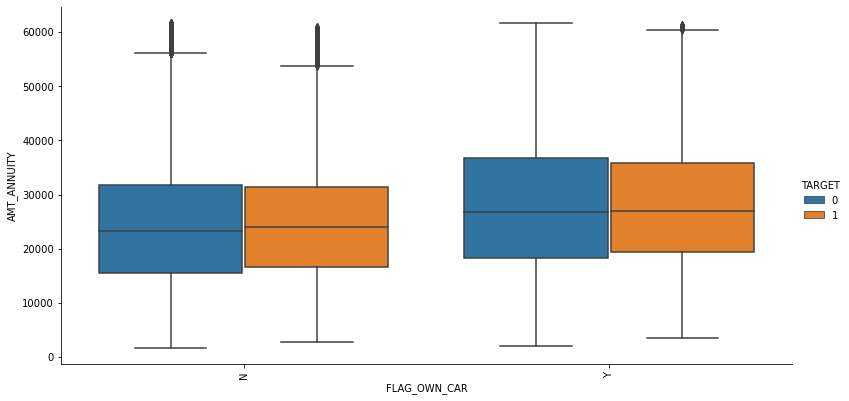

<Figure size 1800x1440 with 0 Axes>

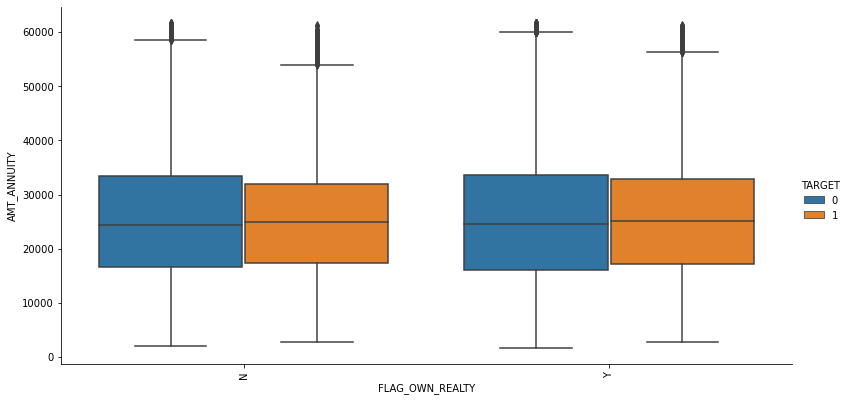

<Figure size 1800x1440 with 0 Axes>

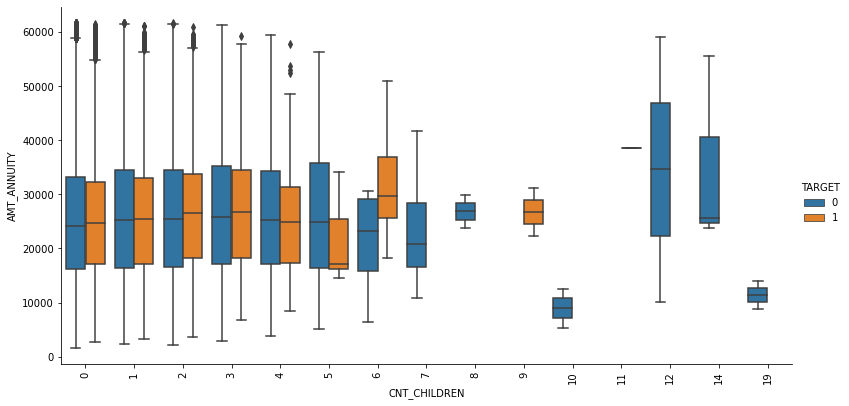

<Figure size 1800x1440 with 0 Axes>

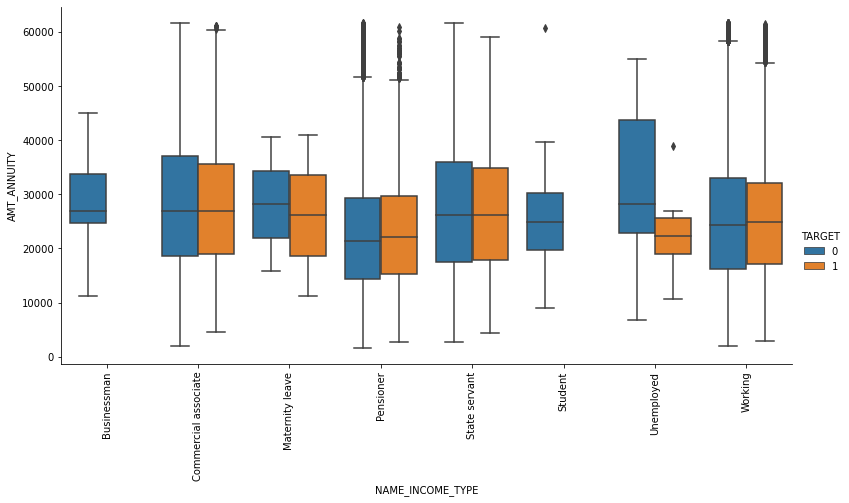

<Figure size 1800x1440 with 0 Axes>

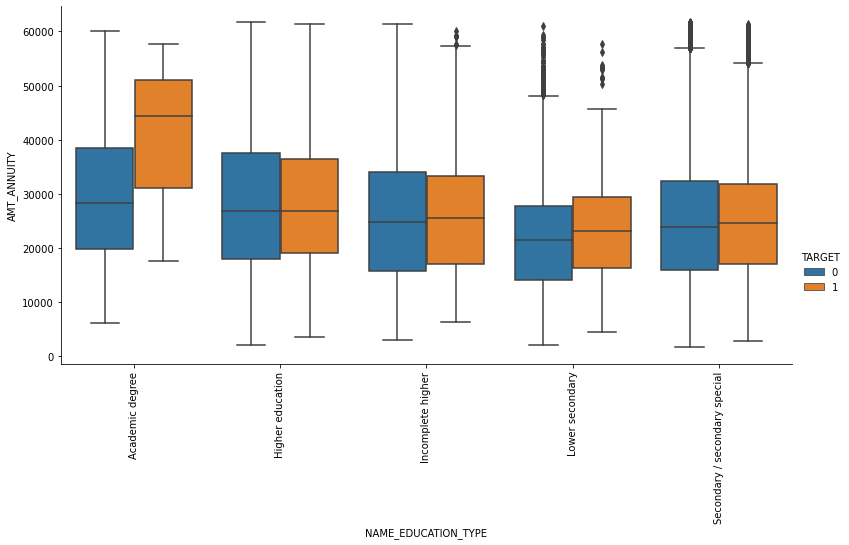

<Figure size 1800x1440 with 0 Axes>

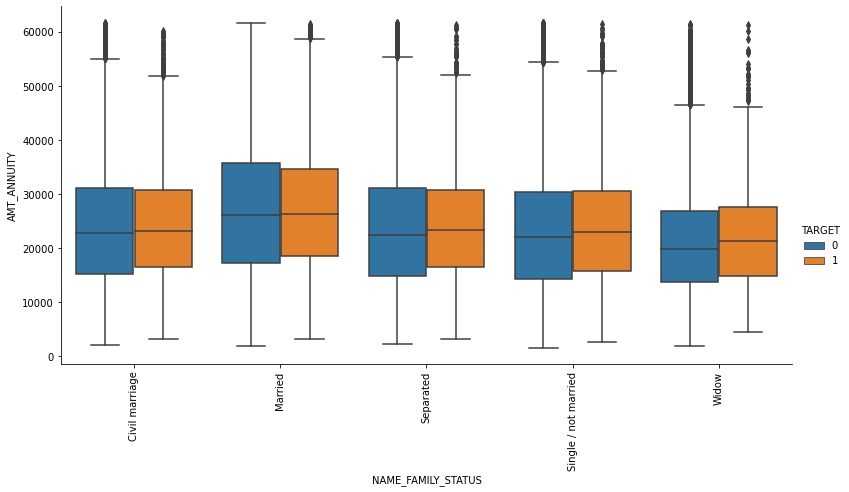

<Figure size 1800x1440 with 0 Axes>

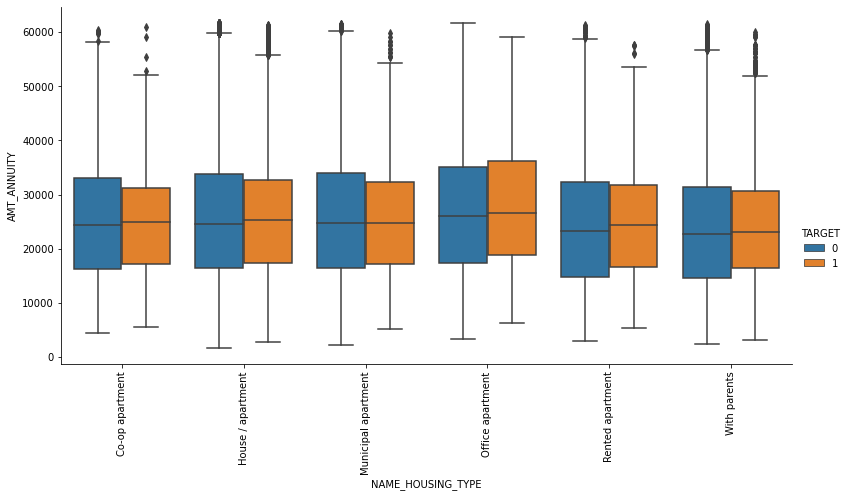

<Figure size 1800x1440 with 0 Axes>

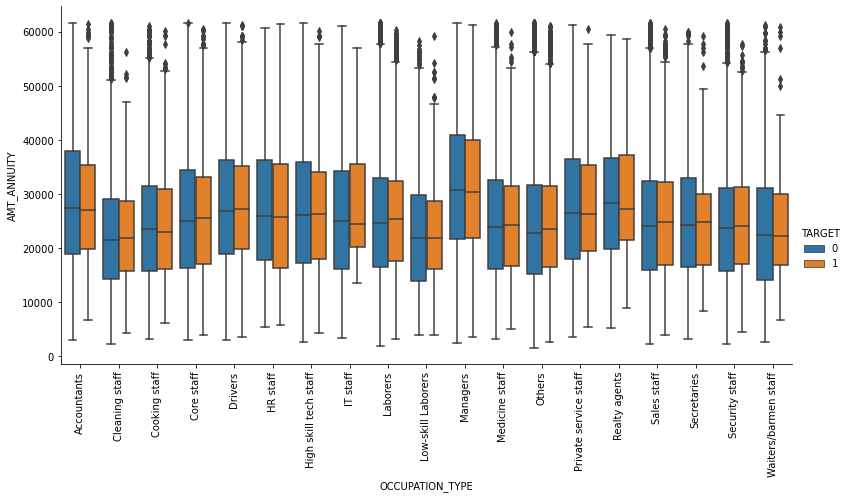

<Figure size 1800x1440 with 0 Axes>

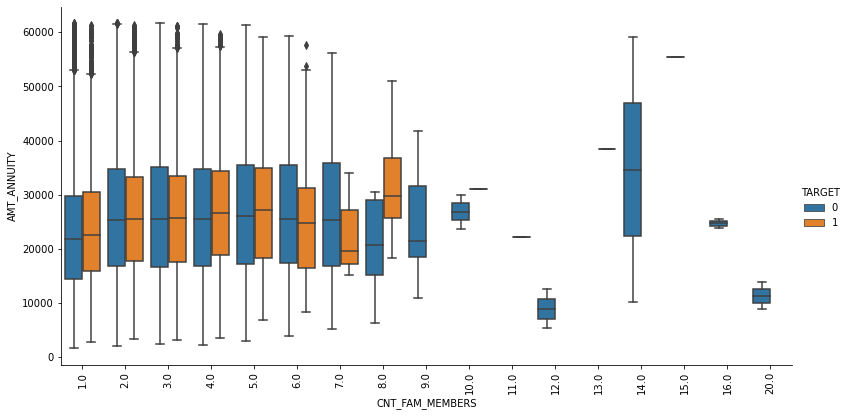

<Figure size 1800x1440 with 0 Axes>

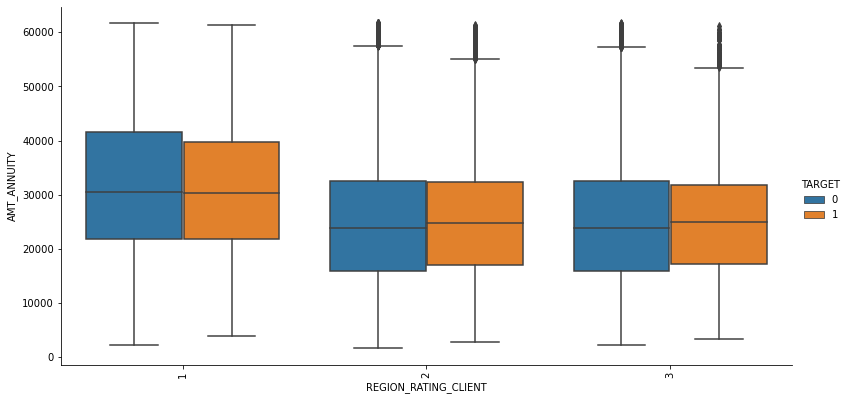

<Figure size 1800x1440 with 0 Axes>

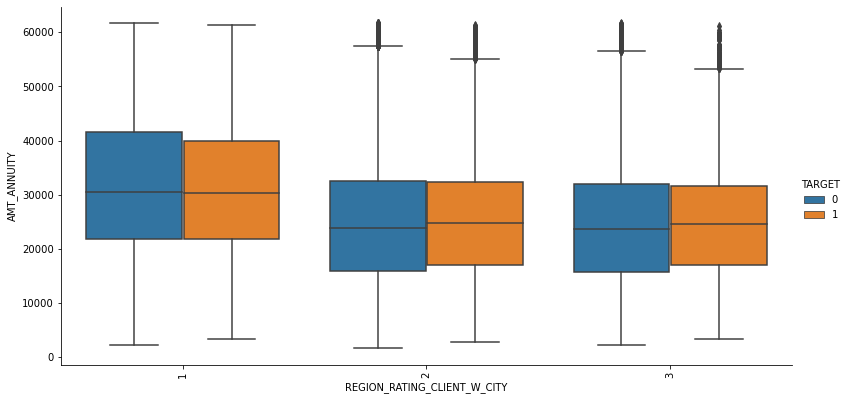

<Figure size 1800x1440 with 0 Axes>

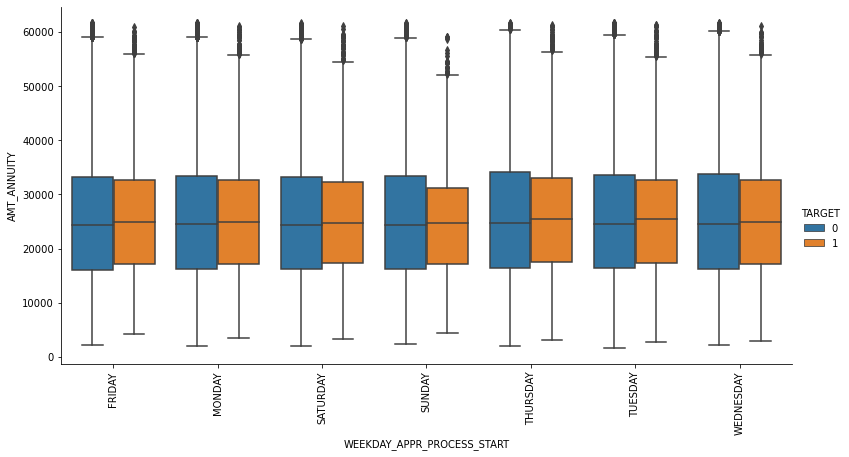

<Figure size 1800x1440 with 0 Axes>

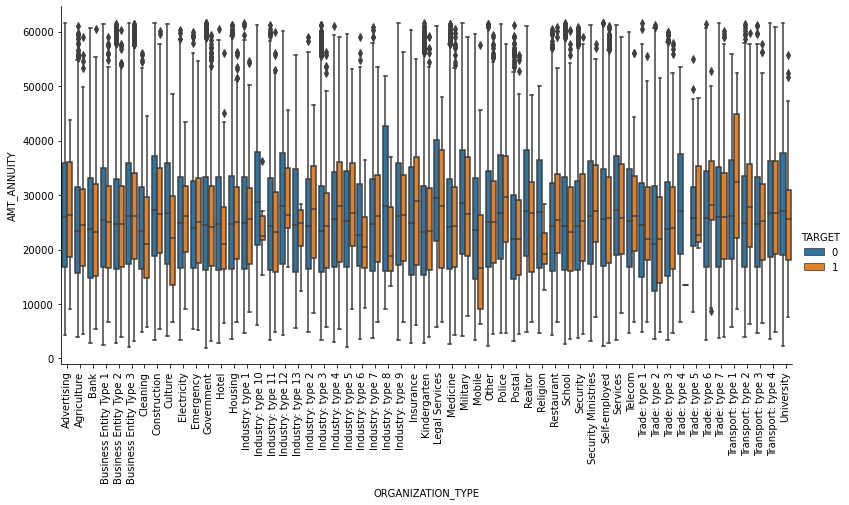

<Figure size 1800x1440 with 0 Axes>

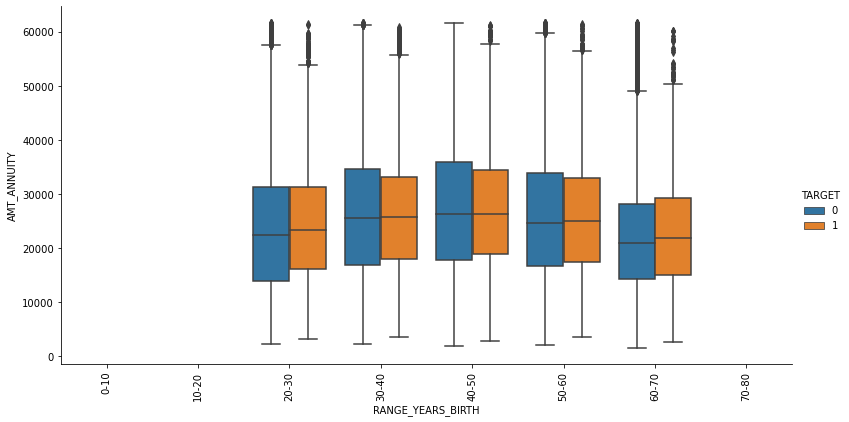

<Figure size 1800x1440 with 0 Axes>

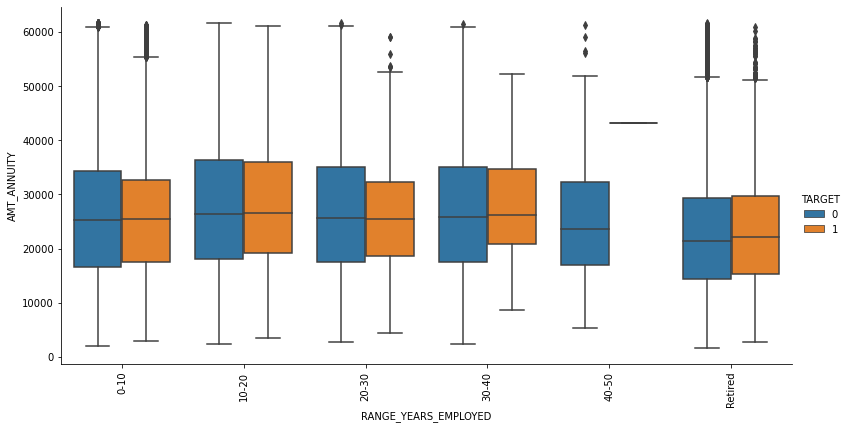

<Figure size 1800x1440 with 0 Axes>

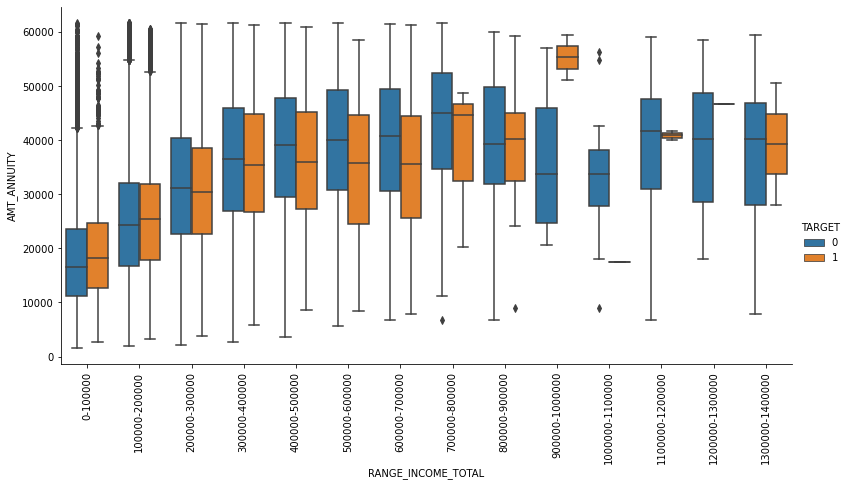

<Figure size 1800x1440 with 0 Axes>

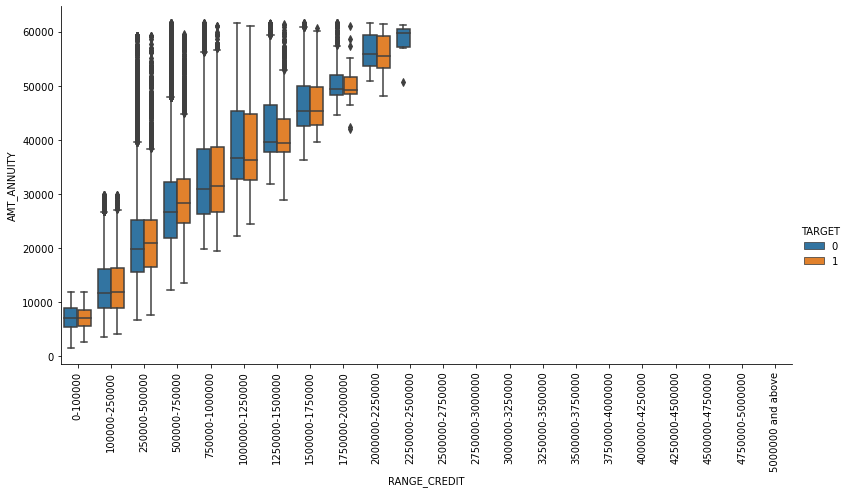

<Figure size 1800x1440 with 0 Axes>

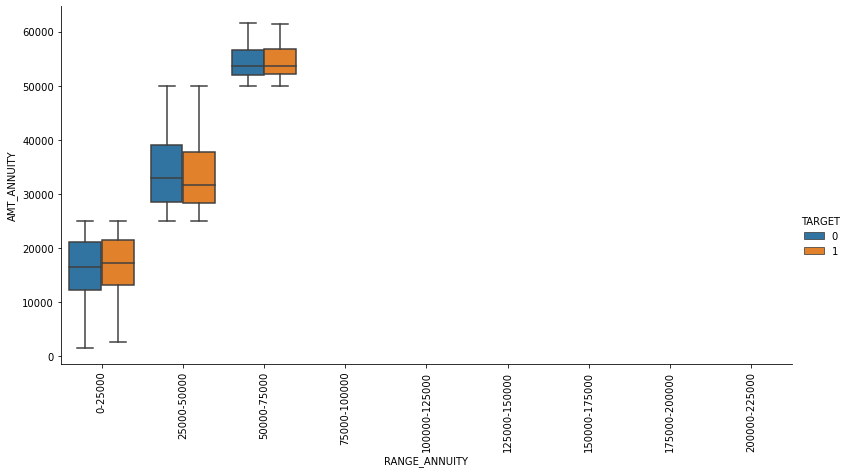

<Figure size 1800x1440 with 0 Axes>

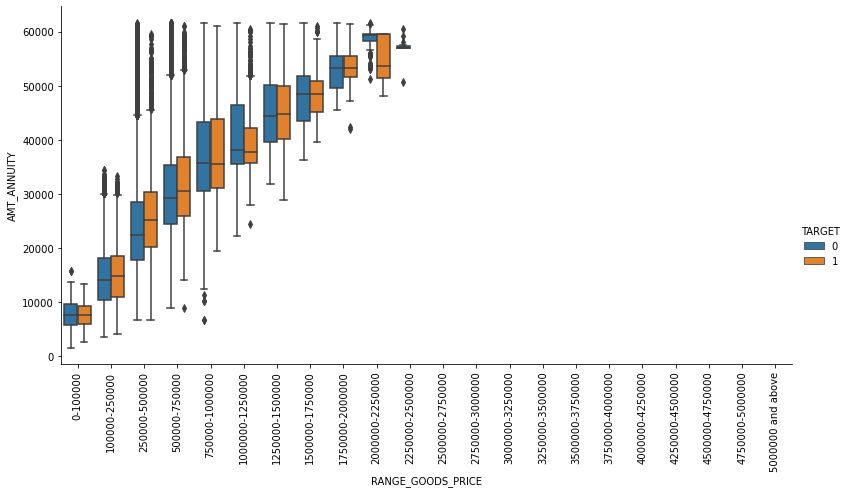

In [82]:
# Annuity amount for various categorical variables

for i in cat:
    plt.figure(figsize=(25,20))
    fig= sns.catplot(x=i, y="AMT_ANNUITY", hue="TARGET", kind="box", data = copy1, height=5.5, aspect=2)

    plt.xticks(rotation = 90,fontsize =10)
    count+=1
    plt.show()
    

### Inference
1. Clients with academic degree and high annuity tend to default more.

<Figure size 1800x1440 with 0 Axes>

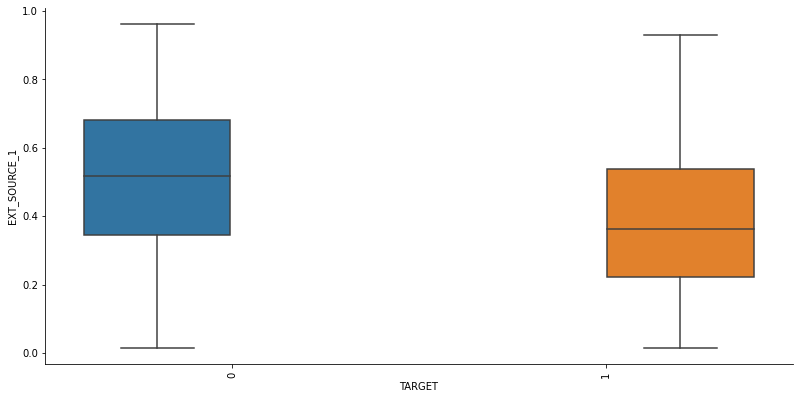

<Figure size 1800x1440 with 0 Axes>

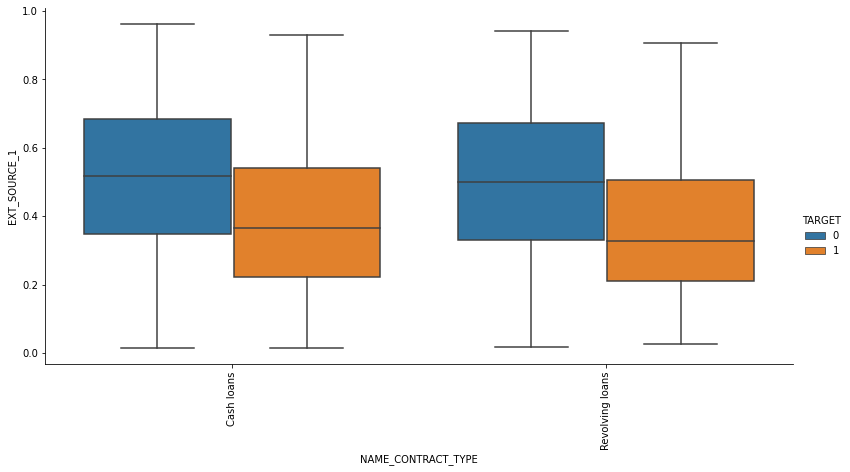

<Figure size 1800x1440 with 0 Axes>

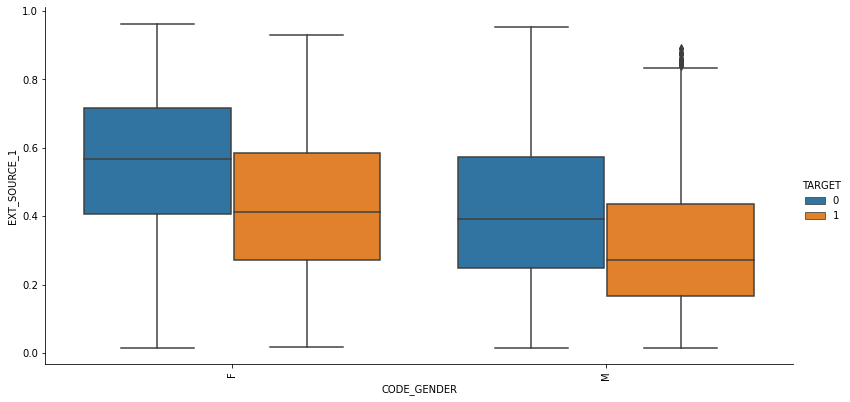

<Figure size 1800x1440 with 0 Axes>

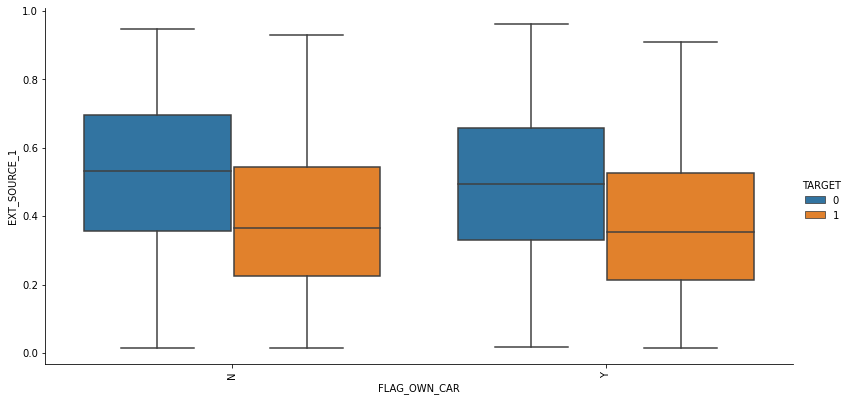

<Figure size 1800x1440 with 0 Axes>

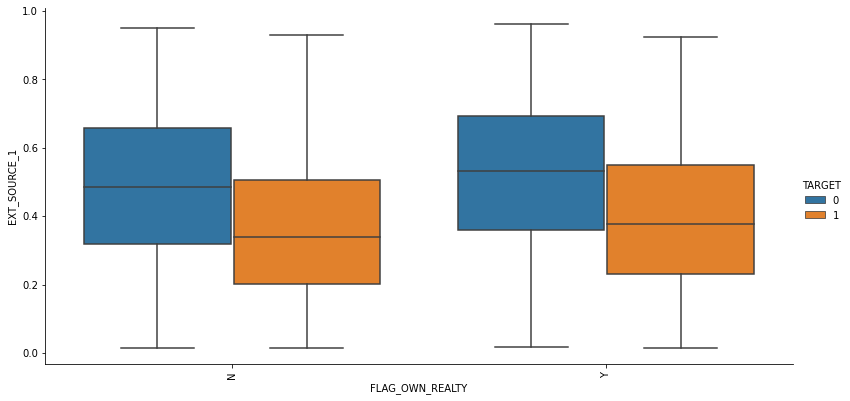

<Figure size 1800x1440 with 0 Axes>

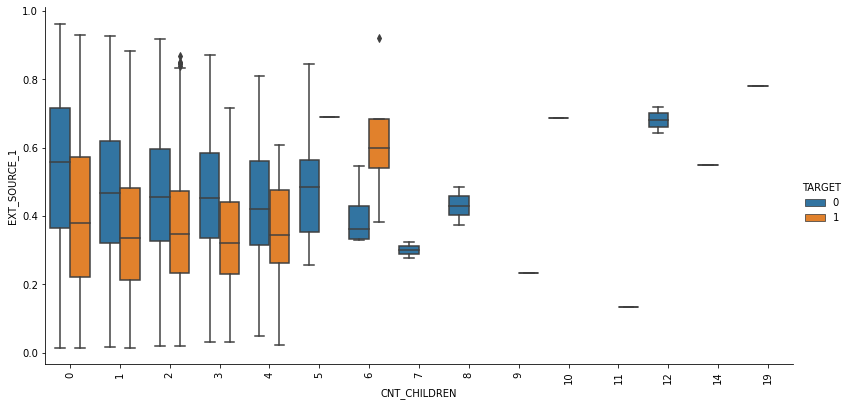

<Figure size 1800x1440 with 0 Axes>

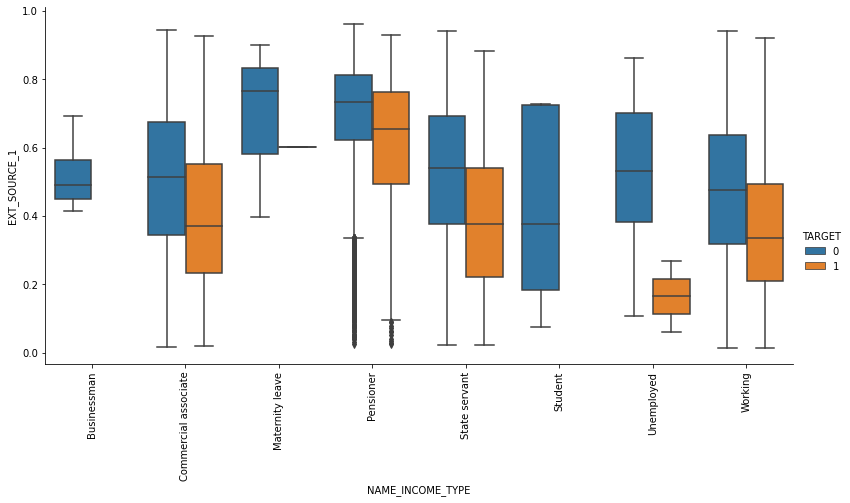

<Figure size 1800x1440 with 0 Axes>

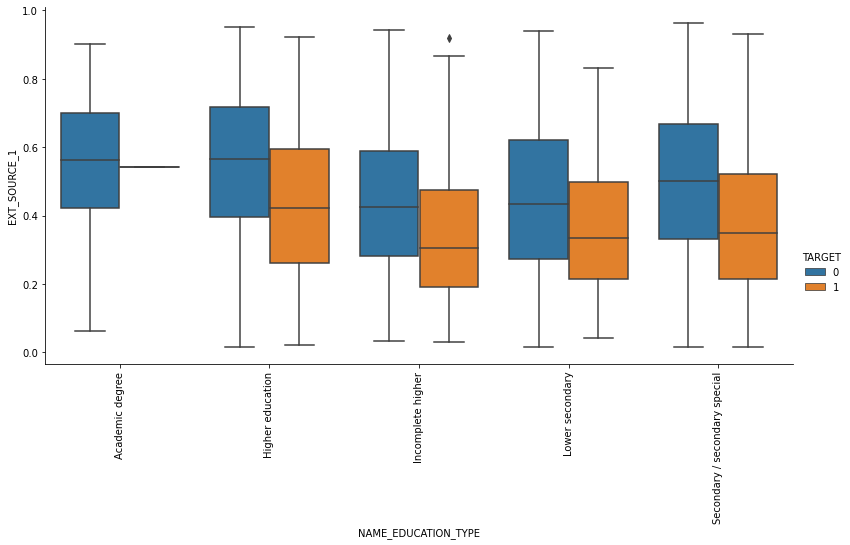

<Figure size 1800x1440 with 0 Axes>

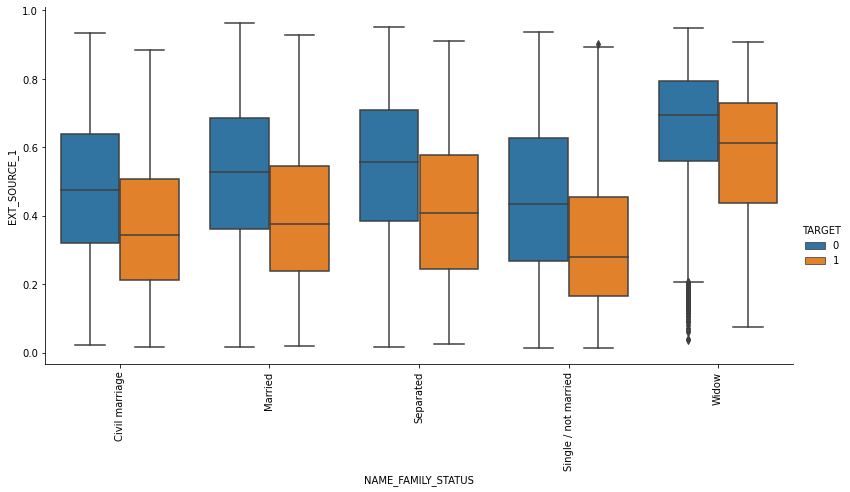

<Figure size 1800x1440 with 0 Axes>

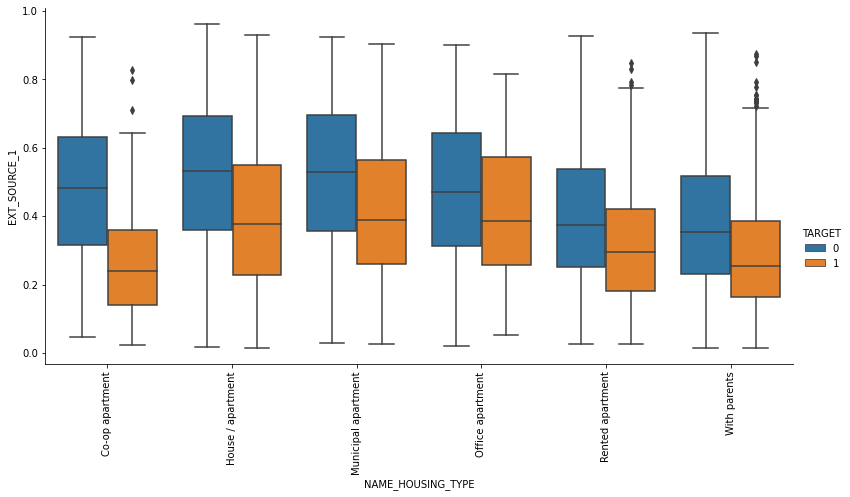

<Figure size 1800x1440 with 0 Axes>

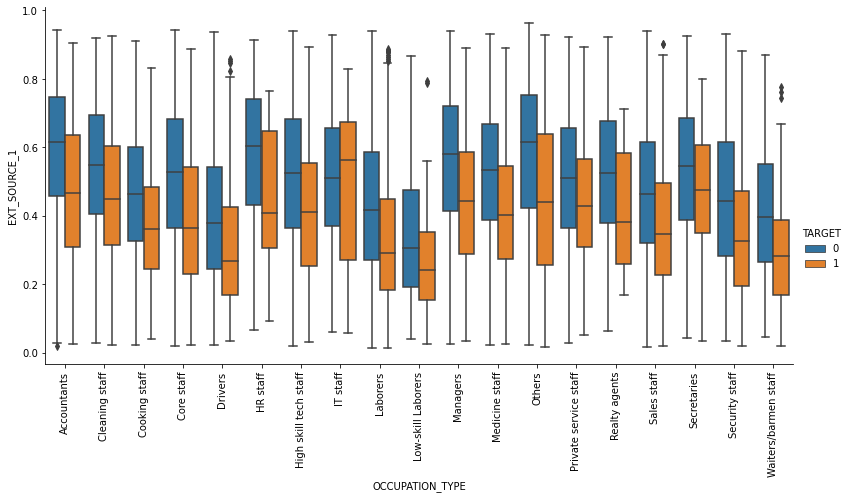

<Figure size 1800x1440 with 0 Axes>

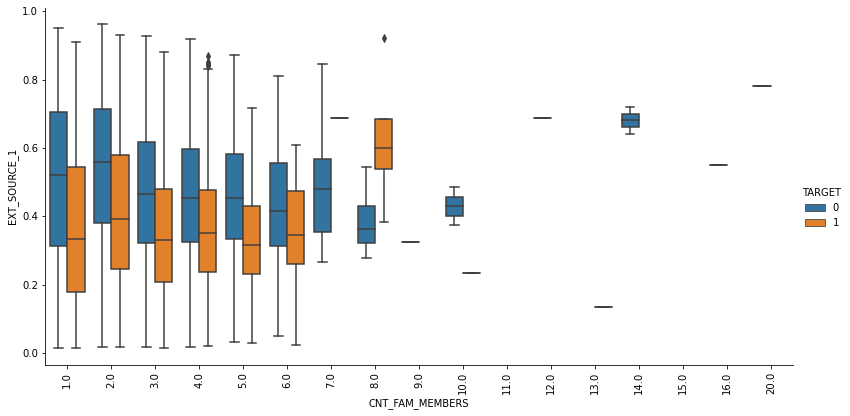

<Figure size 1800x1440 with 0 Axes>

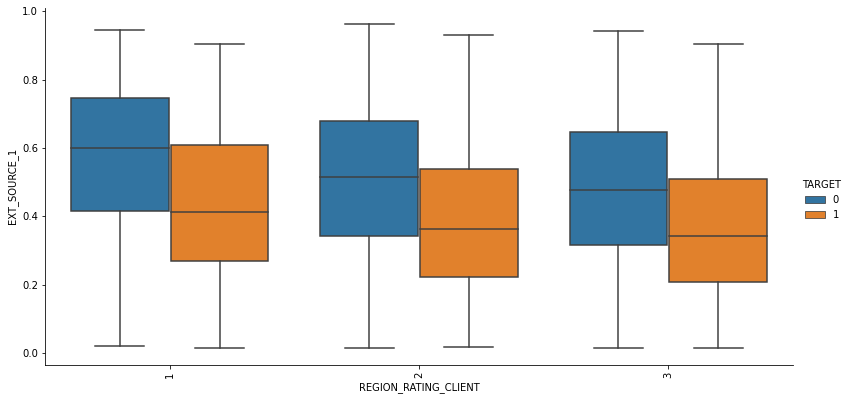

<Figure size 1800x1440 with 0 Axes>

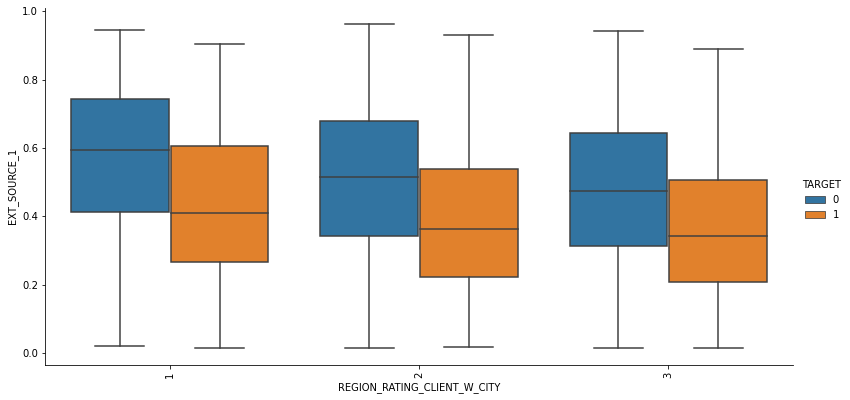

<Figure size 1800x1440 with 0 Axes>

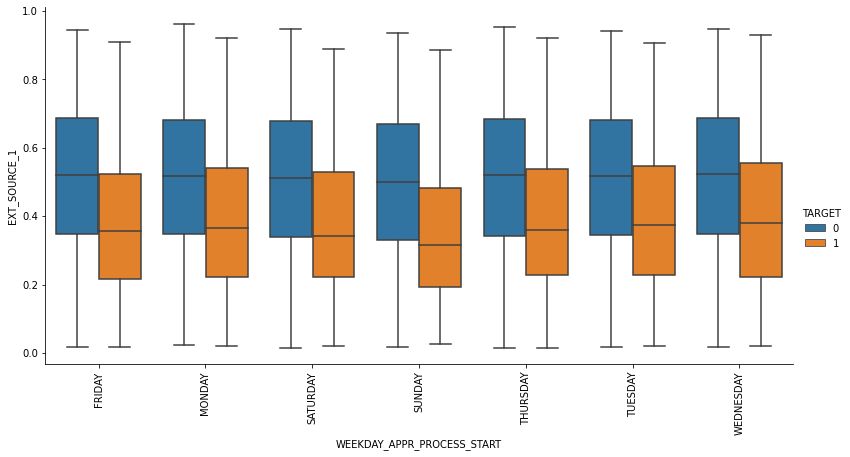

<Figure size 1800x1440 with 0 Axes>

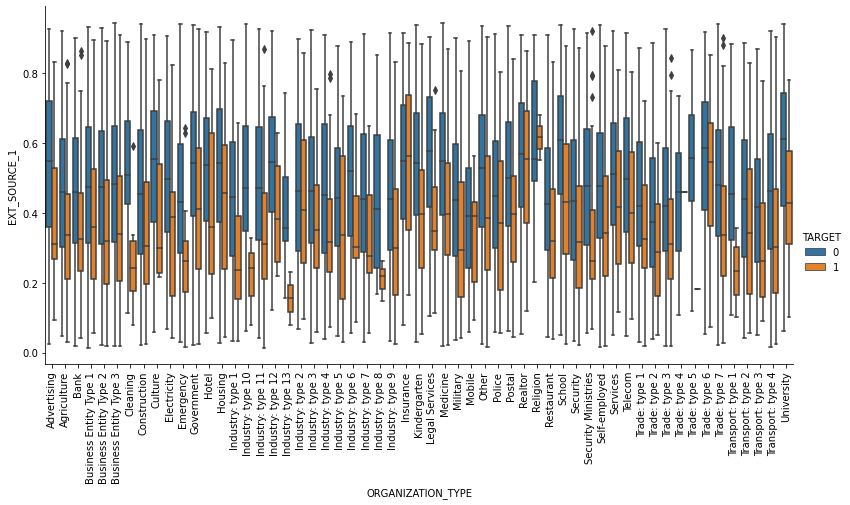

<Figure size 1800x1440 with 0 Axes>

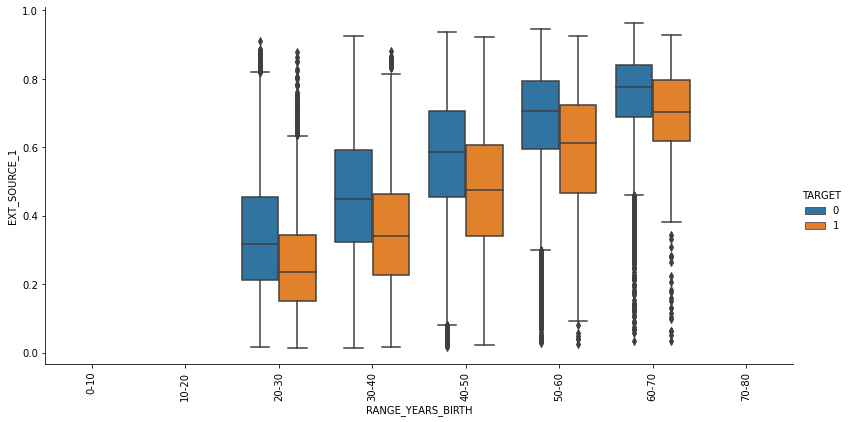

<Figure size 1800x1440 with 0 Axes>

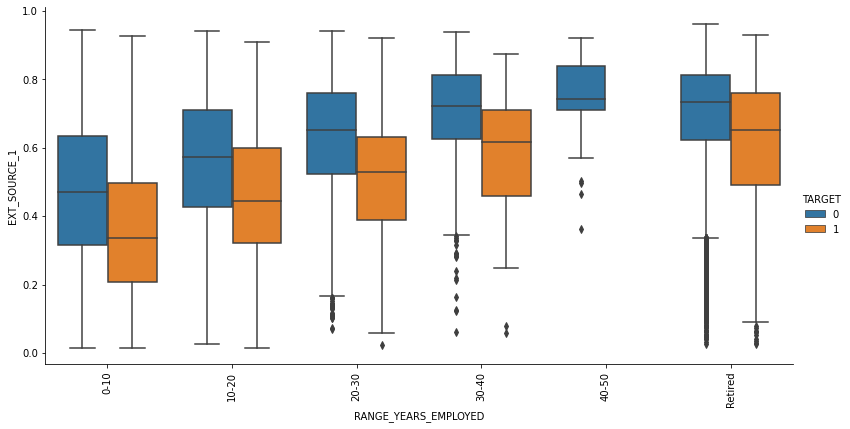

<Figure size 1800x1440 with 0 Axes>

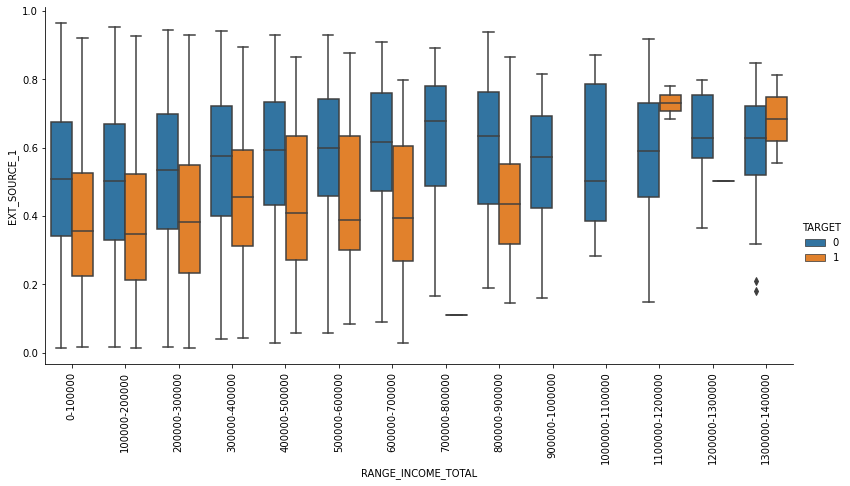

<Figure size 1800x1440 with 0 Axes>

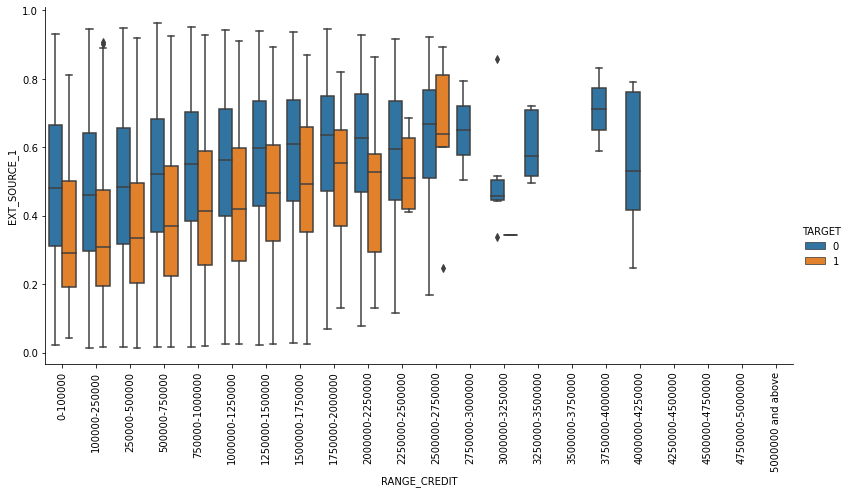

<Figure size 1800x1440 with 0 Axes>

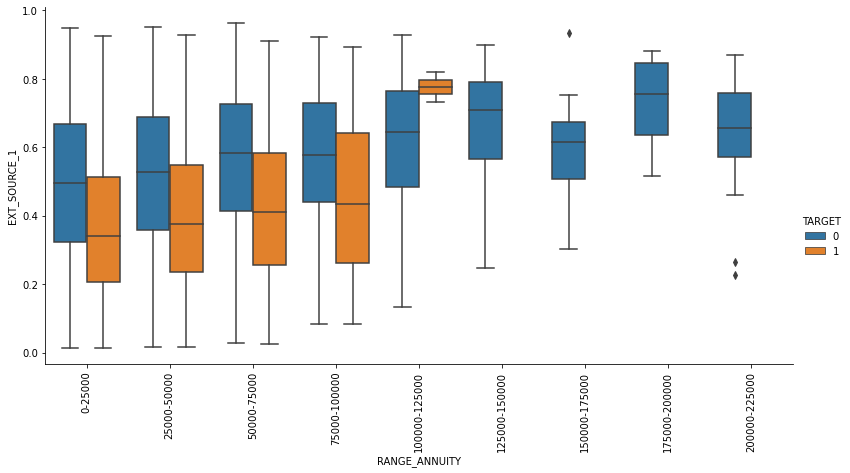

<Figure size 1800x1440 with 0 Axes>

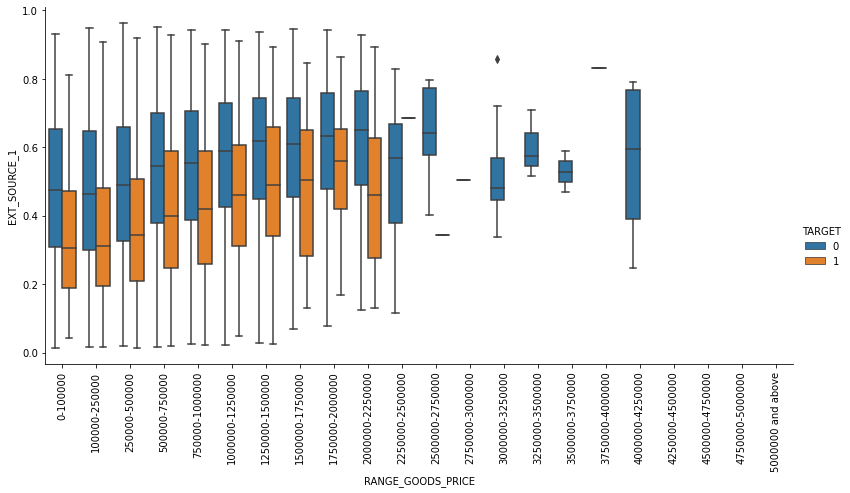

In [83]:
# credit ratings by source 1 for various categorical variables

for i in cat:
    plt.figure(figsize=(25,20))
    fig= sns.catplot(x=i, y="EXT_SOURCE_1", hue="TARGET", kind="box", data = copy1, height=5.5, aspect=2)

    plt.xticks(rotation = 90,fontsize =10)
    count+=1
    plt.show()
    

### Inferences
1. Credit ratings by source 1 increases with increase in age and years employed
2. and credit rating is less for defaulters.


<Figure size 1800x1440 with 0 Axes>

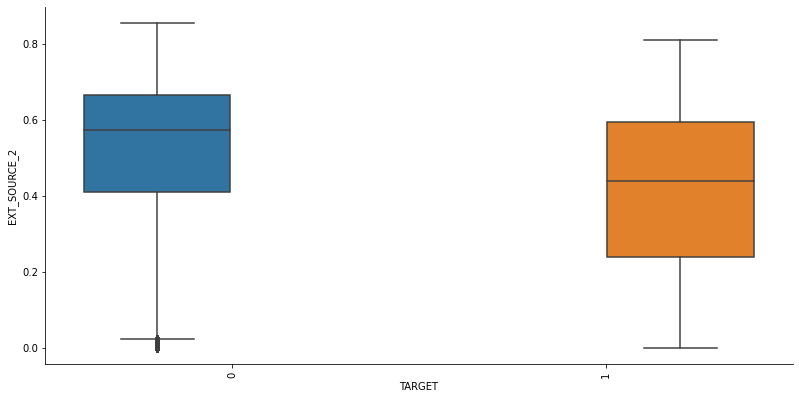

<Figure size 1800x1440 with 0 Axes>

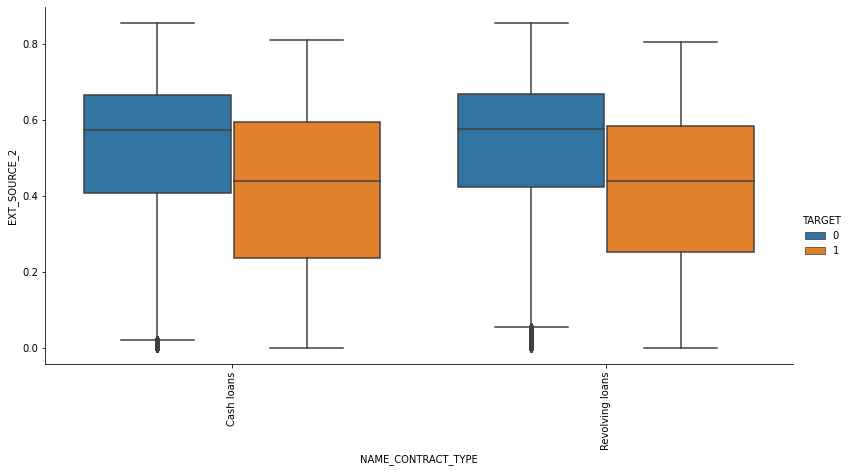

<Figure size 1800x1440 with 0 Axes>

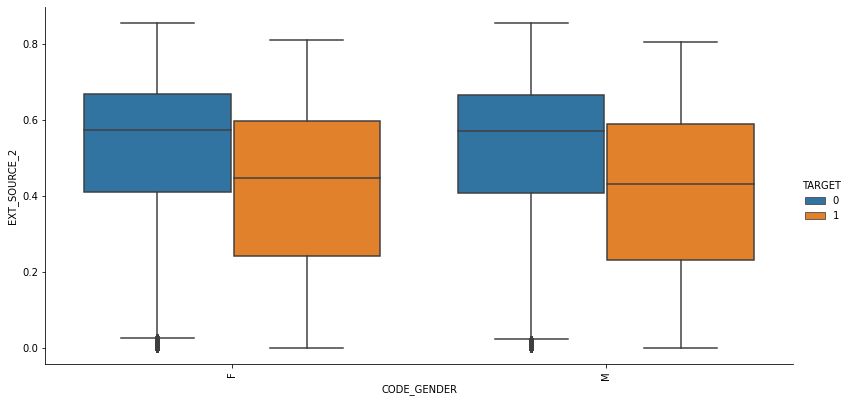

<Figure size 1800x1440 with 0 Axes>

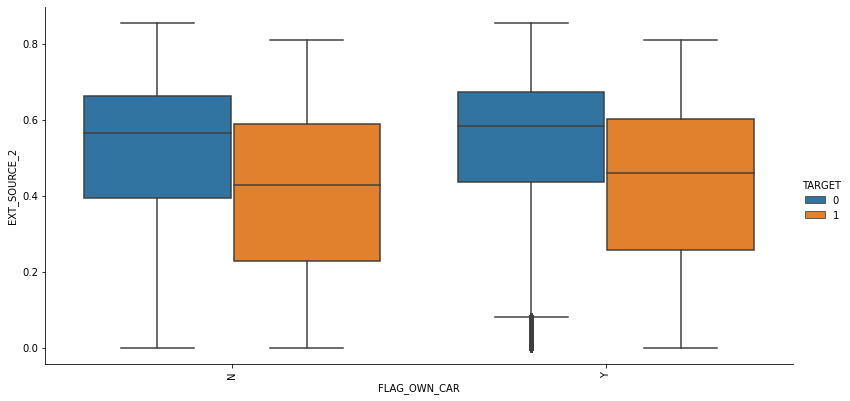

<Figure size 1800x1440 with 0 Axes>

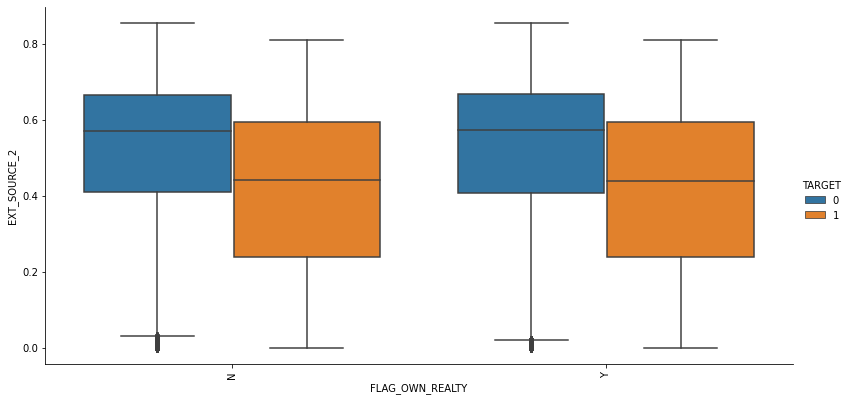

<Figure size 1800x1440 with 0 Axes>

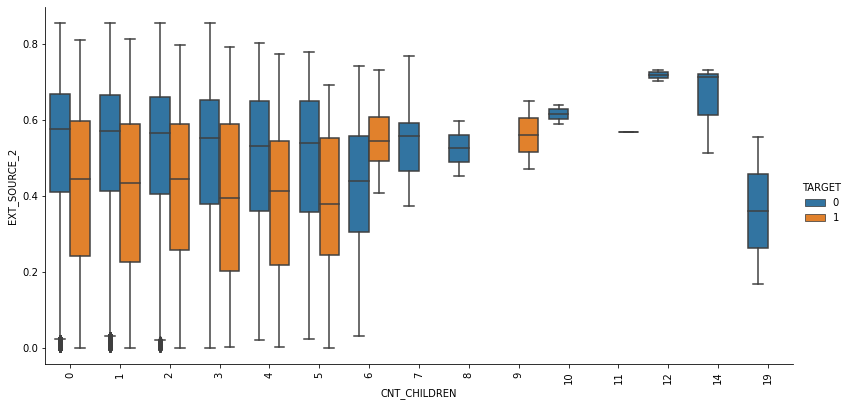

<Figure size 1800x1440 with 0 Axes>

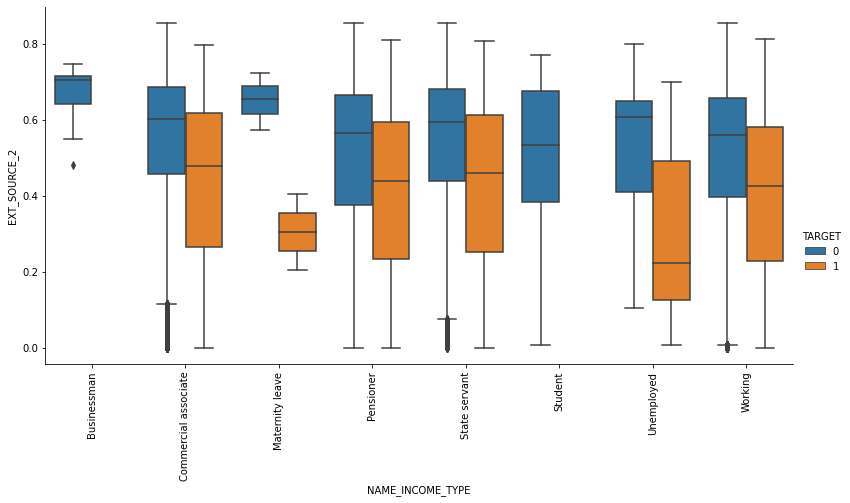

<Figure size 1800x1440 with 0 Axes>

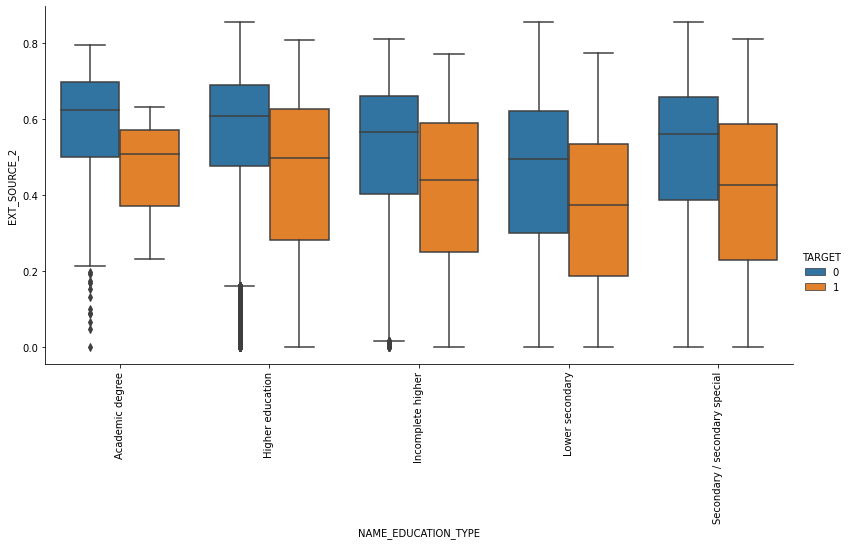

<Figure size 1800x1440 with 0 Axes>

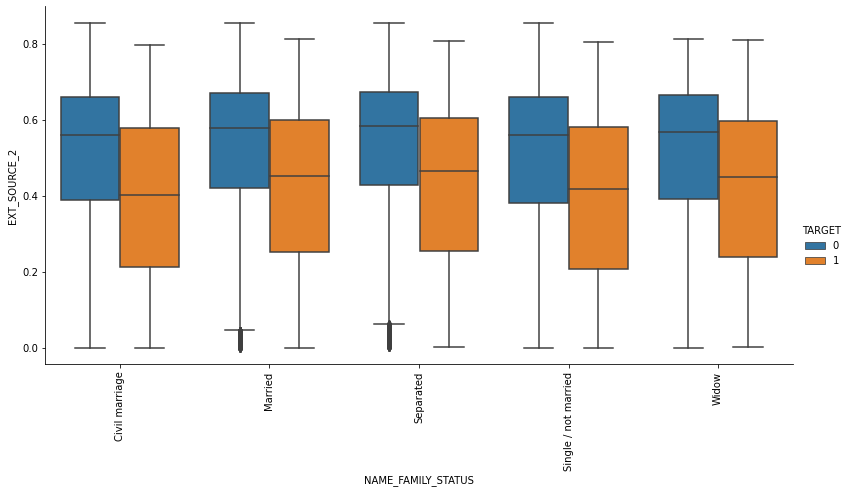

<Figure size 1800x1440 with 0 Axes>

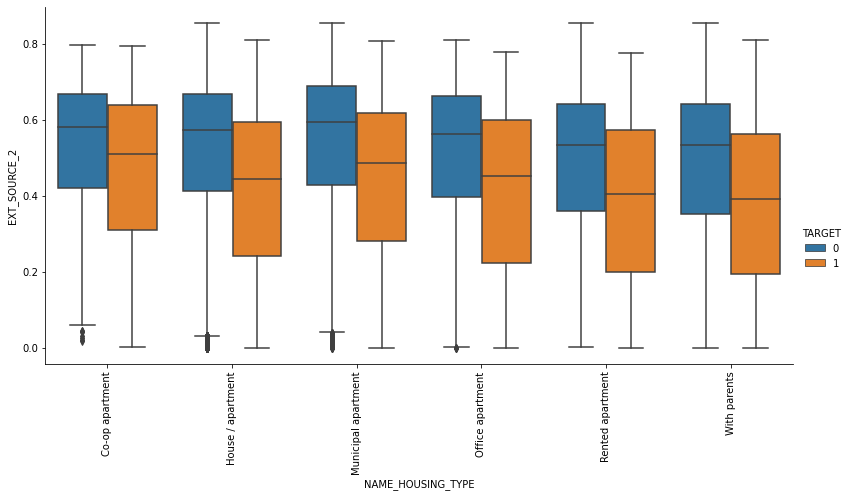

<Figure size 1800x1440 with 0 Axes>

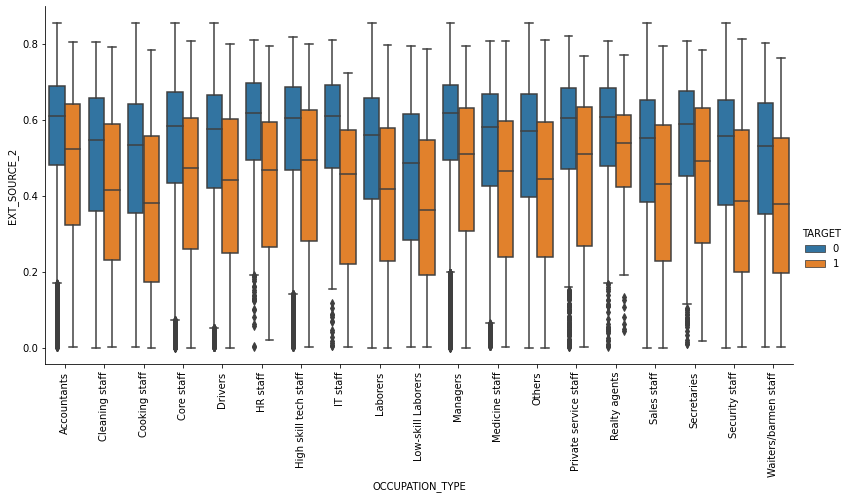

<Figure size 1800x1440 with 0 Axes>

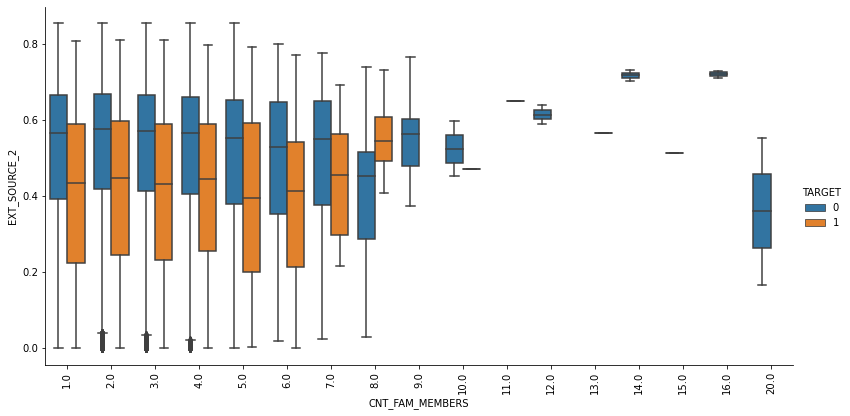

<Figure size 1800x1440 with 0 Axes>

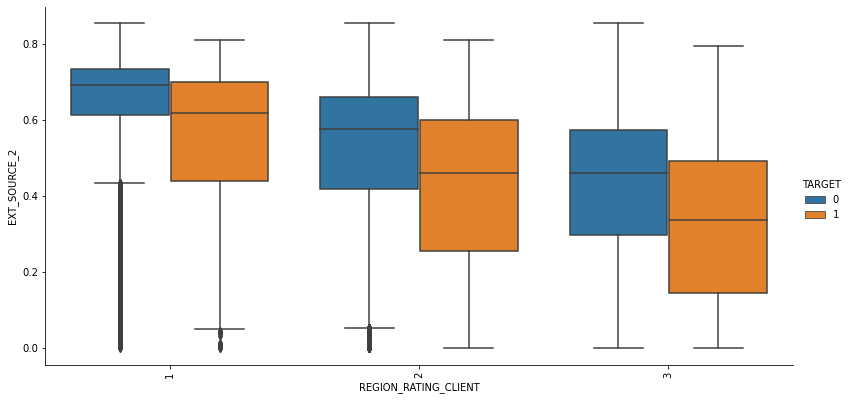

<Figure size 1800x1440 with 0 Axes>

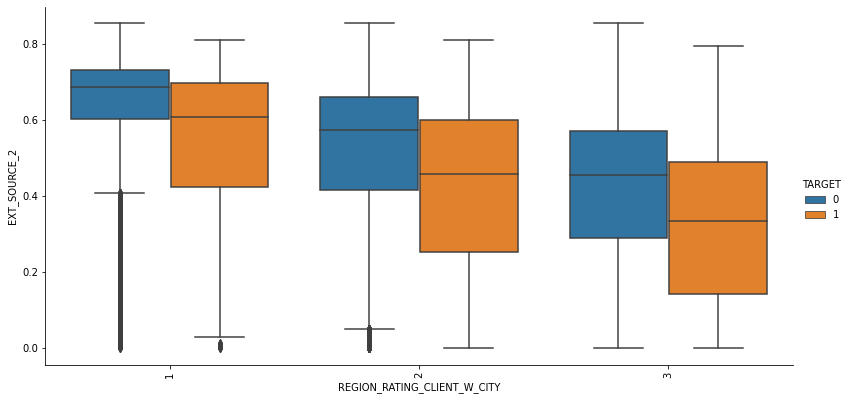

<Figure size 1800x1440 with 0 Axes>

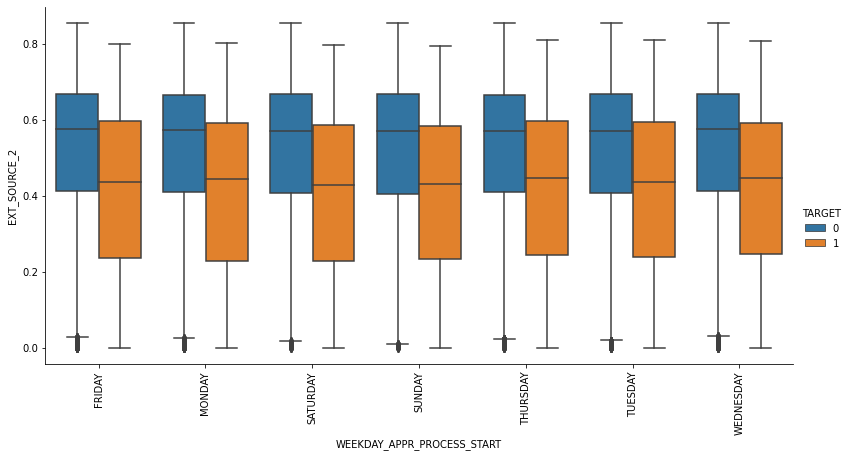

<Figure size 1800x1440 with 0 Axes>

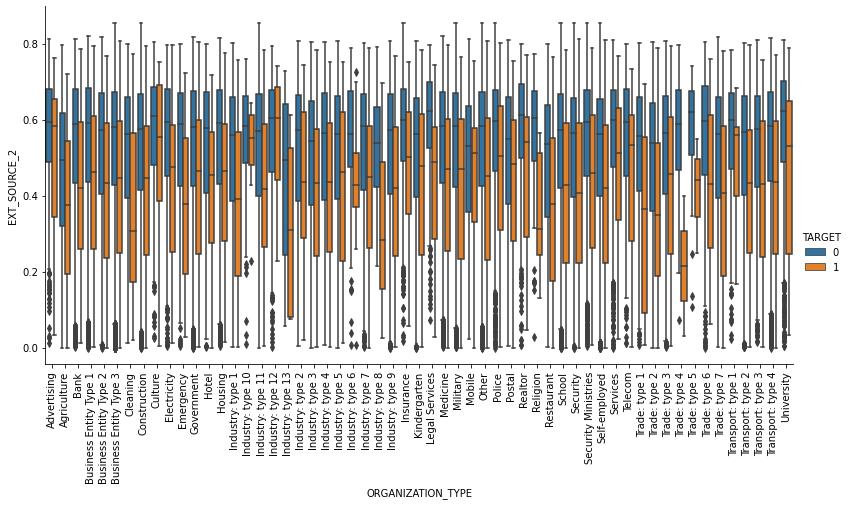

<Figure size 1800x1440 with 0 Axes>

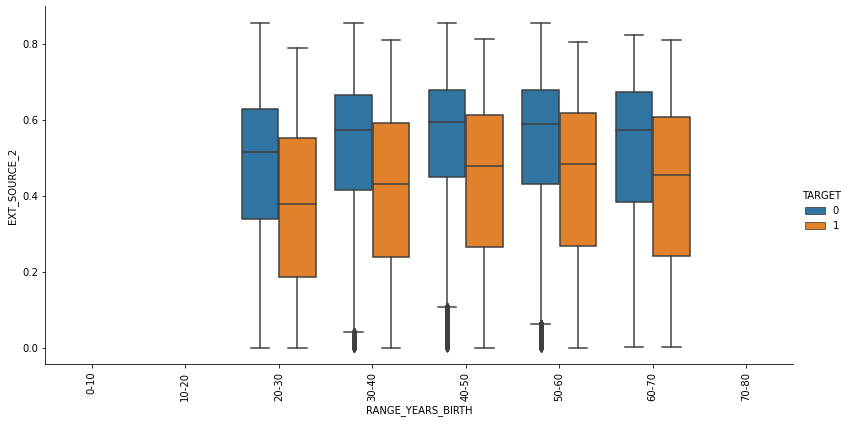

<Figure size 1800x1440 with 0 Axes>

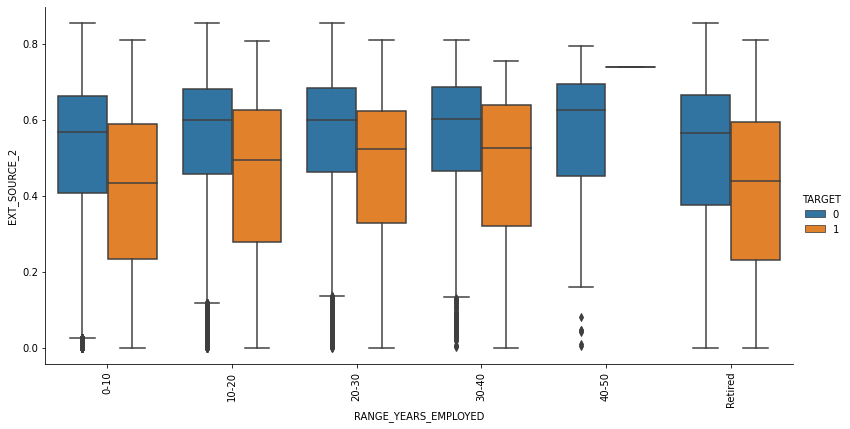

<Figure size 1800x1440 with 0 Axes>

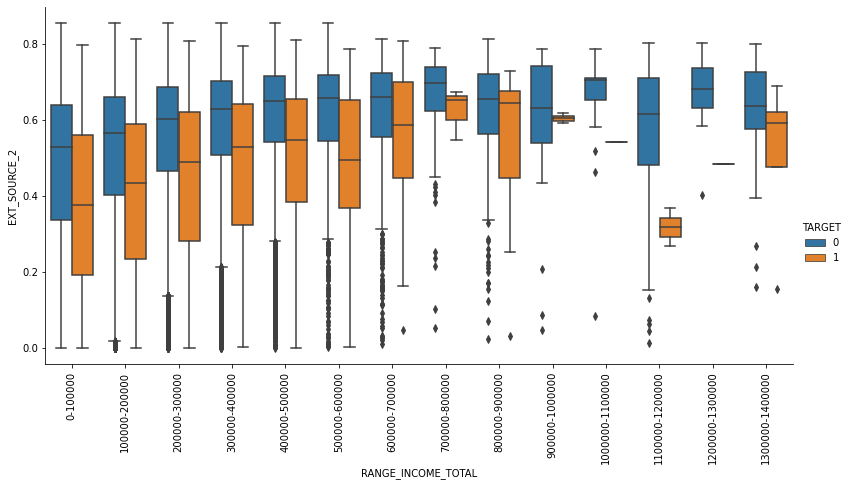

<Figure size 1800x1440 with 0 Axes>

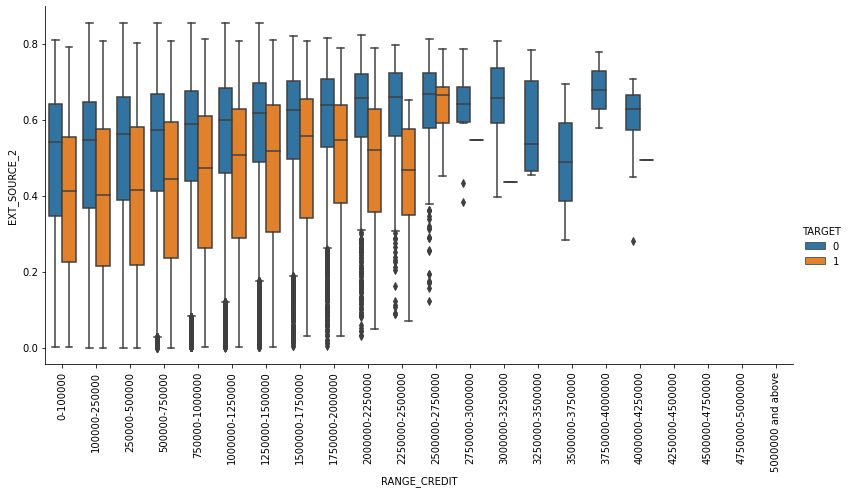

<Figure size 1800x1440 with 0 Axes>

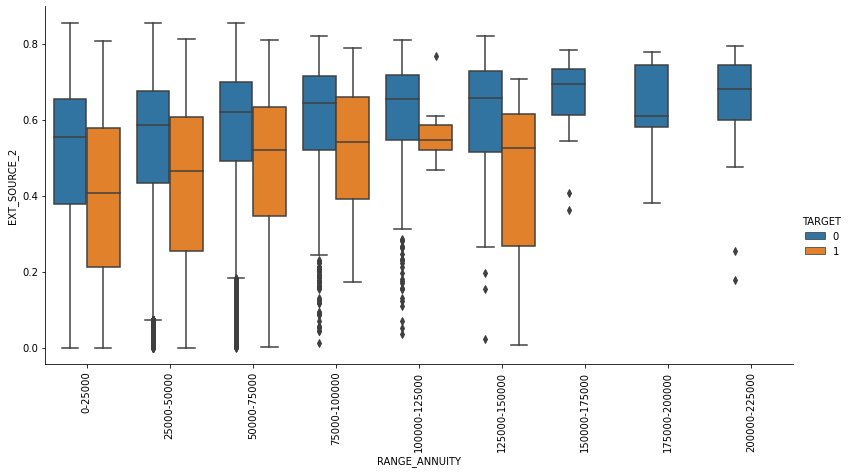

<Figure size 1800x1440 with 0 Axes>

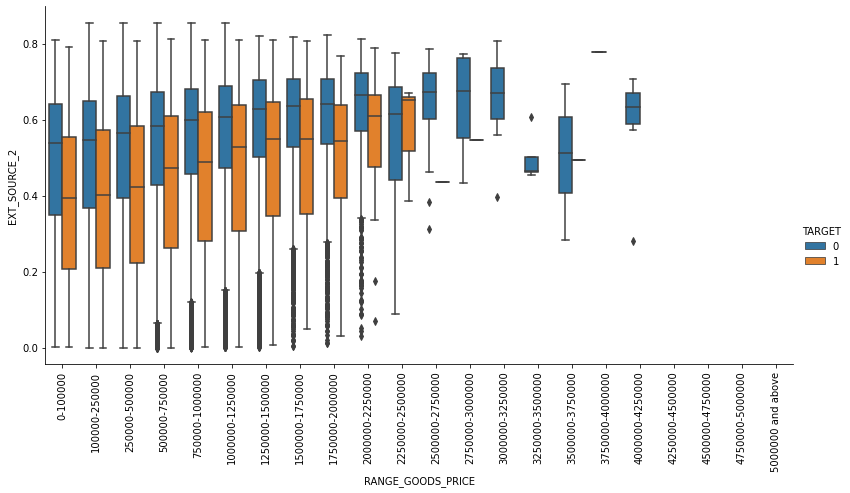

In [84]:
# credit ratings by source 2 for various categorical variables

for i in cat:
    plt.figure(figsize=(25,20))
    fig= sns.catplot(x=i, y="EXT_SOURCE_2", hue="TARGET", kind="box", data = copy1, height=5.5, aspect=2)

    plt.xticks(rotation = 90,fontsize =10)
    count+=1
    plt.show()
    

### Inferences
1. Credit ratings by source 2 decreases from tier 1 to 3 cities.

### Analysis of merged data set of previous and present applicants

In [85]:
# information about merged data sets
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412400 entries, 0 to 1412399
Data columns (total 71 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1412400 non-null  int64   
 1   TARGET                       1412400 non-null  category
 2   NAME_CONTRACT_TYPE_          1412400 non-null  category
 3   CODE_GENDER                  1412345 non-null  category
 4   FLAG_OWN_CAR                 1412400 non-null  category
 5   FLAG_OWN_REALTY              1412400 non-null  category
 6   CNT_CHILDREN                 1412400 non-null  category
 7   AMT_INCOME_TOTAL             1412400 non-null  float64 
 8   AMT_CREDIT_                  1412400 non-null  float64 
 9   AMT_ANNUITY_                 1412400 non-null  float64 
 10  AMT_GOODS_PRICE_             1412400 non-null  float64 
 11  NAME_INCOME_TYPE             1412400 non-null  category
 12  NAME_EDUCATION_TYPE         

In [86]:
pn=data.isnull().sum()/data.isnull().count()*100

In [87]:
# no. of null values data
len(pn[pn.values>=30])

12

In [88]:
#drop columns of data with null values > 30% except
pn1 = list(pn[pn.values>=30].index)
data.drop(labels=pn1,axis=1,inplace=True)
data.shape

(1412400, 59)

In [89]:
# replacing XNA and XAP with null values
data=data.replace('XNA', np.NaN)
data=data.replace('XAP', np.NaN)

In [90]:
# Value counts of Contract Status in previous application
data['NAME_CONTRACT_STATUS'].value_counts()*100/len(data['NAME_CONTRACT_STATUS'])

Approved        62.681464
Canceled        18.357760
Refused         17.350255
Unused offer     1.610521
Name: NAME_CONTRACT_STATUS, dtype: float64

In [91]:
# dropping irrelevant columns
data.drop(['SK_ID_CURR', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412400 entries, 0 to 1412399
Data columns (total 56 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   TARGET                       1412400 non-null  category
 1   NAME_CONTRACT_TYPE_          1412400 non-null  category
 2   CODE_GENDER                  1412345 non-null  category
 3   FLAG_OWN_CAR                 1412400 non-null  category
 4   FLAG_OWN_REALTY              1412400 non-null  category
 5   CNT_CHILDREN                 1412400 non-null  category
 6   AMT_INCOME_TOTAL             1412400 non-null  float64 
 7   AMT_CREDIT_                  1412400 non-null  float64 
 8   AMT_ANNUITY_                 1412400 non-null  float64 
 9   AMT_GOODS_PRICE_             1412400 non-null  float64 
 10  NAME_INCOME_TYPE             1412400 non-null  category
 11  NAME_EDUCATION_TYPE          1412400 non-null  category
 12  NAME_FAMILY_STATUS          

In [92]:
# dividing data sets on the basis of target
k0 = data.loc[data.TARGET == 0]
k1 = data.loc[data.TARGET == 1]

### Multivariate analysis using present and previous data sets combined

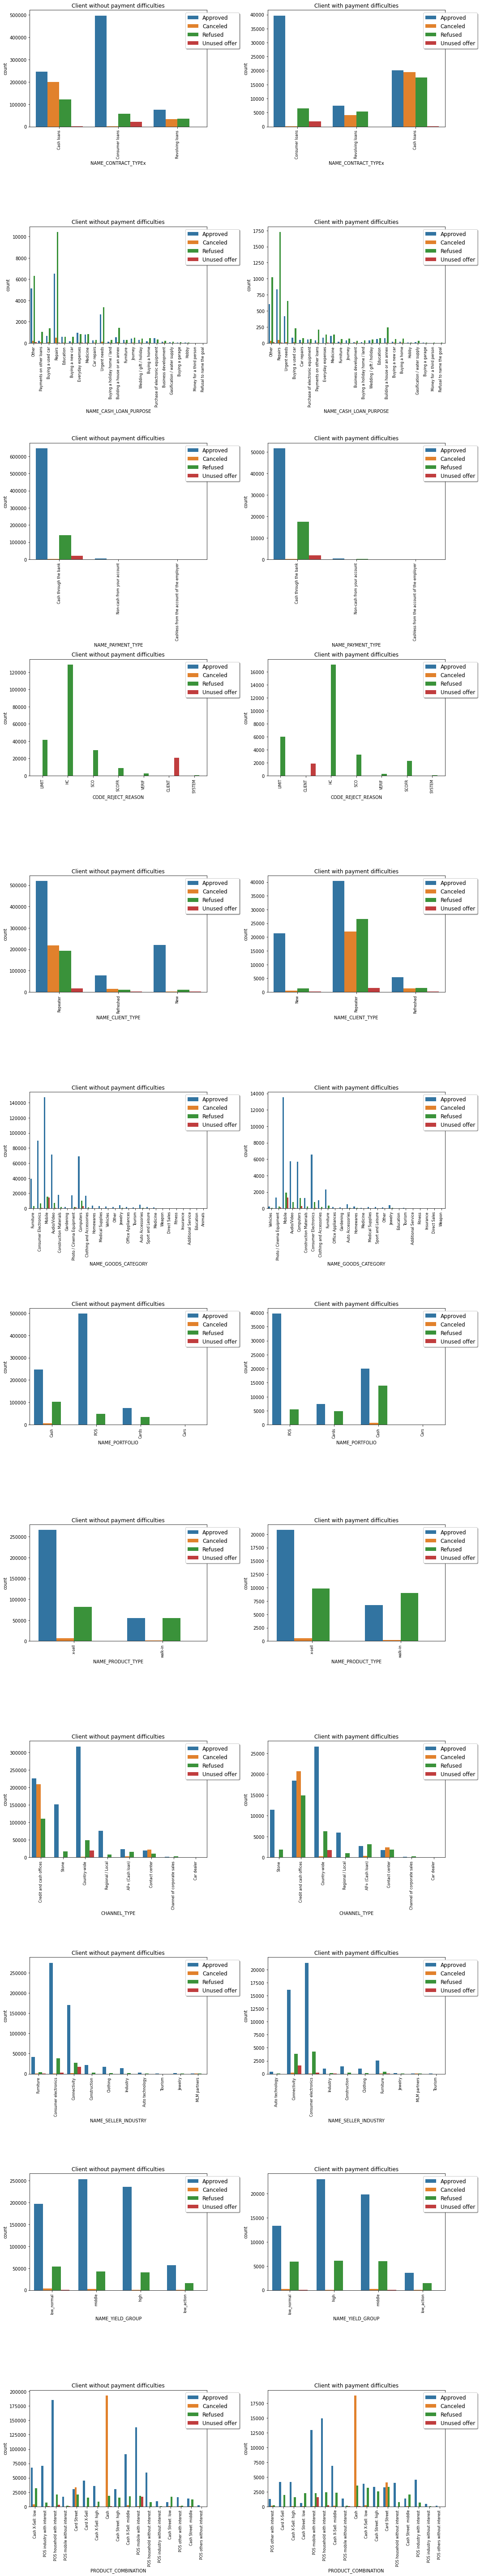

In [93]:
#distribution of columns in previous data sets on the basis of previous contract status and present defaults
cols=["NAME_CONTRACT_TYPEx", "NAME_CASH_LOAN_PURPOSE", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "NAME_CLIENT_TYPE", 
      "NAME_GOODS_CATEGORY",  "NAME_PORTFOLIO",  "NAME_PRODUCT_TYPE", "CHANNEL_TYPE","NAME_SELLER_INDUSTRY", "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"]
plt.subplots(figsize=(15,80 ))
count=1

for i in cols:
    for j in [k0, k1]:
        plt.subplot(12,2,count)
        fig= sns.countplot(x=j[i], hue='NAME_CONTRACT_STATUS',data=data)
        plt.legend( loc='upper center',fontsize = 12, 
                   title_fontsize = 12, bbox_to_anchor= (1.03, 1), shadow = True,facecolor = 'white');
        plt.xticks(rotation = 90,fontsize =8)
        if count%2==0:
            plt.title("Client with payment difficulties")
        else:
            plt.title("Client without payment difficulties")
        count+=1
        plt.tight_layout()
plt.show()
    

### Inference
1. Consumer loans were the most approved contract type and cash loans were cancelled and refused mostly.
2. Most of the refused cash loans were of repairs. Also we see the difference between refused and approved loan is proportionally more for clients who face payment difficulty.
3. Most of the previous loan application rejection was for HC. and the least was for system.
4. Repeater clients are the most approved applicant for previous loans. Also we notice that bar of refused and cancelled application is higher for the client currently facing payment difficulties. Which implies that repeater clients whose previous loan applications was rejected or cancelled face payment difficulties.
5. Loans for mobile was the most approved loan category for previous loans.
6. Most of the previous loan application was for POS.
7. Most of the loans for clients aquired through country wide channel type were accepted.
8. Most of the accepted loan application was for middle yield group for the clients who do not face payment difficulty, whereas it is mostly high yield group whose previous application is accepted for the clents difaulting in current loan.
9. Most of the previous loans approved was for the clients whose product combination was POS household with interest, whereas most of the cancelled applications was for the clients whose product combination was cash.

## Conclusion

#### Targeting clients who has lesser likelihood of defaulting based on above inferences is what bank should look for